<div class="alert alert-info" >
    <center><h1><font>Machine Learning Final Project</font></h1></center><br>
    <center>2022/2023</center>
</div>

**<h3>Table of Contents</h3>**
* [1. Data Exploration](#dataexploration)
    * [1.1 Imports](#imports)
    * [1.2 Data Integration](#dataintegration)
    * [1.3 Initial Analysis](#initialanalysis)
        * [1.3.1 Duplicate Records](#duplicaterecords)
        * [1.3.2 Undesireable Characters](#undesireablecharacters)
        * [1.3.3 Missing Values](#missingvalues)
        * [1.3.4 Data Statistics](#datastatistics)
    * [1.4 Visual Analysis](#visualanalysis)
        * [1.4.1 Categorical Variables Exploration](#categoricalvariablesexploration)
        * [1.4.2 Numerical Variables Exploration](#numericalvariablesexploration)
* [2. Data Preparation and Preprocessing](#datapreprocessing)
    *  [2.1 Coherence Checking](#coherence)
    *  [2.2 Feature Engineering](#featureengineering)
    *  [2.3 Treating Missing Values](#treatingmissingvalues)
    *  [2.4 Outlier Analysis](#outlieranalysis)
        * [2.4.1 Inter Quartile Range](#iqr)
        * [2.4.2 Local Outlier Factor](#lof)
        * [2.4.3 Z-score](#z-score)
    *  [2.5 Encoding and Split](#encodingandsplit)
    *  [2.6 Scaling](#scaling)
    *  [2.7 Feature Selection](#featureselection)
        *  [2.7.1 Spearman Correlation](#spearman)
        *  [2.7.2 Univariate Variables](#univariate)
        *  [2.7.3 Logistic Regression](#logisticregressionfeature)
        *  [2.7.4 Random Forest](#randomforest)
        *  [2.7.5 Recursive Feature Elimination (RFE)](#rfe)
            * [2.7.5.1 Recursive Feature Elimination with cross-validation](#rfecv)
        *  [2.7.6 Select K Best](#selectkbest)
        *  [2.7.7 Mean Absolute Diference (MAD)](#mad)
        *  [2.7.8 Feature Selection Results](#results)
* [3. Modelling](#modelling)
    *  [3.1 Logistic Regression](#logistic)
    *  [3.2 Gaussian Naive Bayes](#gaussiannb)
    *  [3.3 KNN](#knn)
    *  [3.4 Decision Trees](#dt)
    *  [3.5 Support Vector Machine](#supportvectormachine)
        *  [3.5.1 Support Vector Classification](#svc)
        *  [3.5.2 Nu-Support Vector Classification](#nusvc)
        *  [3.5.3 Linear Support Vector Classification](#linearsvc)
    *  [3.6 Neural Networks](#nn)
    *  [3.7 Ensemble Methods](#ensemble)
        *  [3.7.1 Bagging Classifier](#bagging)
        *  [3.7.2 Random Forest](#rforest)
        *  [3.7.3 Extra Trees](#et)
        *  [3.7.4 Ada Boost](#ada)
        *  [3.7.5 Gradient Boosting](#gradient)
        *  [3.7.6 Voting Classifier](#voting)
        *  [3.7.7 Stacking Classifier](#stacking)
    *  [4. Assessment](#assessment)
    *  [5. Deployment](#deployment)
        *  [5.1 Repeating Steps on Test Data](#rep)

# 1. Data Exploration <a class="anchor" id="dataexploration"></a>

## 1.1 Imports <a class="anchor" id="imports"></a>

In [200]:
import pandas as pd 
import numpy as np

# data partition
from sklearn.model_selection import train_test_split

# data transformation
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

# outliers
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats

# feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import chi2

# models
from sklearn.model_selection import GridSearchCV #for hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV #for hyperparameter optimization
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from math import ceil
import graphviz
import pydotplus
import textwrap

# assessment
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
import time
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')

## 1.2 Data Integration <a class="anchor" id="dataintegration"></a>

First, we import the datasets into variables.

In [2]:
train_demo = pd.read_excel('train_demo.xlsx')
train_habits = pd.read_excel('train_habits.xlsx')
train_health = pd.read_excel('train_health.xlsx')

In [3]:
train_demo.head()

PatientID                Name  Birth_Year                    Region  \
0       1167  Mrs. Stephanie Gay        1965                    London   
1       1805    Mr. Sherman Nero        1969                South West   
2       1557     Mr. Mark Boller        1974  Yorkshire and the Humber   
3       1658    Mr. David Caffee        1958                    London   
4       1544    Mr. Gerald Emery        1968                South East   

                                     Education  Disease  
0  High School Incomplete (10th to 11th grade)        1  
1  High School Incomplete (10th to 11th grade)        1  
2         Elementary School (1st to 9th grade)        1  
3        University Complete (3 or more years)        0  
4         University Incomplete (1 to 2 years)        1

In [4]:
train_habits.head()

PatientID Smoking_Habit                       Drinking_Habit Exercise  \
0       1167            No  I usually consume alcohol every day      Yes   
1       1805            No   I consider myself a social drinker      Yes   
2       1557            No   I consider myself a social drinker       No   
3       1658            No  I usually consume alcohol every day      Yes   
4       1544            No   I consider myself a social drinker       No   

                                       Fruit_Habit  \
0  Less than 1. I do not consume fruits every day.   
1  Less than 1. I do not consume fruits every day.   
2  Less than 1. I do not consume fruits every day.   
3  Less than 1. I do not consume fruits every day.   
4                1 to 2 pieces of fruit in average   

                                      Water_Habit  
0                Between one liter and two liters  
1                Between one liter and two liters  
2  More than half a liter but less than one liter  
3  More than half a liter but less than one liter  
4  More than half a liter but less than one liter

In [5]:
train_health.head()

PatientID  Height  Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
0       1167     155      67               358             120             21   
1       1805     173      88               230             142              9   
2       1557     162      68               226             122             26   
3       1658     180      66               313             125             13   
4       1544     180      58               277             125             18   

   Physical_Health            Checkup  \
0                2  More than 3 years   
1                0           Not sure   
2                0  More than 3 years   
3                8           Not sure   
4                2  More than 3 years   

                                            Diabetes  
0   Neither I nor my immediate family have diabetes.  
1   Neither I nor my immediate family have diabetes.  
2   Neither I nor my immediate family have diabetes.  
3  I have/had pregnancy diabetes or borderline di...  
4  I have/had pregnancy diabetes or borderline di...

Merging all the datasets into a unique one based on the PatientID variable.

In [6]:
train_patient_original = pd.merge(pd.merge(train_demo, train_health, on="PatientID"), train_habits, on='PatientID')

In [7]:
train_patient = train_patient_original.copy()

Defining the PatientID as the index of our dataframe.

In [8]:
train_patient.set_index('PatientID', inplace = True)
train_patient.head()

Name  Birth_Year                    Region  \
PatientID                                                             
1167       Mrs. Stephanie Gay        1965                    London   
1805         Mr. Sherman Nero        1969                South West   
1557          Mr. Mark Boller        1974  Yorkshire and the Humber   
1658         Mr. David Caffee        1958                    London   
1544         Mr. Gerald Emery        1968                South East   

                                             Education  Disease  Height  \
PatientID                                                                 
1167       High School Incomplete (10th to 11th grade)        1     155   
1805       High School Incomplete (10th to 11th grade)        1     173   
1557              Elementary School (1st to 9th grade)        1     162   
1658             University Complete (3 or more years)        0     180   
1544              University Incomplete (1 to 2 years)        1     180   

           Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
PatientID                                                            
1167           67               358             120             21   
1805           88               230             142              9   
1557           68               226             122             26   
1658           66               313             125             13   
1544           58               277             125             18   

           Physical_Health            Checkup  \
PatientID                                       
1167                     2  More than 3 years   
1805                     0           Not sure   
1557                     0  More than 3 years   
1658                     8           Not sure   
1544                     2  More than 3 years   

                                                    Diabetes Smoking_Habit  \
PatientID                                                                    
1167        Neither I nor my immediate family have diabetes.            No   
1805        Neither I nor my immediate family have diabetes.            No   
1557        Neither I nor my immediate family have diabetes.            No   
1658       I have/had pregnancy diabetes or borderline di...            No   
1544       I have/had pregnancy diabetes or borderline di...            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1167       I usually consume alcohol every day      Yes   
1805        I consider myself a social drinker      Yes   
1557        I consider myself a social drinker       No   
1658       I usually consume alcohol every day      Yes   
1544        I consider myself a social drinker       No   

                                               Fruit_Habit  \
PatientID                                                    
1167       Less than 1. I do not consume fruits every day.   
1805       Less than 1. I do not consume fruits every day.   
1557       Less than 1. I do not consume fruits every day.   
1658       Less than 1. I do not consume fruits every day.   
1544                     1 to 2 pieces of fruit in average   

                                              Water_Habit  
PatientID                                                  
1167                     Between one liter and two liters  
1805                     Between one liter and two liters  
1557       More than half a liter but less than one liter  
1658       More than half a liter but less than one liter  
1544       More than half a liter but less than one liter

## 1.3 Initial Analysis <a class="anchor" id="initialanalysis"></a>

In [9]:
# --- Print Dataset Info ---
print('\033[36m\033[1m'+'.: Dataset Info :.')
print('\033[0m\033[36m*' * 20)
print('\033[0m'+'Total Rows:'+'\033[36m\033[1m', train_patient.shape[0])
print('\033[0m'+'Total Columns:'+'\033[36m\033[1m', train_patient.shape[1])
print('\033[0m\033[36m*' * 20)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.')
print('\033[0m\033[36m*' * 22 +'\033[0m')
train_patient.info(memory_usage = False)

.: Dataset Info :.
********************
Total Rows: 800
Total Columns: 18
********************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Height            800 non-null    int64 
 6   Weight            800 non-null    int64 
 7   High_Cholesterol  800 non-null    int64 
 8   Blood_Pressure    800 non-null    int64 
 9   Mental_Health     800 non-null    int64 
 10  Physical_Health   800 non-null    int64 
 11  Checkup           800 non-null    object
 12  Diabetes          800 non-null    object
 13  Smoking_Habit     800 non-null    object
 14  Drinking

### 1.3.1 Duplicate records <a class="anchor" id="duplicaterecords"></a>

Checking if there are any duplicates in our dataframe.

In [10]:
print('\033[36m\033[1m'+'.: Duplicated Values :.')
print('\033[0m\033[36m*' * 23)
print('\033[0m', train_patient.duplicated().value_counts())

.: Duplicated Values :.
***********************
 False    800
dtype: int64


### 1.3.2 Undesireable characters <a class="anchor" id="undesireablecharacters"></a>

In [11]:
undesireable_char = ["!","$","%","?","*","+","_","@","€"," ","{"]
a = train_patient.replace(undesireable_char,np.nan, inplace=True)
print('\033[36m\033[1m'+'.: Undesirable Characters :.')
print('\033[0m\033[36m*' * 28)
print('\033[0m', a)

.: Undesirable Characters :.
****************************
 None


### 1.3.3 Missing values <a class="anchor" id="missingvalues"></a>

In [12]:
total = train_patient.isnull().sum().sort_values(ascending=False)
percent = (train_patient.isnull().sum()/train_patient.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print('\033[36m\033[1m'+'.: Null Values :.')
print('\033[0m\033[36m*' * 17)
print('\033[0m', missing_data)

.: Null Values :.
*****************
                   Total  Percent
Education            13  0.01625
Name                  0  0.00000
Physical_Health       0  0.00000
Fruit_Habit           0  0.00000
Exercise              0  0.00000
Drinking_Habit        0  0.00000
Smoking_Habit         0  0.00000
Diabetes              0  0.00000
Checkup               0  0.00000
Mental_Health         0  0.00000
Birth_Year            0  0.00000
Blood_Pressure        0  0.00000
High_Cholesterol      0  0.00000
Weight                0  0.00000
Height                0  0.00000
Disease               0  0.00000
Region                0  0.00000
Water_Habit           0  0.00000


Looking for null values in the dataframe. We concluded that Education contains 13 null values.

### 1.3.4 Data Statistics <a class="anchor" id="datastatistics"></a>

In [13]:
train_patient_num = train_patient.select_dtypes(exclude=object)
train_patient_cat = train_patient.select_dtypes(include=object)

In [14]:
train_patient_num.describe().T

count        mean        std     min      25%     50%  \
Birth_Year        800.0  1966.04375  15.421872  1855.0  1961.00  1966.0   
Disease           800.0     0.51375   0.500124     0.0     0.00     1.0   
Height            800.0   167.80625   7.976888   151.0   162.00   167.0   
Weight            800.0    67.82750  12.113470    40.0    58.00    68.0   
High_Cholesterol  800.0   249.32250  51.566631   130.0   213.75   244.0   
Blood_Pressure    800.0   131.05375  17.052693    94.0   120.00   130.0   
Mental_Health     800.0    17.34500   5.385139     0.0    13.00    18.0   
Physical_Health   800.0     4.55875   5.449189     0.0     0.00     3.0   

                     75%     max  
Birth_Year        1974.0  1993.0  
Disease              1.0     1.0  
Height             173.0   180.0  
Weight              77.0    97.0  
High_Cholesterol   280.0   568.0  
Blood_Pressure     140.0   200.0  
Mental_Health       21.0    29.0  
Physical_Health      7.0    30.0

In [15]:
train_patient_cat.describe().T

count unique                                               top  \
Name             800    799                                   Mr. Gary Miller   
Region           800     10                                     East Midlands   
Education        787      6             University Complete (3 or more years)   
Checkup          800      4                                 More than 3 years   
Diabetes         800      4  Neither I nor my immediate family have diabetes.   
Smoking_Habit    800      2                                                No   
Drinking_Habit   800      3               I usually consume alcohol every day   
Exercise         800      2                                                No   
Fruit_Habit      800      5   Less than 1. I do not consume fruits every day.   
Water_Habit      800      3                  Between one liter and two liters   

               freq  
Name              2  
Region          154  
Education       239  
Checkup         429  
Diabetes        392  
Smoking_Habit   673  
Drinking_Habit  406  
Exercise        536  
Fruit_Habit     452  
Water_Habit     364

In [16]:
train_patient[train_patient["Disease"] == 0].describe(include="all").T

count unique  \
Name                389    388   
Birth_Year        389.0    NaN   
Region              389     10   
Education           384      6   
Disease           389.0    NaN   
Height            389.0    NaN   
Weight            389.0    NaN   
High_Cholesterol  389.0    NaN   
Blood_Pressure    389.0    NaN   
Mental_Health     389.0    NaN   
Physical_Health   389.0    NaN   
Checkup             389      4   
Diabetes            389      4   
Smoking_Habit       389      2   
Drinking_Habit      389      3   
Exercise            389      2   
Fruit_Habit         389      5   
Water_Habit         389      3   

                                                               top freq  \
Name                                               Mr. Gary Miller    2   
Birth_Year                                                     NaN  NaN   
Region                                               East Midlands   78   
Education                    University Complete (3 or more years)  116   
Disease                                                        NaN  NaN   
Height                                                         NaN  NaN   
Weight                                                         NaN  NaN   
High_Cholesterol                                               NaN  NaN   
Blood_Pressure                                                 NaN  NaN   
Mental_Health                                                  NaN  NaN   
Physical_Health                                                NaN  NaN   
Checkup                                                   Not sure  241   
Diabetes          Neither I nor my immediate family have diabetes.  289   
Smoking_Habit                                                   No  318   
Drinking_Habit                  I consider myself a social drinker  225   
Exercise                                                       Yes  208   
Fruit_Habit        Less than 1. I do not consume fruits every day.  126   
Water_Habit                       Between one liter and two liters  174   

                         mean        std     min     25%     50%     75%  \
Name                      NaN        NaN     NaN     NaN     NaN     NaN   
Birth_Year        1963.524422  16.521543  1859.0  1960.0  1964.0  1970.0   
Region                    NaN        NaN     NaN     NaN     NaN     NaN   
Education                 NaN        NaN     NaN     NaN     NaN     NaN   
Disease                   0.0        0.0     0.0     0.0     0.0     0.0   
Height             169.205656   7.339265   151.0   165.0   171.0   174.0   
Weight              65.647815  11.688477    40.0    56.0    64.0    73.0   
High_Cholesterol   253.313625   47.96739   135.0   220.0   252.0   287.0   
Blood_Pressure     133.974293  18.546941   100.0   120.0   130.0   144.0   
Mental_Health       15.033419   5.301859     0.0    12.0    16.0    19.0   
Physical_Health      7.030848   6.153456     0.0     2.0     6.0    11.0   
Checkup                   NaN        NaN     NaN     NaN     NaN     NaN   
Diabetes                  NaN        NaN     NaN     NaN     NaN     NaN   
Smoking_Habit             NaN        NaN     NaN     NaN     NaN     NaN   
Drinking_Habit            NaN        NaN     NaN     NaN     NaN     NaN   
Exercise                  NaN        NaN     NaN     NaN     NaN     NaN   
Fruit_Habit               NaN        NaN     NaN     NaN     NaN     NaN   
Water_Habit               NaN        NaN     NaN     NaN     NaN     NaN   

                     max  
Name                 NaN  
Birth_Year        1987.0  
Region               NaN  
Education            NaN  
Disease              0.0  
Height             180.0  
Weight              97.0  
High_Cholesterol   413.0  
Blood_Pressure     200.0  
Mental_Health       28.0  
Physical_Health     30.0  
Checkup              NaN  
Diabetes             NaN  
Smoking_Habit        NaN  
Drinking_Habit       NaN  
Exercise             NaN  
Fruit_Habit          NaN  
Water_Habit   

In [17]:
train_patient[train_patient["Disease"] == 1].describe(include="all").T

count unique  \
Name                411    411   
Birth_Year        411.0    NaN   
Region              411     10   
Education           403      6   
Disease           411.0    NaN   
Height            411.0    NaN   
Weight            411.0    NaN   
High_Cholesterol  411.0    NaN   
Blood_Pressure    411.0    NaN   
Mental_Health     411.0    NaN   
Physical_Health   411.0    NaN   
Checkup             411      4   
Diabetes            411      4   
Smoking_Habit       411      2   
Drinking_Habit      411      3   
Exercise            411      2   
Fruit_Habit         411      5   
Water_Habit         411      3   

                                                                top freq  \
Name                                             Mrs. Stephanie Gay    1   
Birth_Year                                                      NaN  NaN   
Region                                                East Midlands   76   
Education                     University Complete (3 or more years)  123   
Disease                                                         NaN  NaN   
Height                                                          NaN  NaN   
Weight                                                          NaN  NaN   
High_Cholesterol                                                NaN  NaN   
Blood_Pressure                                                  NaN  NaN   
Mental_Health                                                   NaN  NaN   
Physical_Health                                                 NaN  NaN   
Checkup                                           More than 3 years  324   
Diabetes          I have/had pregnancy diabetes or borderline di...  155   
Smoking_Habit                                                    No  355   
Drinking_Habit                  I usually consume alcohol every day  250   
Exercise                                                         No  355   
Fruit_Habit         Less than 1. I do not consume fruits every day.  326   
Water_Habit                        Between one liter and two liters  190   

                         mean        std     min     25%     50%     75%  \
Name                      NaN        NaN     NaN     NaN     NaN     NaN   
Birth_Year        1968.428224  13.908642  1855.0  1963.0  1970.0  1977.0   
Region                    NaN        NaN     NaN     NaN     NaN     NaN   
Education                 NaN        NaN     NaN     NaN     NaN     NaN   
Disease                   1.0        0.0     1.0     1.0     1.0     1.0   
Height             166.481752   8.331342   151.0   158.0   167.0   173.0   
Weight              69.890511  12.161121    41.0    61.0    71.0    79.0   
High_Cholesterol   245.545012  54.545482   130.0   211.0   238.0   272.0   
Blood_Pressure     128.289538  15.013697    94.0   120.0   130.0   138.0   
Mental_Health       19.532847   4.477125     5.0    17.0    20.0    23.0   
Physical_Health      2.218978    3.27827     0.0     0.0     0.0     4.0   
Checkup                   NaN        NaN     NaN     NaN     NaN     NaN   
Diabetes                  NaN        NaN     NaN     NaN     NaN     NaN   
Smoking_Habit             NaN        NaN     NaN     NaN     NaN     NaN   
Drinking_Habit            NaN        NaN     NaN     NaN     NaN     NaN   
Exercise                  NaN        NaN     NaN     NaN     NaN     NaN   
Fruit_Habit               NaN        NaN     NaN     NaN     NaN     NaN   
Water_Habit               NaN        NaN     NaN     NaN     NaN     NaN   

                     max  
Name                 NaN  
Birth_Year        1993.0  
Region               NaN  
Education            NaN  
Disease              1.0  
Height             180.0  
Weight              97.0  
High_Cholesterol   568.0  
Blood_Pressure     180.0  
Mental_Health       29.0  
Physical_Health     20.0  
Checkup              NaN  
Diabetes             NaN  
Smoking_Habit        NaN  
Drinking_Habit       NaN  
Exercise             NaN  
Fruit_Habit          N

In [18]:
train_patient.groupby("Disease").mean()

Birth_Year      Height     Weight  High_Cholesterol  Blood_Pressure  \
Disease                                                                         
0        1963.524422  169.205656  65.647815        253.313625      133.974293   
1        1968.428224  166.481752  69.890511        245.545012      128.289538   

         Mental_Health  Physical_Health  
Disease                                  
0            15.033419         7.030848  
1            19.532847         2.218978

## 1.4 Visual Analysis <a class="anchor" id="visualanalysis"></a>

### 1.4.1 Categorical Variables Exploration <a class="anchor" id="categoricalvariablesexploration"></a>

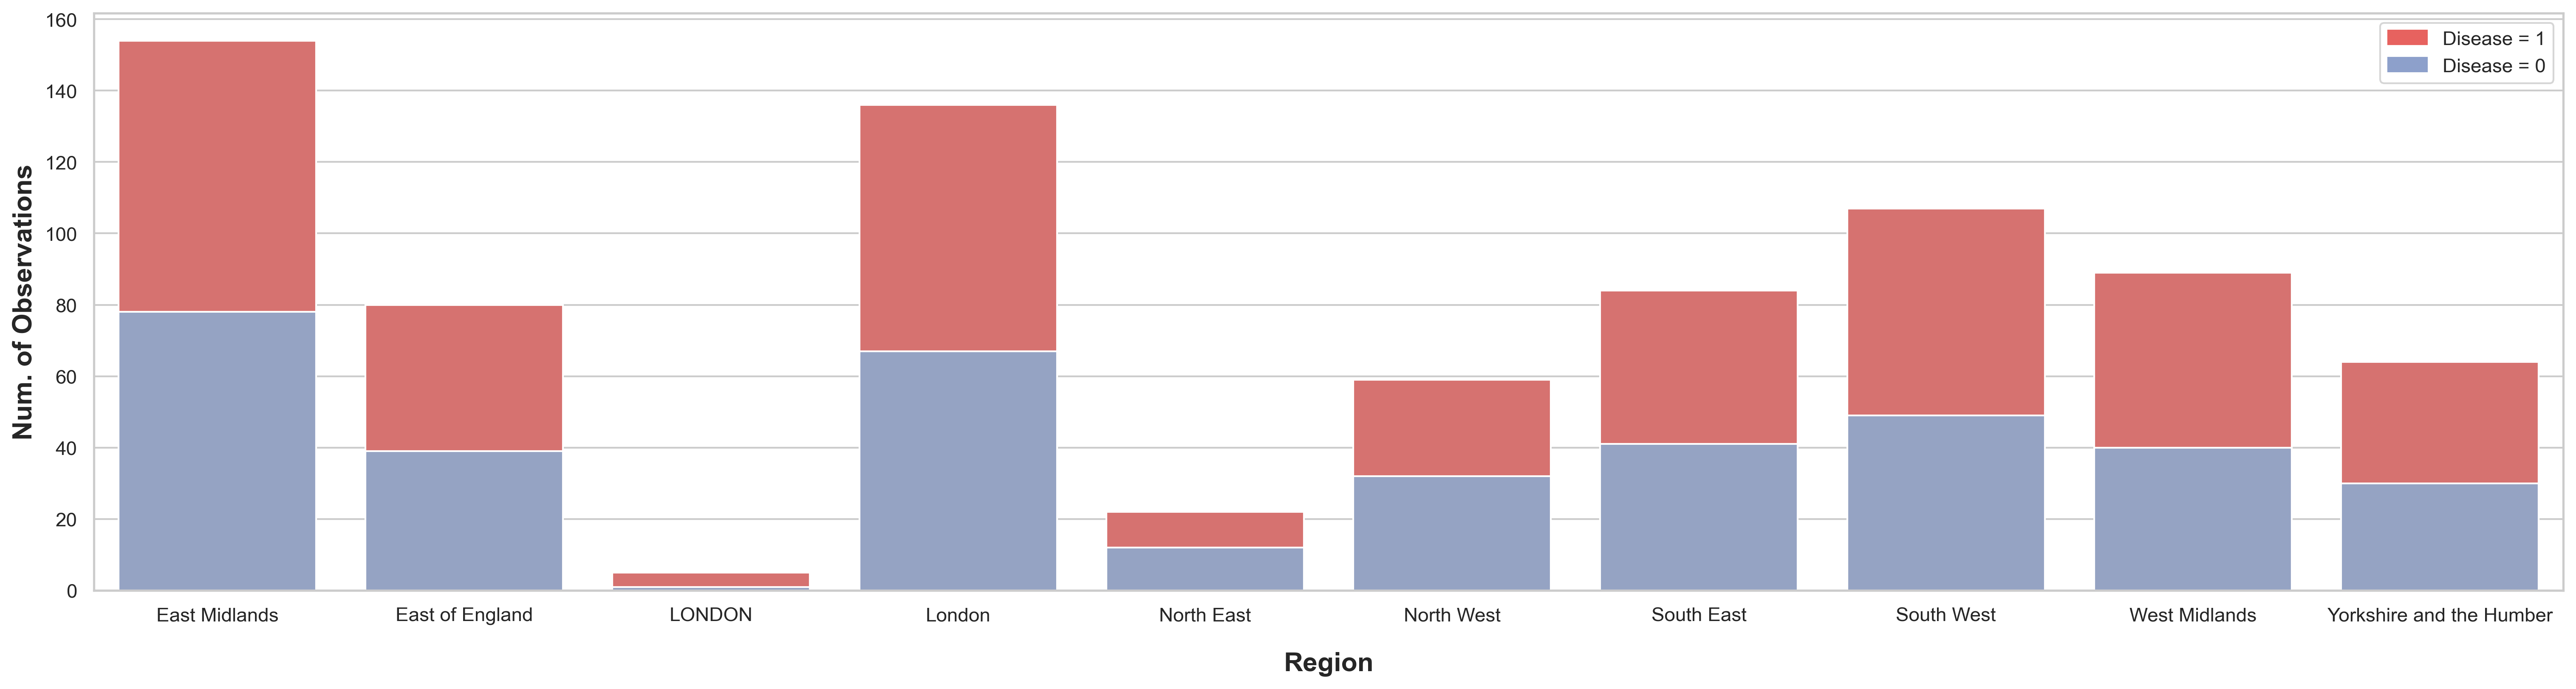

In [19]:
plt.figure(figsize=(25, 6), dpi=300)

# set plot style: grey grid in the background:
sns.set(style="whitegrid")

# Getting value count
total = train_patient.groupby('Region')['Disease'].count().reset_index()
non_disease = train_patient[train_patient.Disease==0].groupby('Region')['Disease'].count().reset_index()

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.barplot(x="Region", y="Disease", data=total, color='#E7625F')

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.barplot(x="Region", y="Disease", data=non_disease, color=sns.color_palette("Set2")[2])

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color=sns.color_palette("Set2")[2], label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Region", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Region.png', dpi=600, bbox_inches='tight')
plt.show()

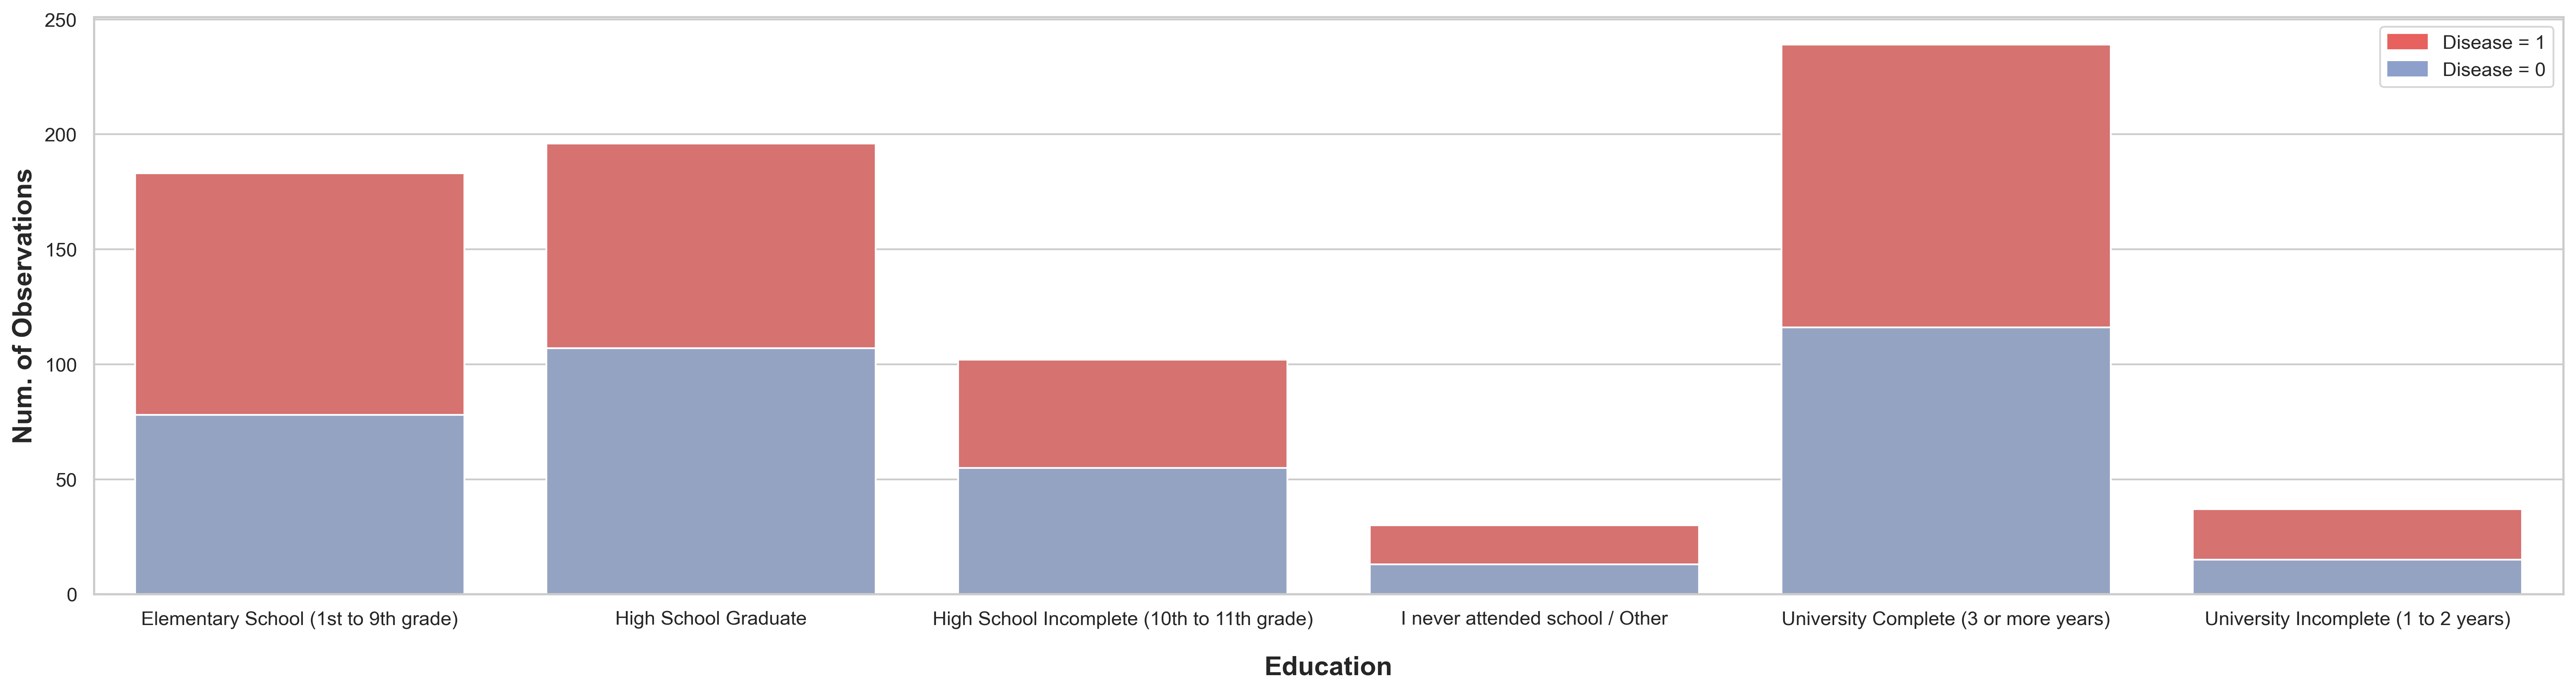

In [20]:
plt.figure(figsize=(25, 6), dpi=300)

# Getting value count
total = train_patient.groupby('Education')['Disease'].count().reset_index()
non_disease = train_patient[train_patient.Disease==0].groupby('Education')['Disease'].count().reset_index()

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.barplot(x="Education", y="Disease", data=total, color='#E7625F')

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.barplot(x="Education", y="Disease", data=non_disease, color=sns.color_palette("Set2")[2])

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color=sns.color_palette("Set2")[2], label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Education", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Education.png', dpi=600, bbox_inches='tight')
plt.show()

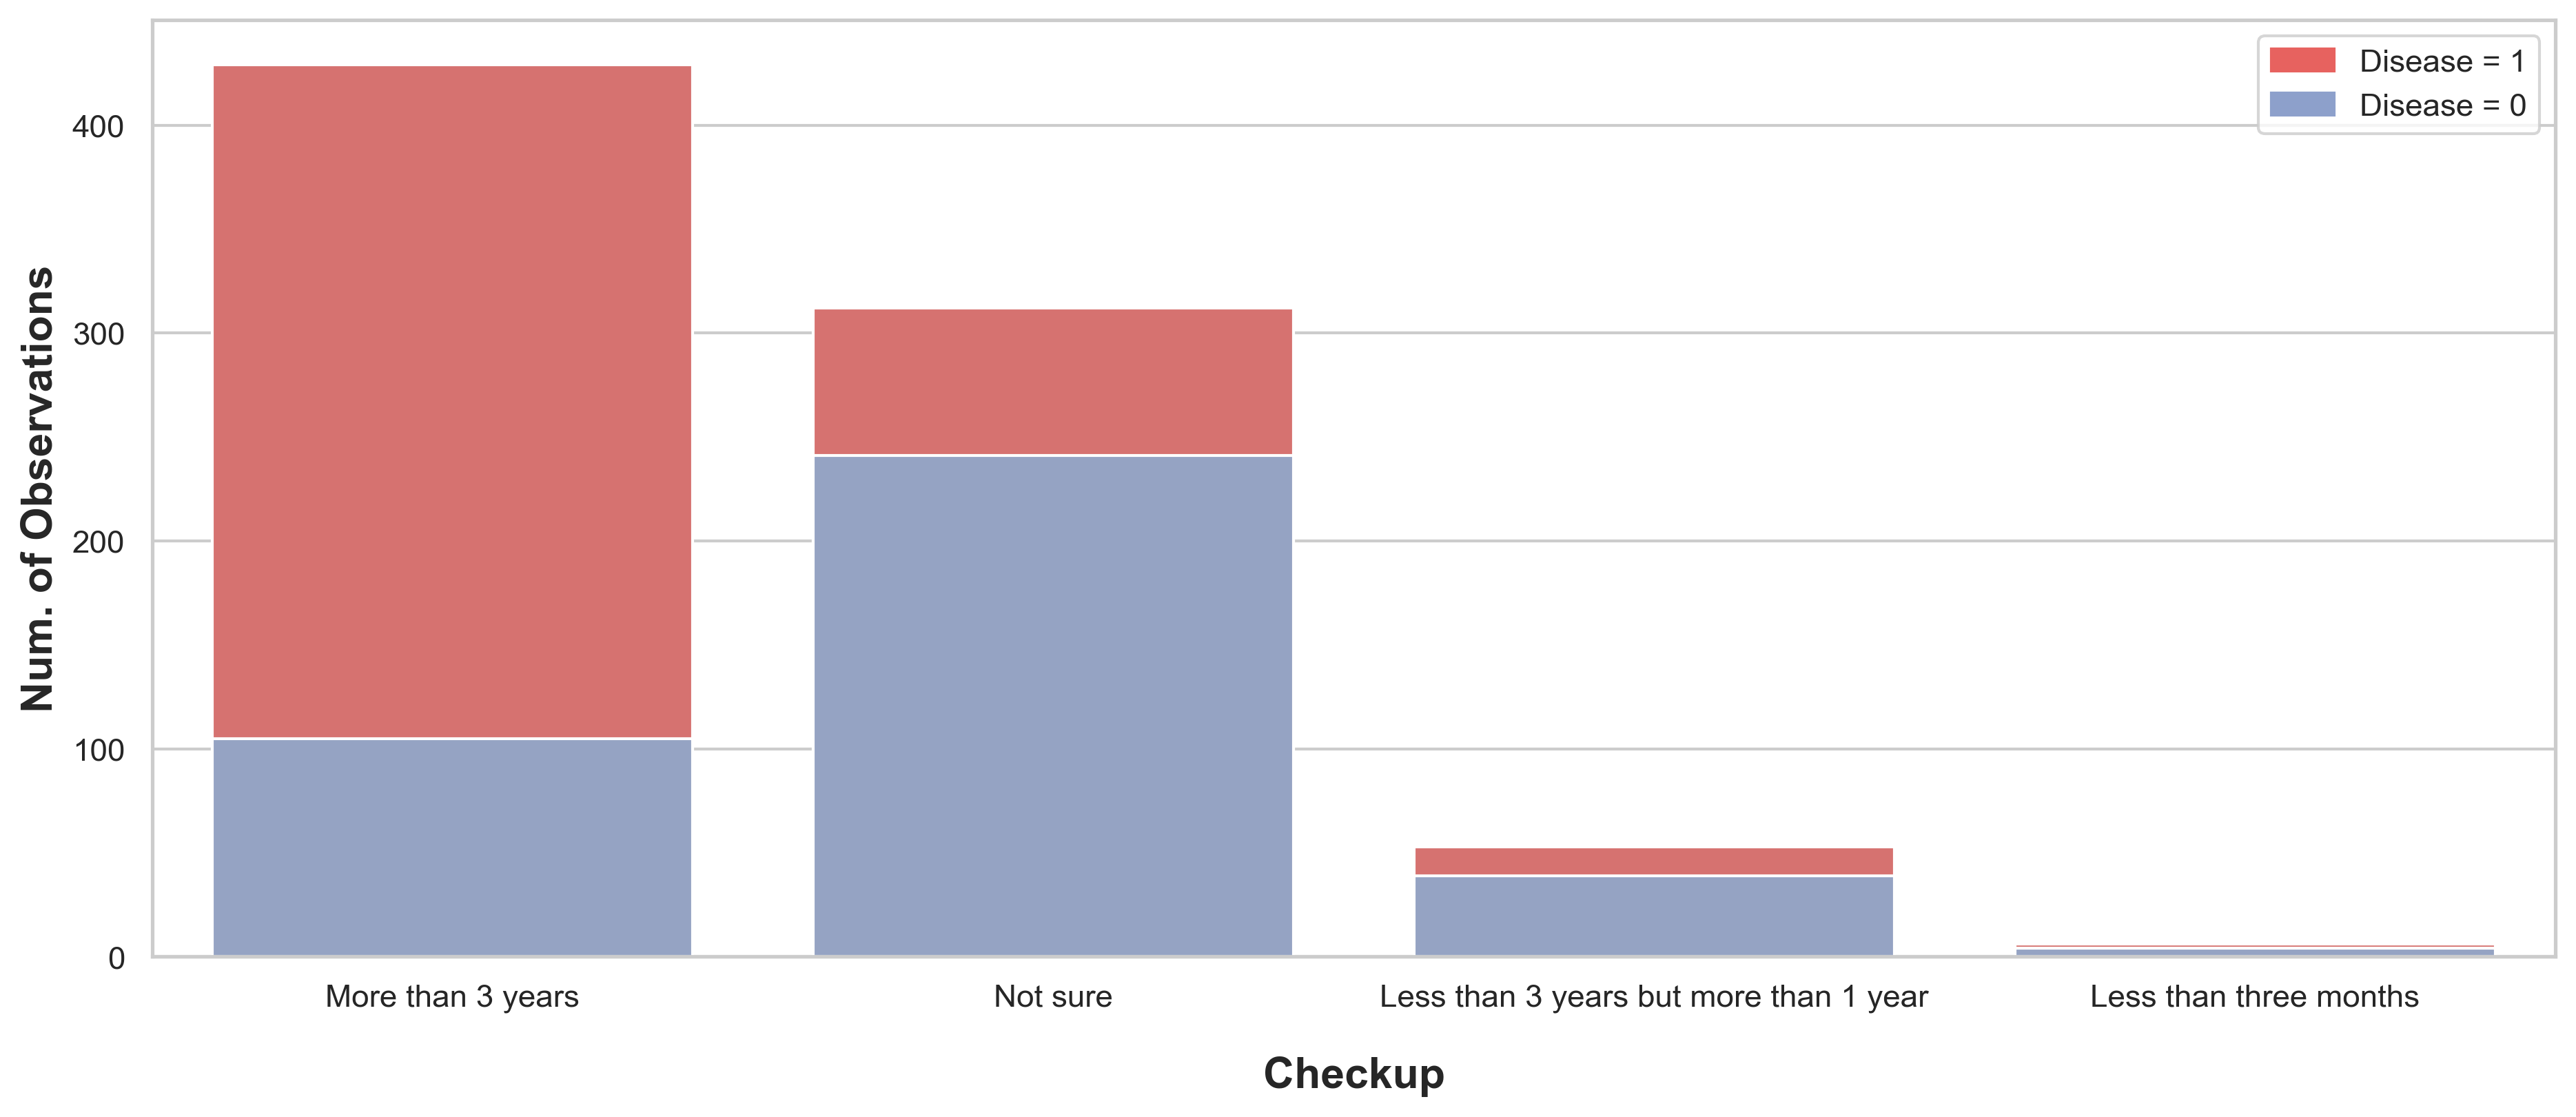

In [21]:
plt.figure(figsize=(15, 6), dpi=300)

# Getting value count
total = train_patient.groupby('Checkup')['Disease'].count().reset_index()
non_disease = train_patient[train_patient.Disease==0].groupby('Checkup')['Disease'].count().reset_index()

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.barplot(x="Checkup", y="Disease", data=total, color='#E7625F', order=list(train_patient['Checkup'].unique()))

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.barplot(x="Checkup", y="Disease", data=non_disease, color=sns.color_palette("Set2")[2], order=list(train_patient['Checkup'].unique()))

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color=sns.color_palette("Set2")[2], label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Checkup", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Checkup.png', dpi=600, bbox_inches='tight')
plt.show()

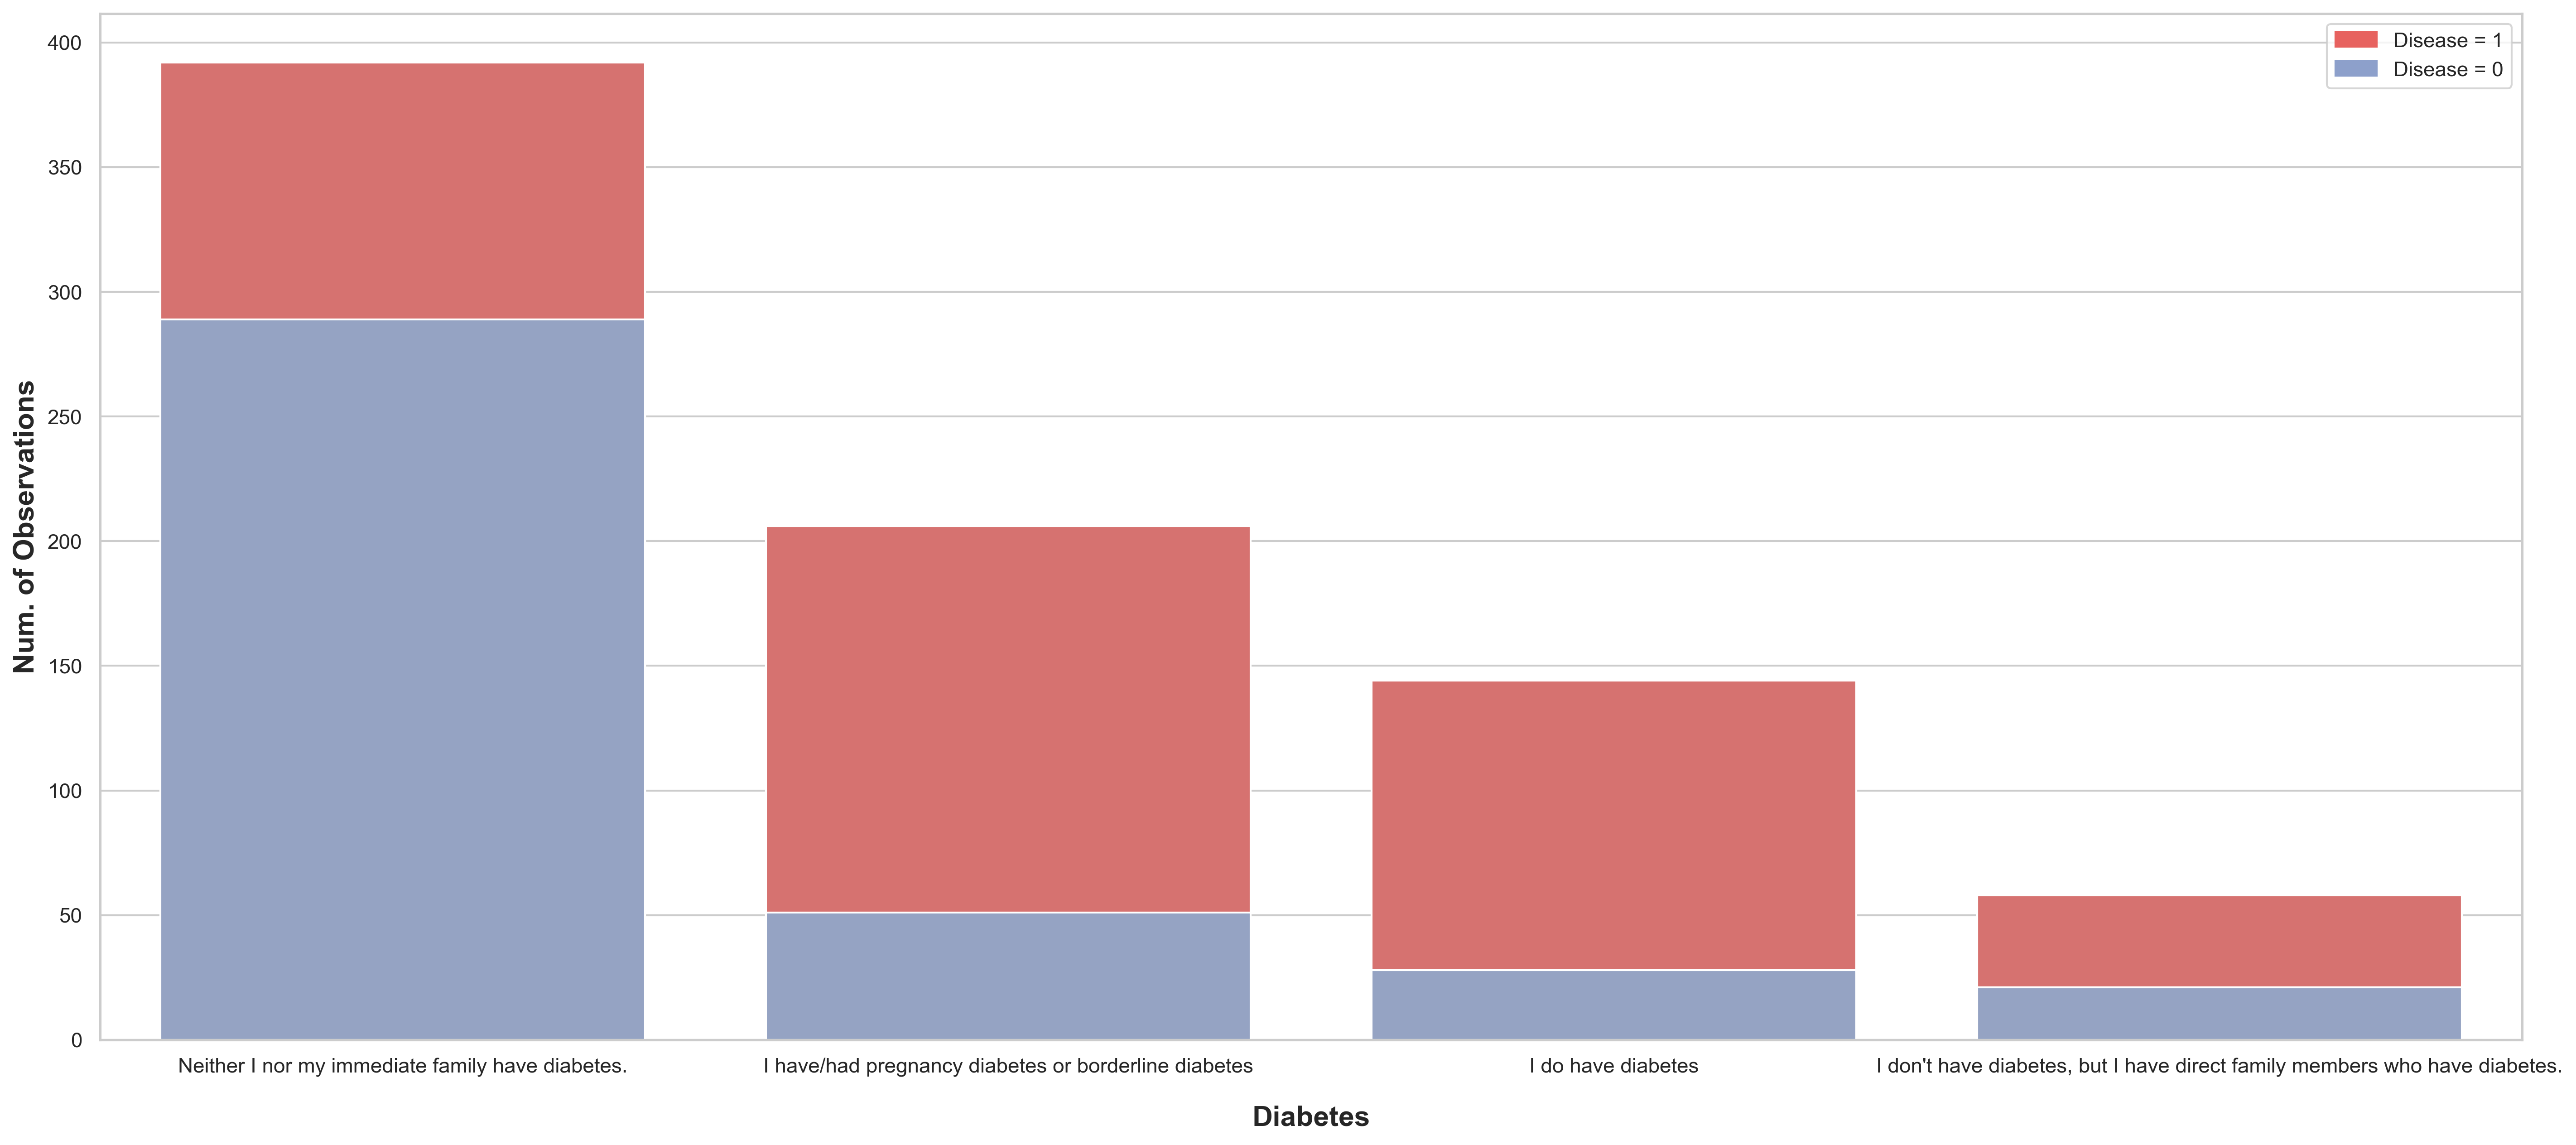

In [22]:
plt.figure(figsize=(23, 10), dpi=300)

order = list(train_patient['Diabetes'].unique())

# Getting value count
total = train_patient.groupby('Diabetes')['Disease'].count().reset_index()
non_disease = train_patient[train_patient.Disease==0].groupby('Diabetes')['Disease'].count().reset_index()

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.barplot(x="Diabetes", y="Disease", data=total, color='#E7625F', order=order)

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.barplot(x="Diabetes", y="Disease", data=non_disease, color=sns.color_palette("Set2")[2], order=order)

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color=sns.color_palette("Set2")[2], label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Diabetes", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Diabetes.png', dpi=600, bbox_inches='tight')
plt.show()

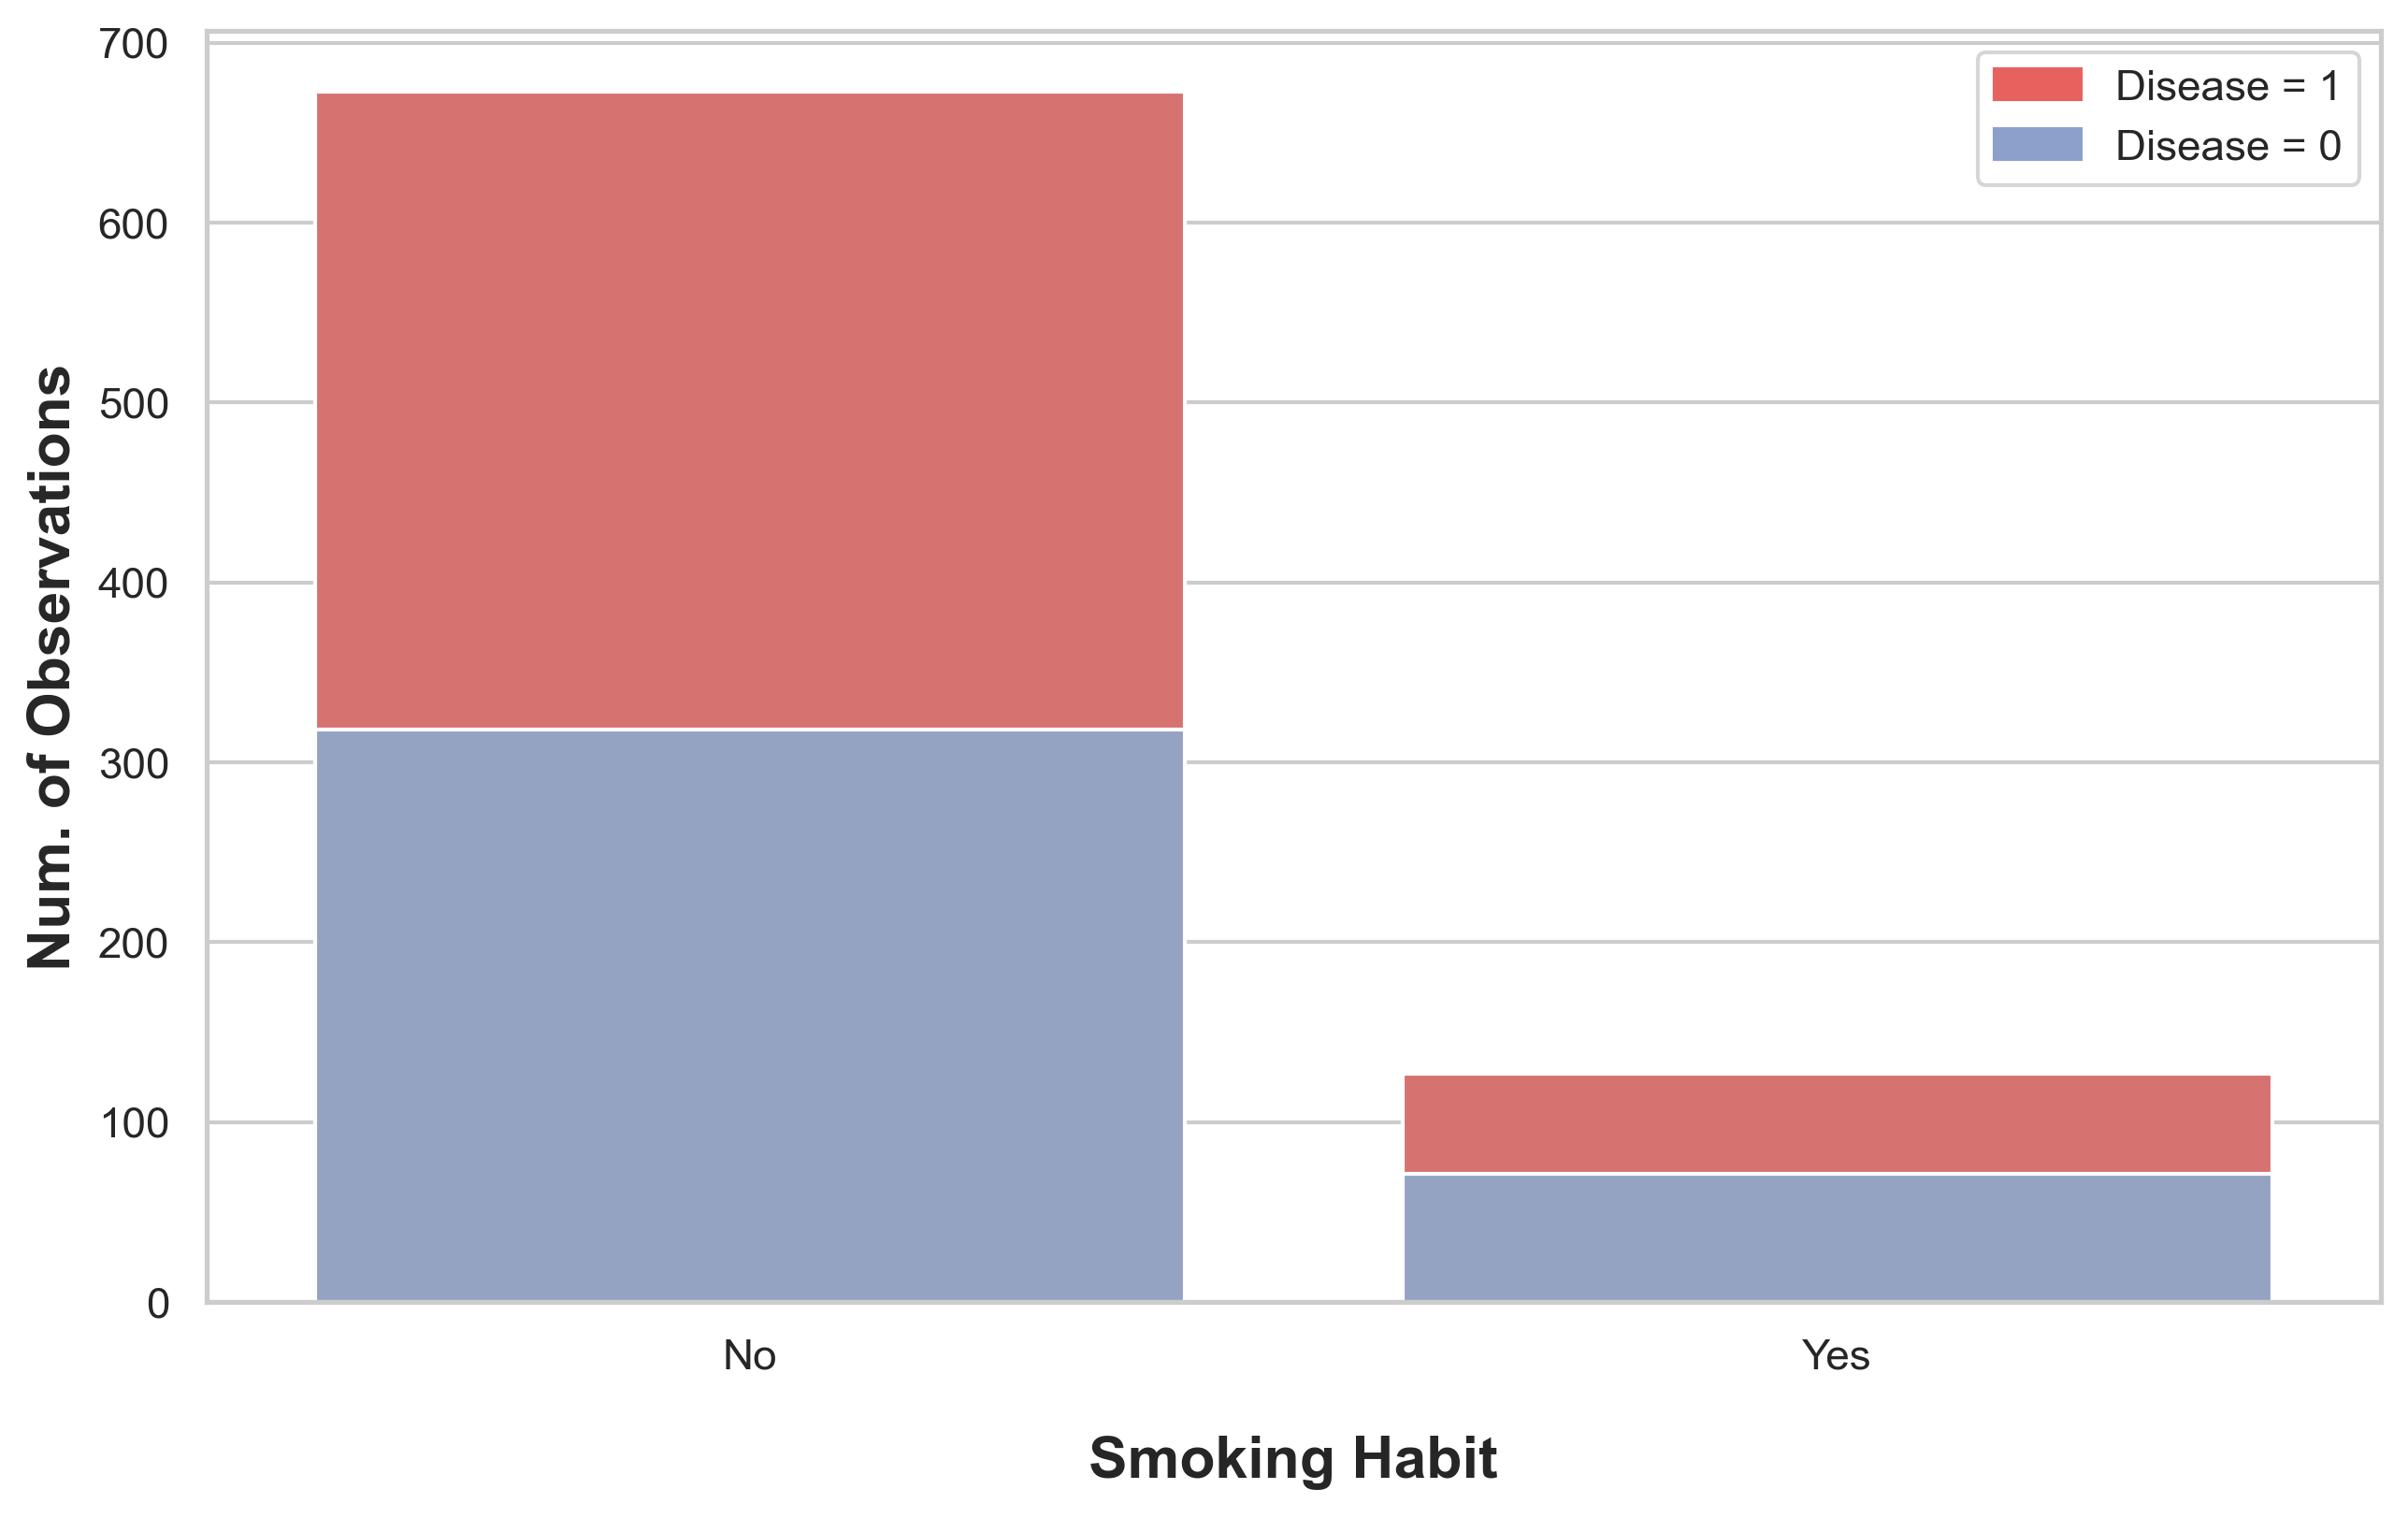

In [23]:
plt.figure(figsize=(10, 6), dpi=300)

# Getting value count
total = train_patient.groupby('Smoking_Habit')['Disease'].count().reset_index()
non_disease = train_patient[train_patient.Disease==0].groupby('Smoking_Habit')['Disease'].count().reset_index()

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.barplot(x="Smoking_Habit", y="Disease", data=total, color='#E7625F')

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.barplot(x="Smoking_Habit", y="Disease", data=non_disease, color=sns.color_palette("Set2")[2])

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color=sns.color_palette("Set2")[2], label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Smoking Habit", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Smoking_Habit.png', dpi=600, bbox_inches='tight')
plt.show()

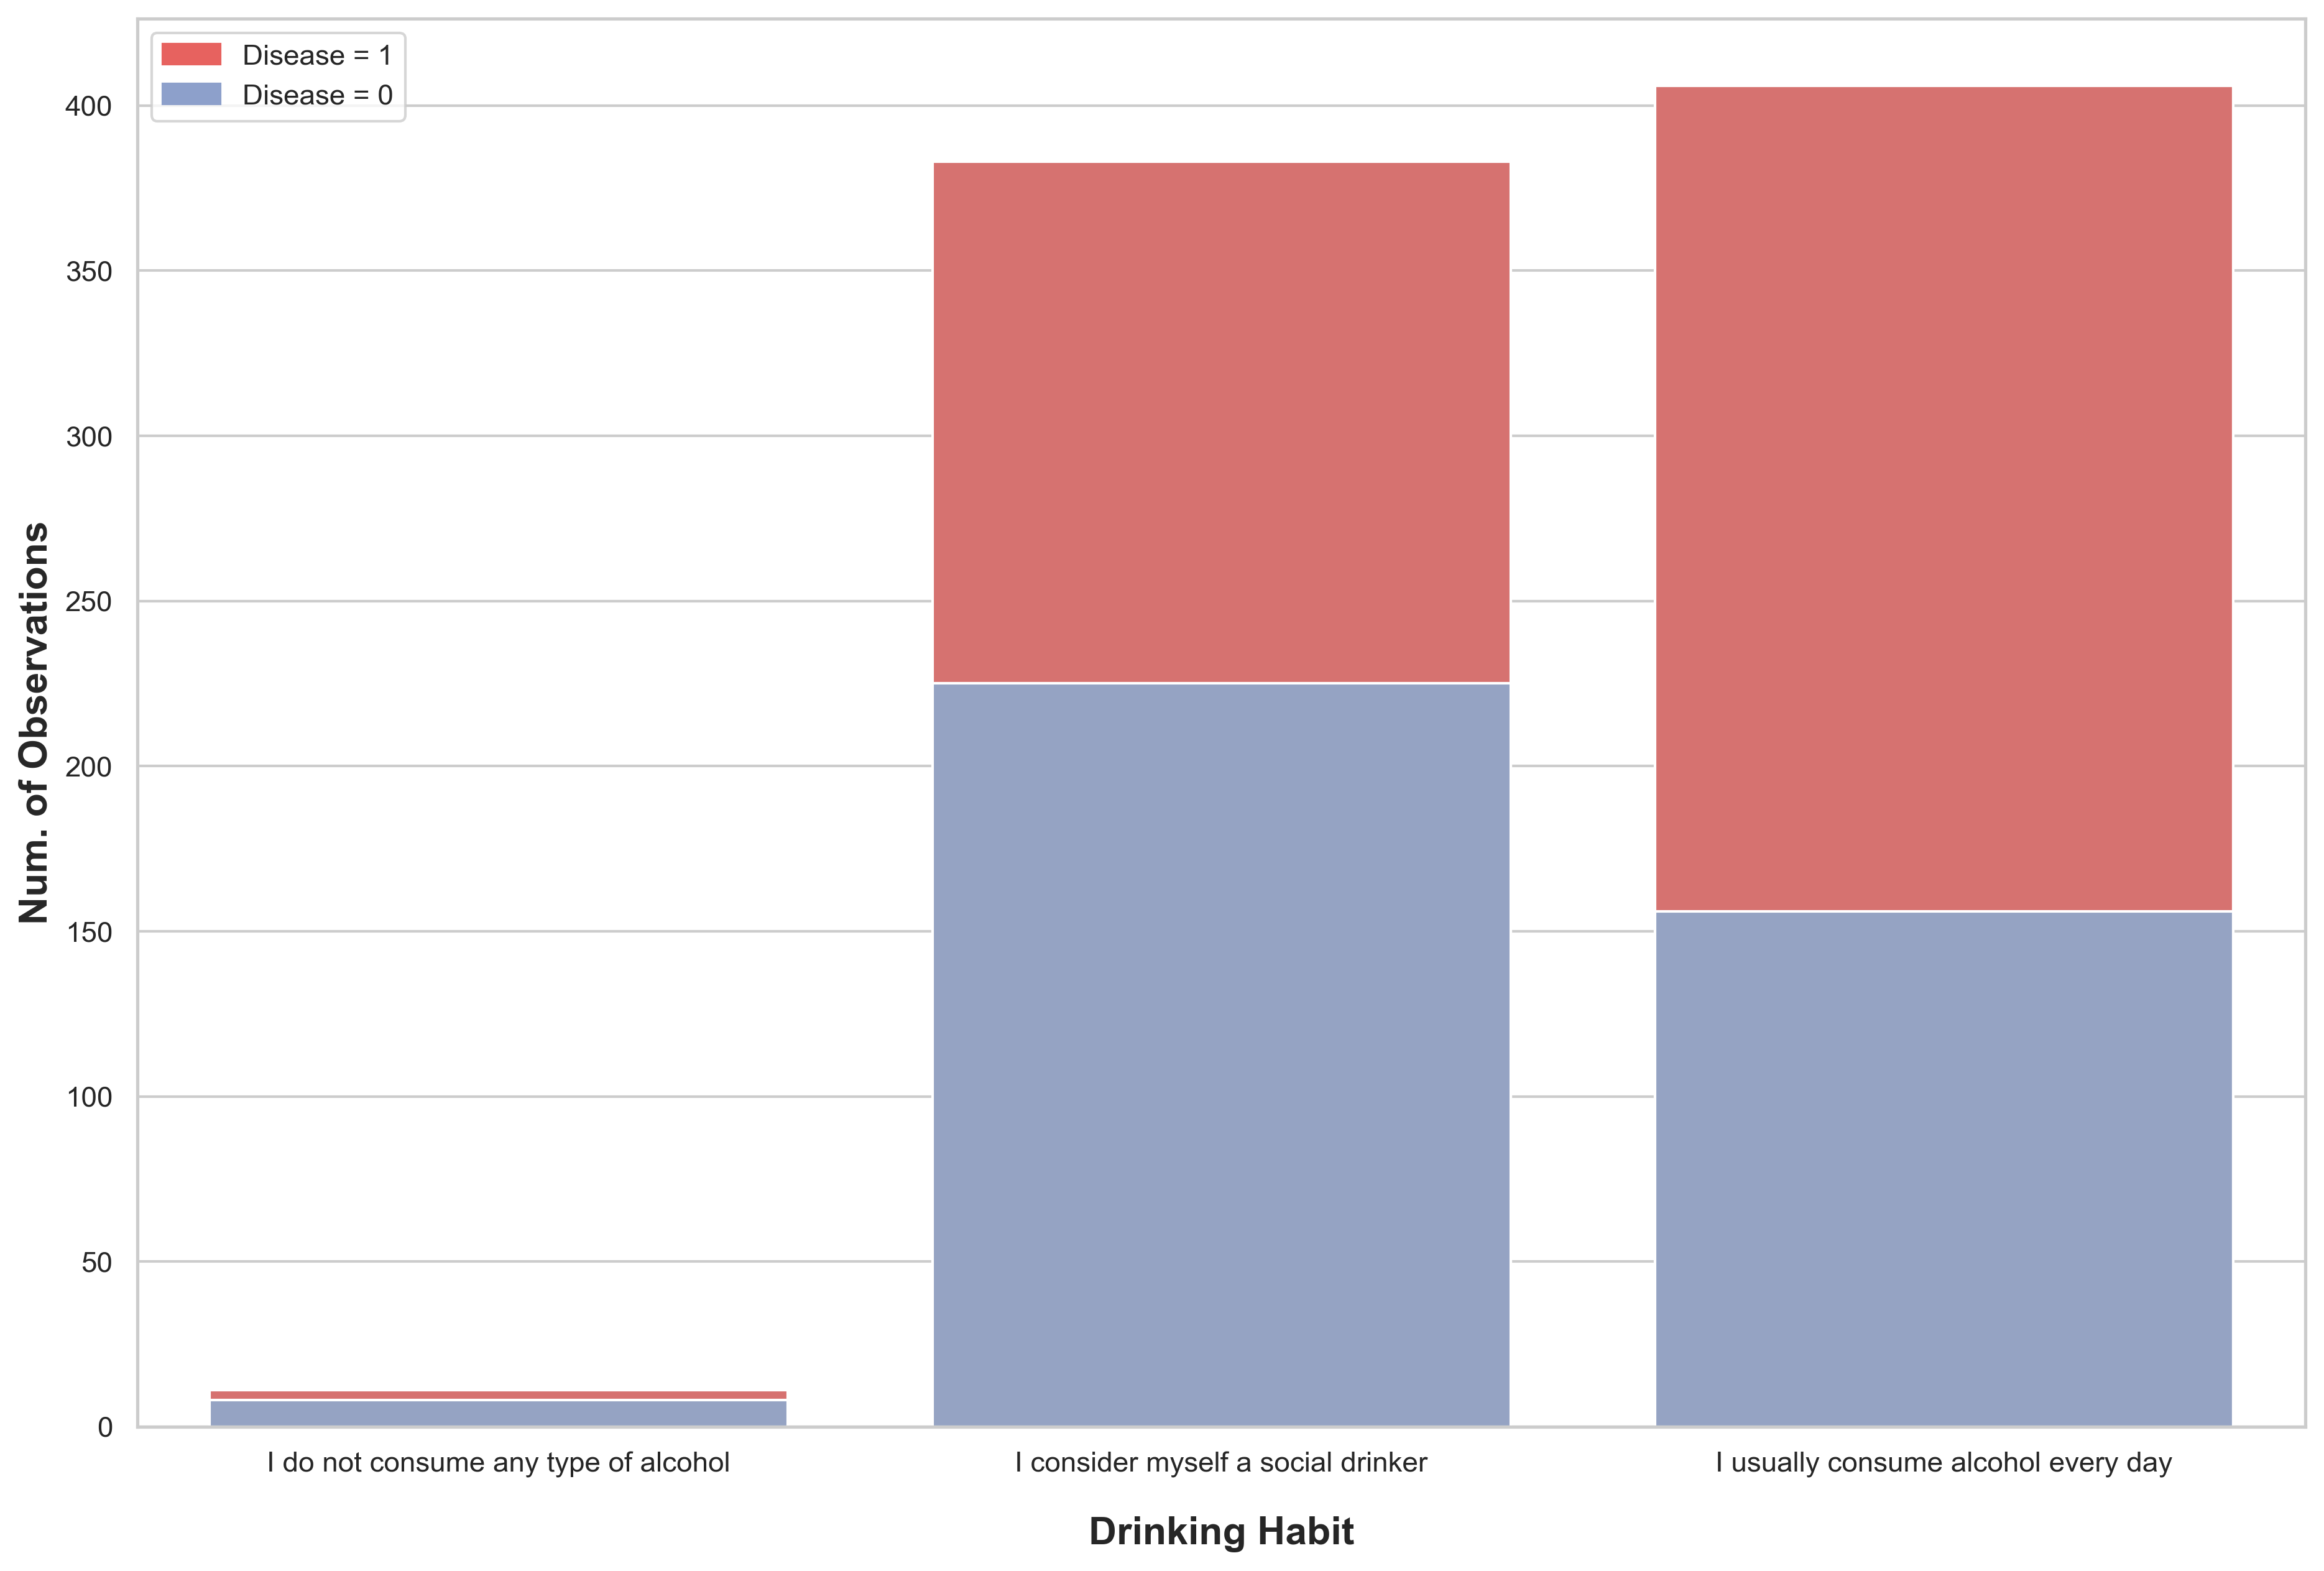

In [24]:
plt.figure(figsize=(15, 10), dpi=300)

order = list(train_patient['Drinking_Habit'].unique())

order.reverse()

# Getting value count
total = train_patient.groupby('Drinking_Habit')['Disease'].count().reset_index()
non_disease = train_patient[train_patient.Disease==0].groupby('Drinking_Habit')['Disease'].count().reset_index()

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.barplot(x="Drinking_Habit", y="Disease", data=total, color='#E7625F', order=order)

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.barplot(x="Drinking_Habit", y="Disease", data=non_disease, color=sns.color_palette("Set2")[2], order=order)

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color=sns.color_palette("Set2")[2], label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Drinking Habit", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Drinking_Habit.png', dpi=600, bbox_inches='tight')
plt.show()

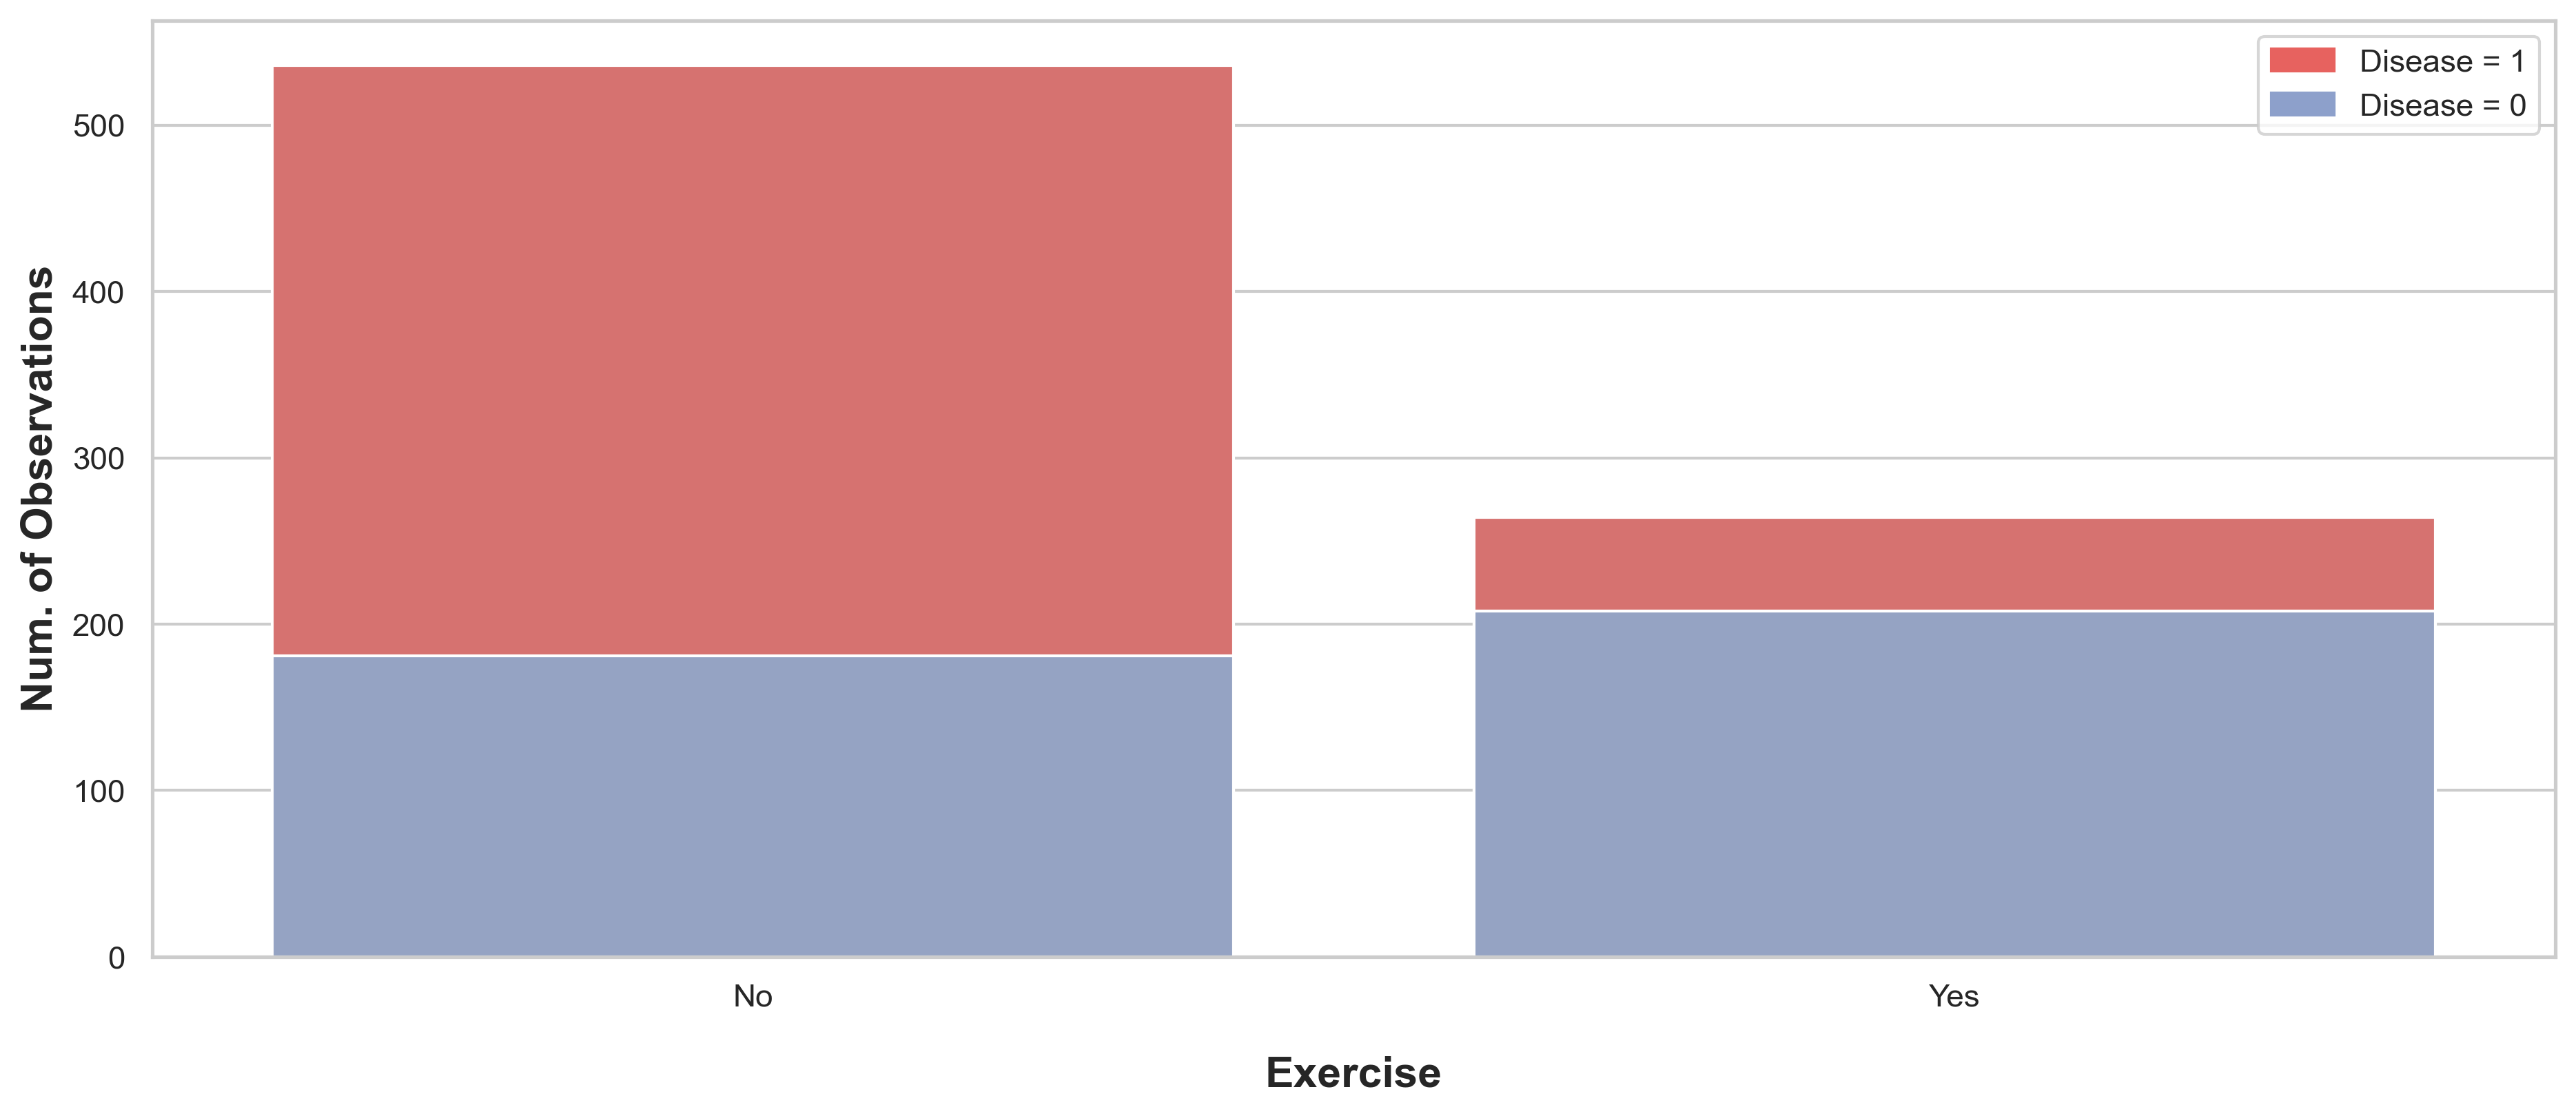

In [25]:
plt.figure(figsize=(15, 6), dpi=300)

# Getting value count
total = train_patient.groupby('Exercise')['Disease'].count().reset_index()
non_disease = train_patient[train_patient.Disease==0].groupby('Exercise')['Disease'].count().reset_index()

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.barplot(x="Exercise", y="Disease", data=total, color='#E7625F')

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.barplot(x="Exercise", y="Disease", data=non_disease, color=sns.color_palette("Set2")[2])

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color=sns.color_palette("Set2")[2], label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Exercise", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Exercise.png', dpi=600, bbox_inches='tight')
plt.show()

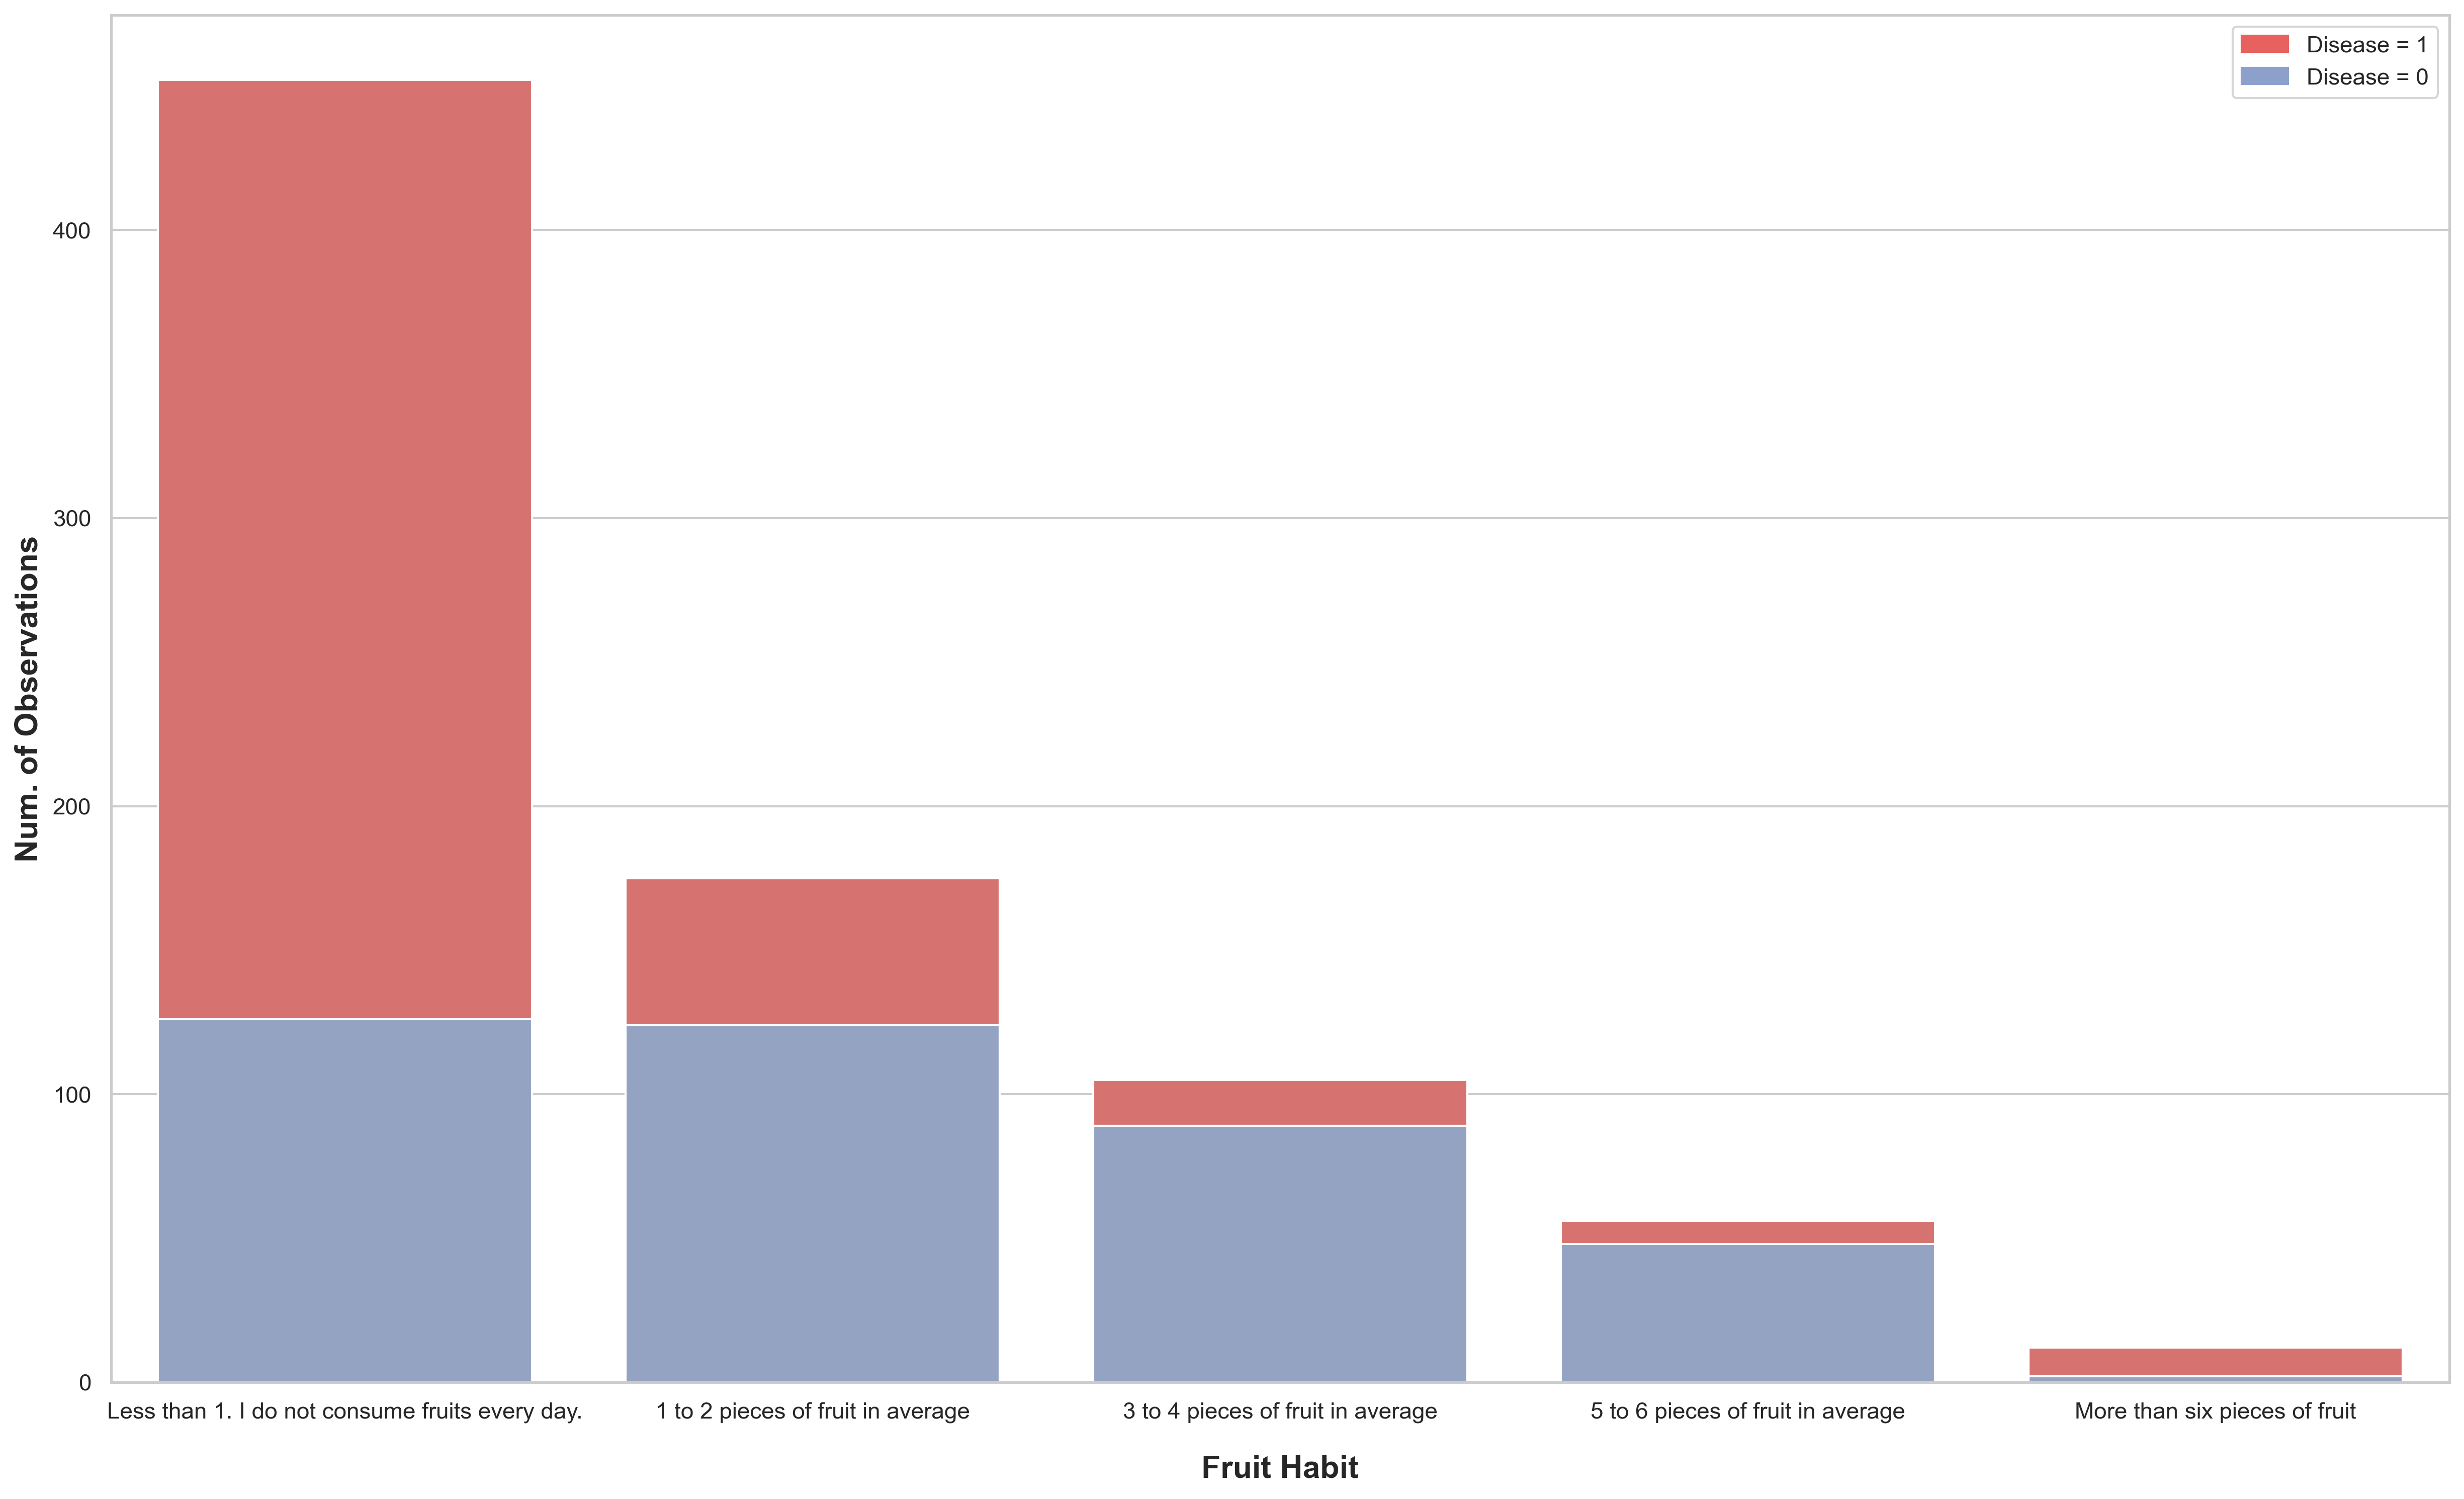

In [26]:
plt.figure(figsize=(20, 12), dpi=300)

# Getting value count
total = train_patient.groupby('Fruit_Habit')['Disease'].count().reset_index()
non_disease = train_patient[train_patient.Disease==0].groupby('Fruit_Habit')['Disease'].count().reset_index()

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.barplot(x="Fruit_Habit", y="Disease", data=total, color='#E7625F', order=list(train_patient['Fruit_Habit'].unique()))

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.barplot(x="Fruit_Habit", y="Disease", data=non_disease, color=sns.color_palette("Set2")[2], order=list(train_patient['Fruit_Habit'].unique()))

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color=sns.color_palette("Set2")[2], label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Fruit Habit", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Fruit_Habit.png', dpi=600, bbox_inches='tight')
plt.show()

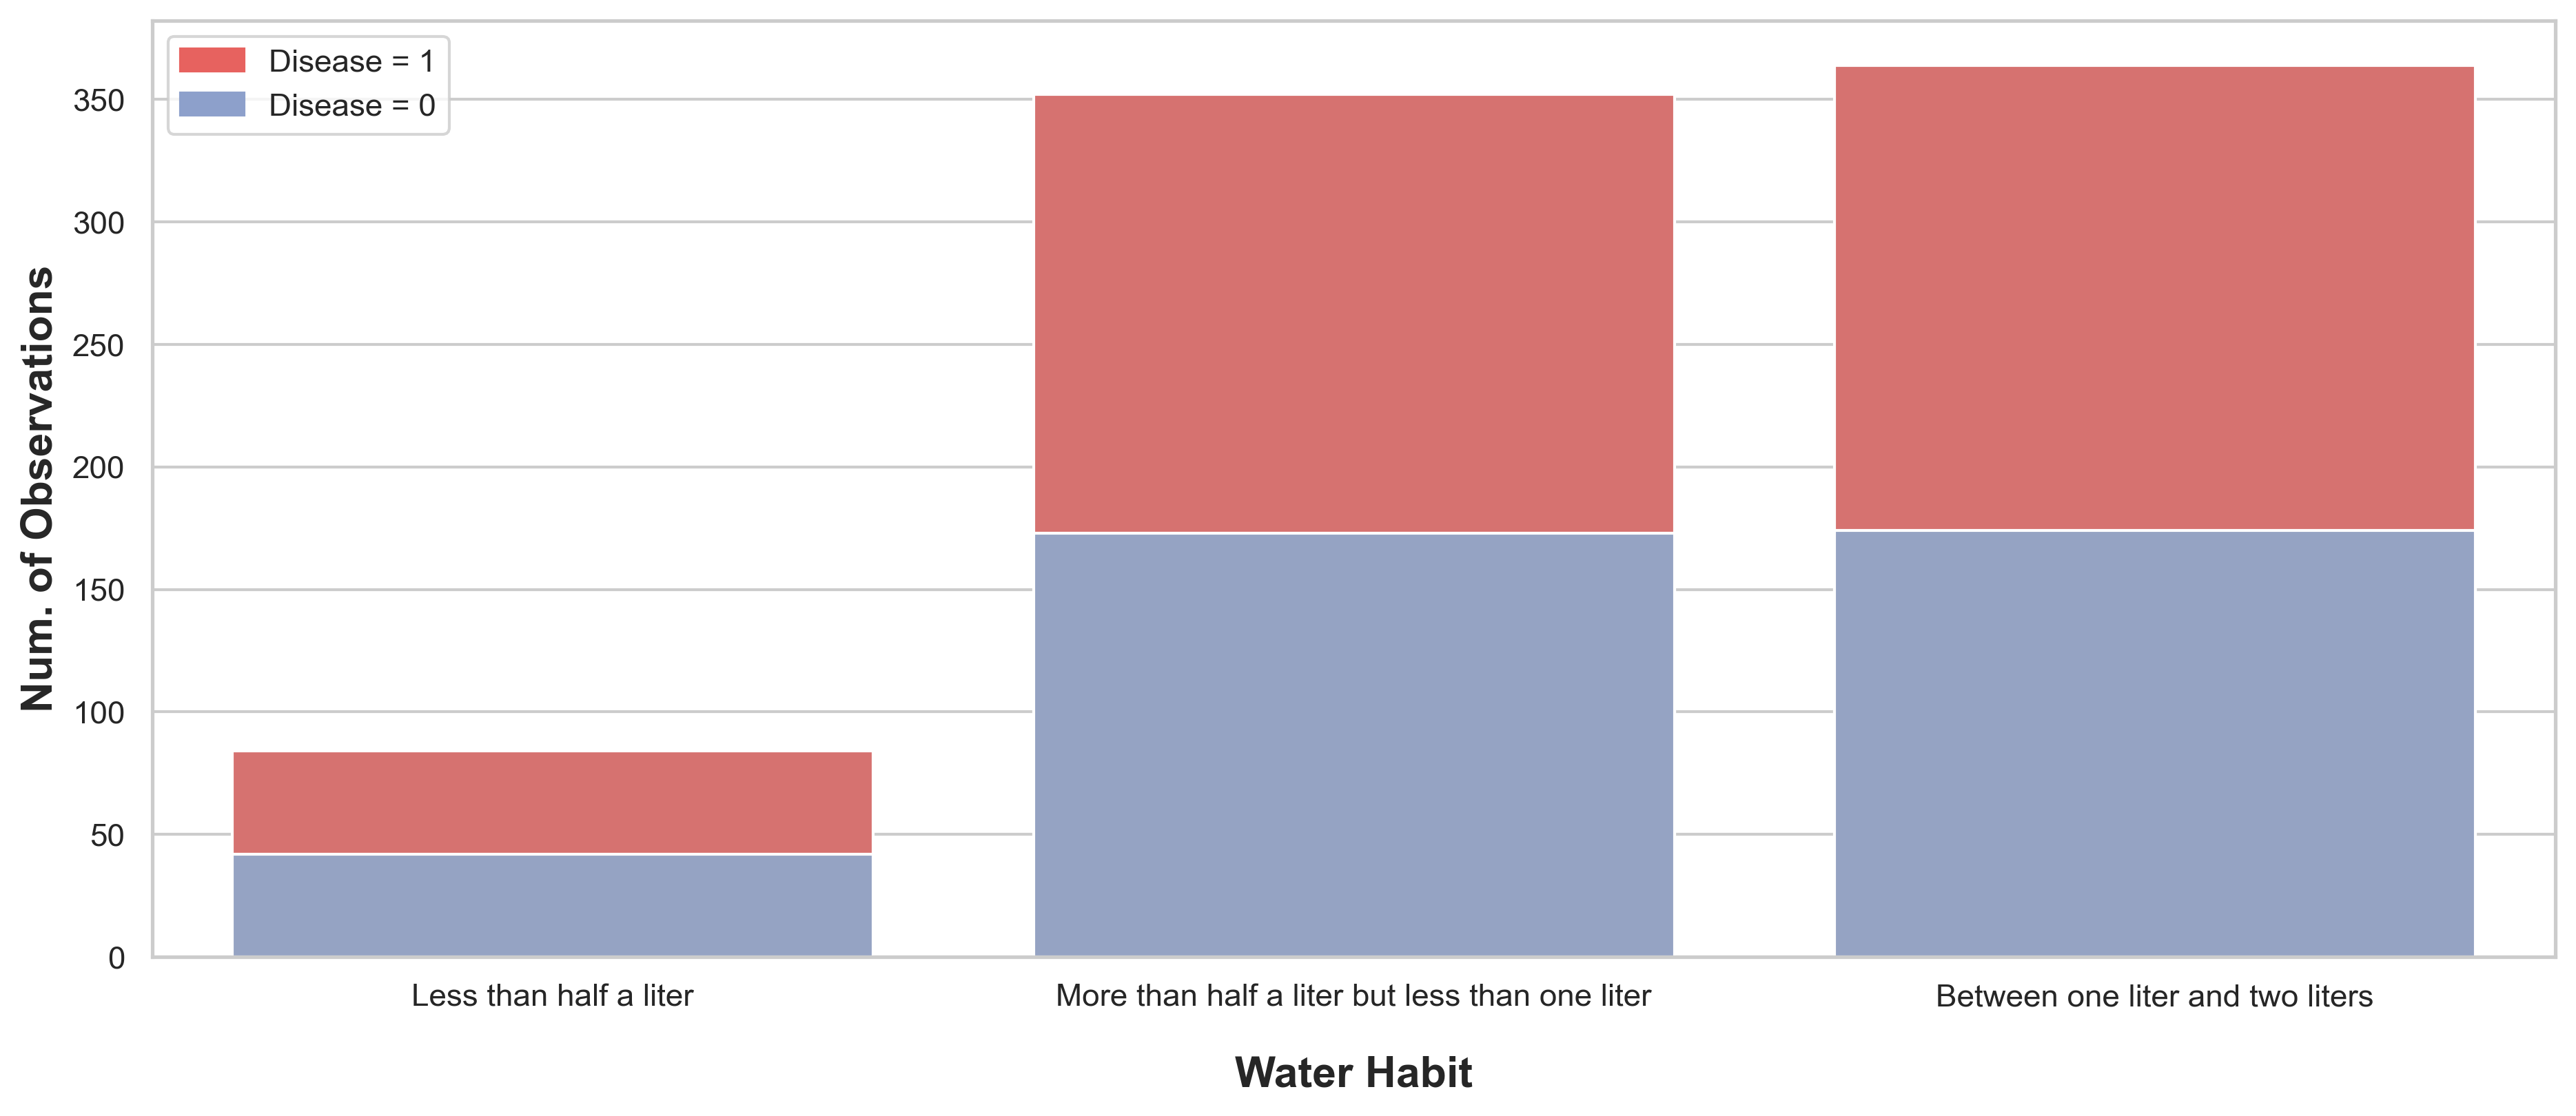

In [27]:
plt.figure(figsize=(15,6), dpi=300)

# Get the correct order of the different values
order = list(train_patient['Water_Habit'].unique())

order.reverse()

# Getting value count
total = train_patient.groupby('Water_Habit')['Disease'].count().reset_index()
non_disease = train_patient[train_patient.Disease==0].groupby('Water_Habit')['Disease'].count().reset_index()

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.barplot(x="Water_Habit", y="Disease", data=total, color='#E7625F', order=order)

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.barplot(x="Water_Habit", y="Disease", data=non_disease, color=sns.color_palette("Set2")[2], order=order)

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color=sns.color_palette("Set2")[2], label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Water Habit", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Water_Habit.png', dpi=600, bbox_inches='tight')
plt.show()

### 1.4.2 Numerical Variables Exploration <a class="anchor" id="numericalvariablesexploration"></a>

In [28]:
cholesterol_categories = pd.cut(train_patient.High_Cholesterol, bins = [0,200,240,float("inf")], labels = ['Desirable','Borderline High','High'])

In [29]:
cholesterol_categories.to_frame()

High_Cholesterol
PatientID                 
1167                  High
1805       Borderline High
1557       Borderline High
1658                  High
1544                  High
...                    ...
1909       Borderline High
1386       Borderline High
1088                  High
1662       Borderline High
1117             Desirable

[800 rows x 1 columns]

In [30]:
non_disease = train_patient[train_patient['Disease'] == 0]['Disease'].to_frame().join(cholesterol_categories)

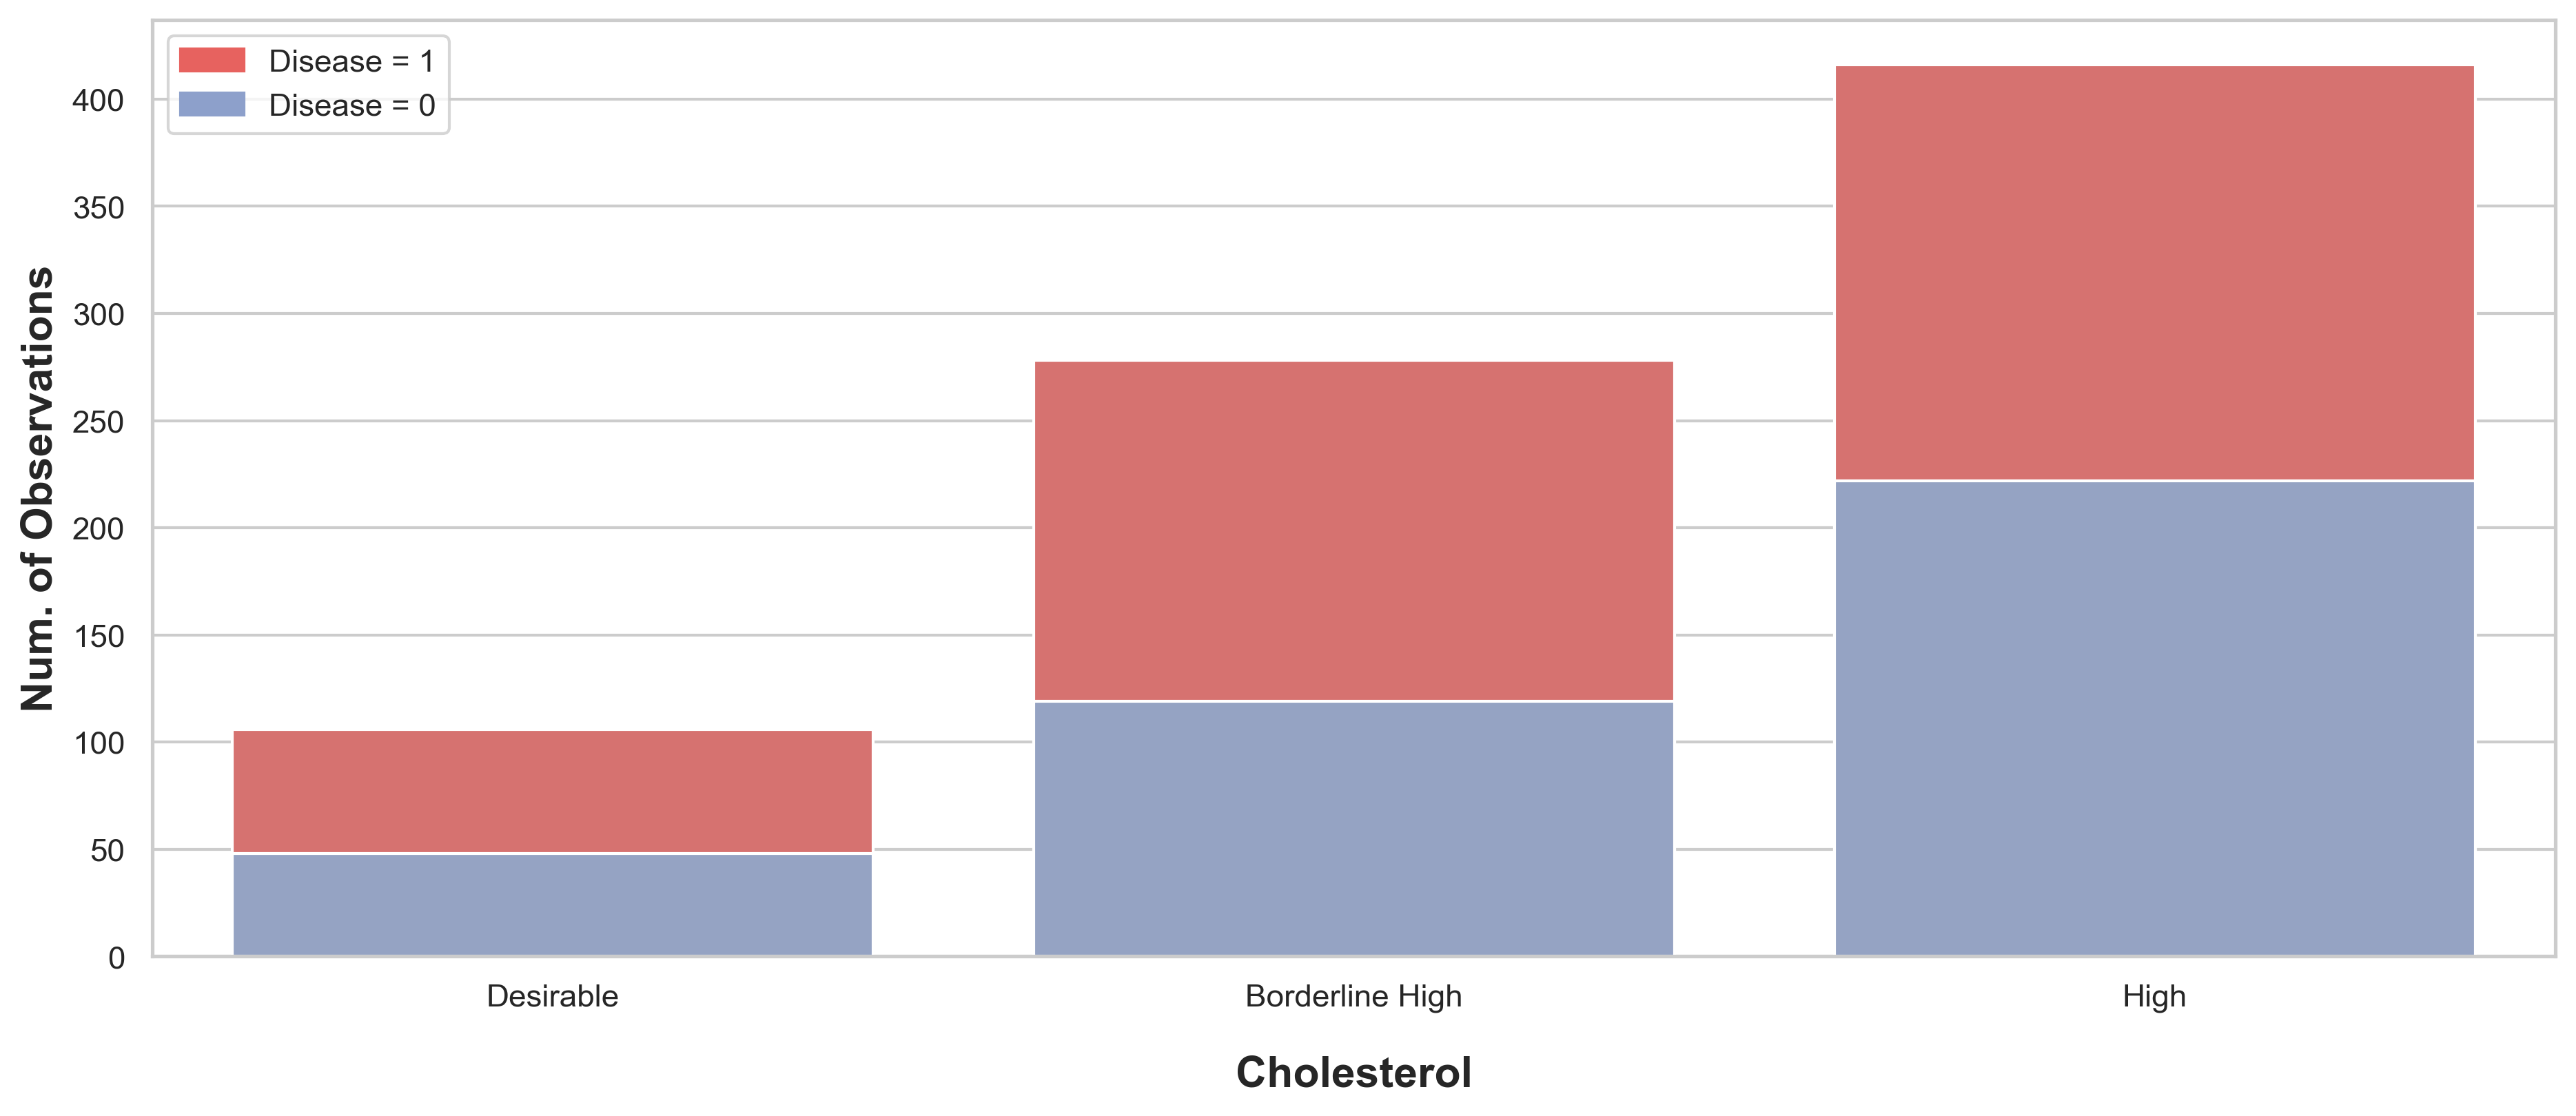

In [31]:
plt.figure(figsize=(15, 6), dpi=300)

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.countplot(x=cholesterol_categories, color='#E7625F')

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.countplot(x="High_Cholesterol", data=non_disease, color=sns.color_palette("Set2")[2])

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color=sns.color_palette("Set2")[2], label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Cholesterol", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Cholesterol.png', dpi=600, bbox_inches='tight')
plt.show()

In [32]:
pd.DataFrame(cholesterol_categories.value_counts(normalize = True)).rename(columns={"High_Cholesterol": "% of people"})

% of people
High                  0.5200
Borderline High       0.3475
Desirable             0.1325

In [33]:
blood_pressure_categories = pd.qcut(train_patient.Blood_Pressure, q=4, labels = ['Low',"Regular","High","Very High"])

In [34]:
blood_pressure_categories.to_frame()

Blood_Pressure
PatientID               
1167                 Low
1805           Very High
1557             Regular
1658             Regular
1544             Regular
...                  ...
1909           Very High
1386                 Low
1088                High
1662                 Low
1117                 Low

[800 rows x 1 columns]

In [35]:
non_disease = train_patient[train_patient['Disease'] == 0]['Disease'].to_frame().join(blood_pressure_categories)

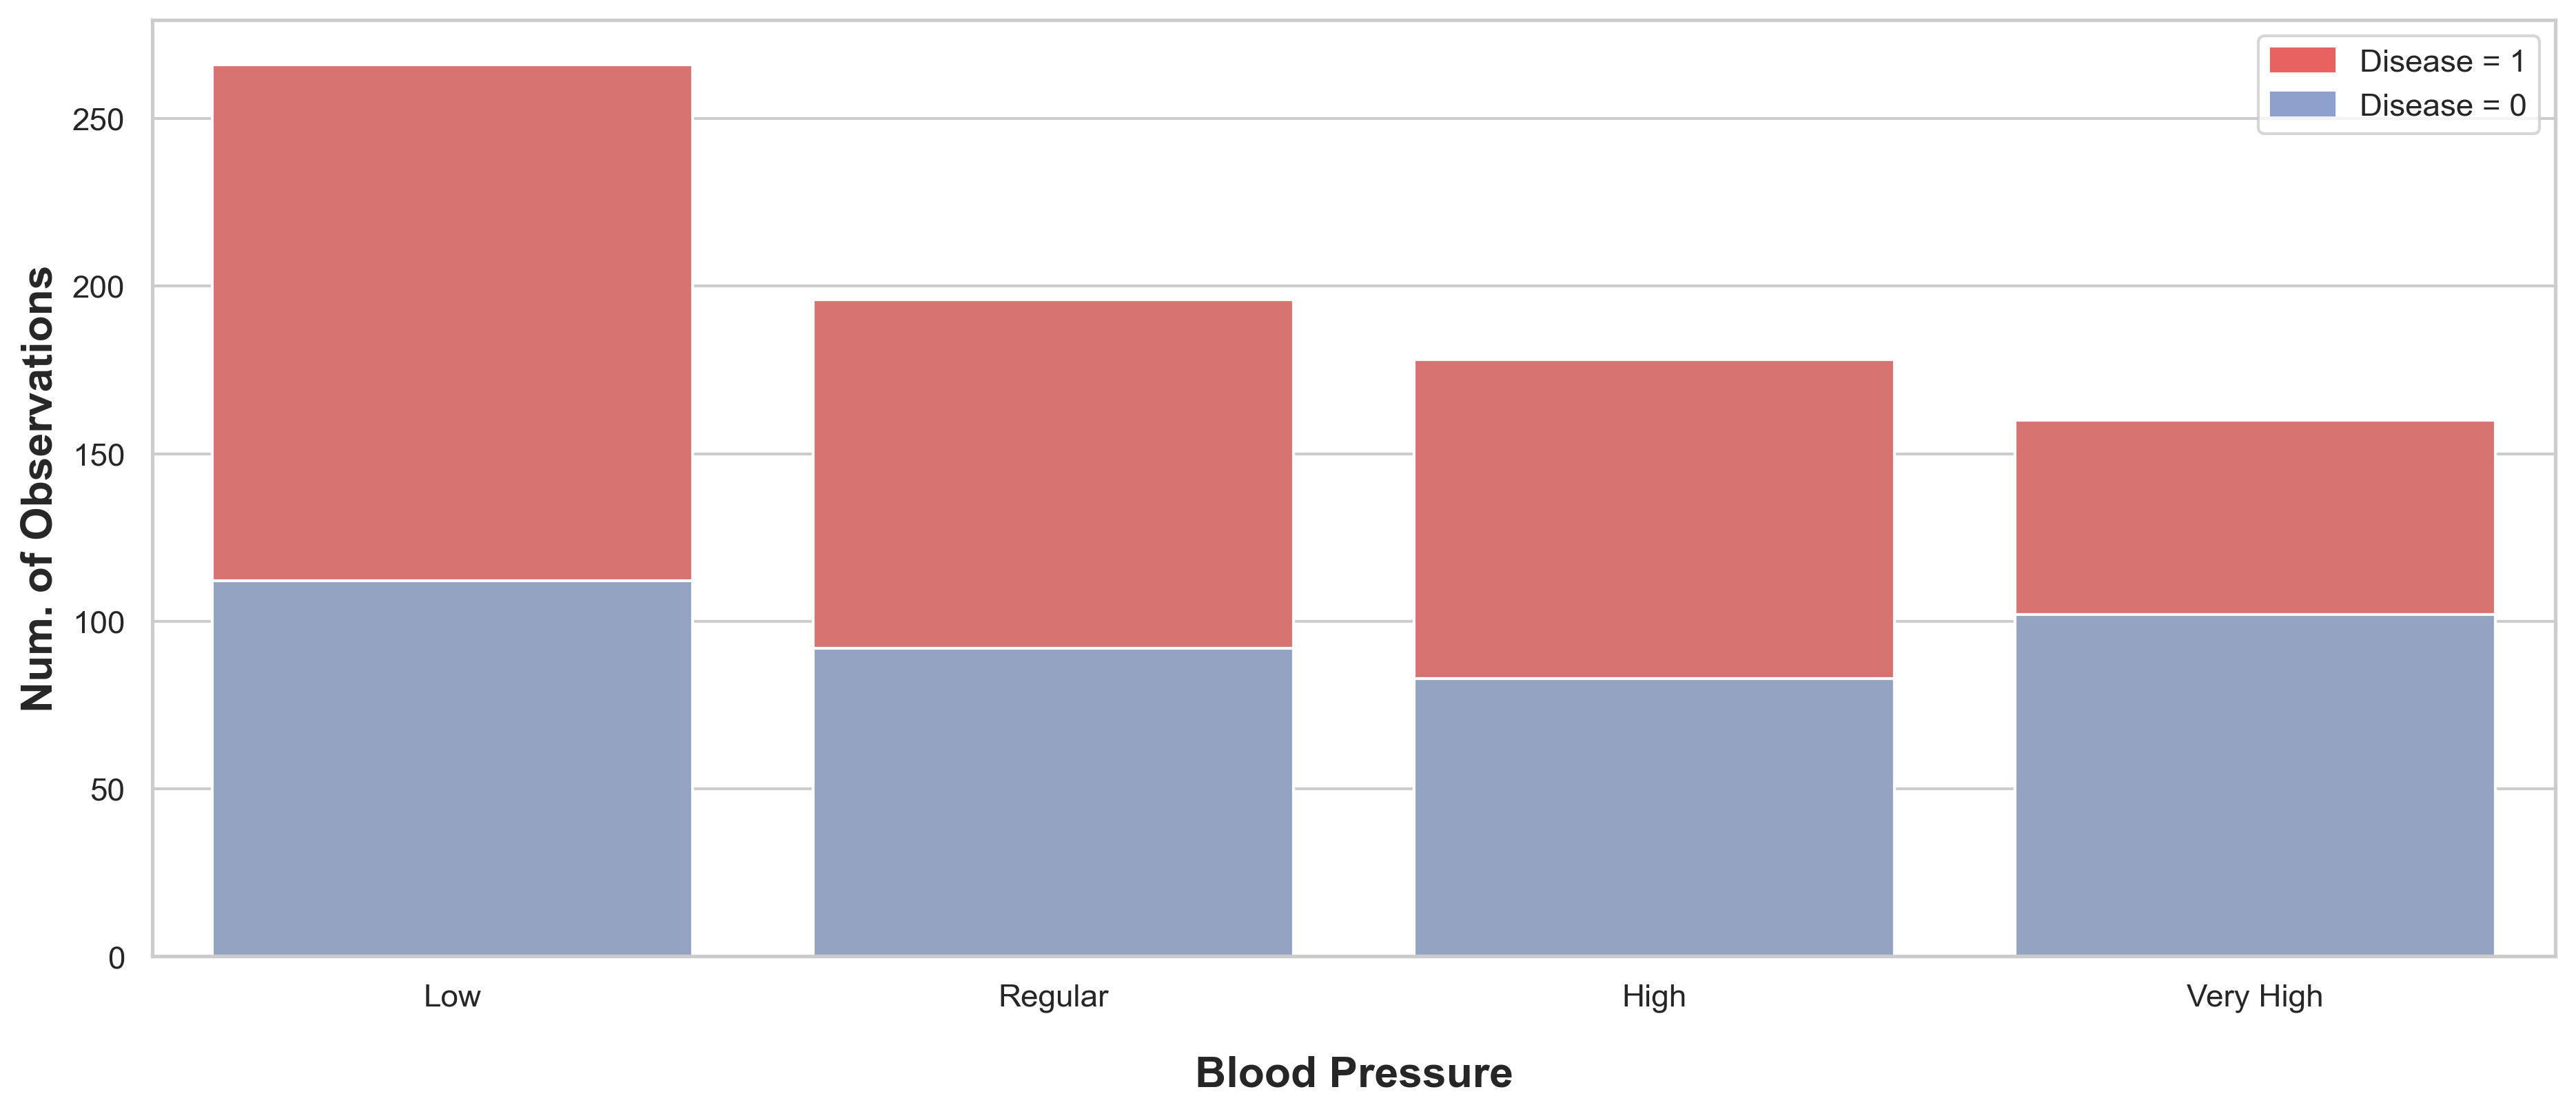

In [36]:
plt.figure(figsize=(15, 6), dpi=300)

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.countplot(x=blood_pressure_categories, color='#E7625F')

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.countplot(x="Blood_Pressure", data=non_disease, color=sns.color_palette("Set2")[2])

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color=sns.color_palette("Set2")[2], label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Blood Pressure", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_BloodPressure.png', dpi=600, bbox_inches='tight')
plt.show()

In [37]:
pd.DataFrame(blood_pressure_categories.value_counts(normalize = True)).rename(columns={"Blood_Pressure": "% of people"})

% of people
Low             0.3325
Regular         0.2450
High            0.2225
Very High       0.2000

In [368]:
plt.figure(figsize=(7, 7), dpi=300)

# use the scatterplot function to build the bubble map
sns.scatterplot(data=train_patient.groupby(['Mental_Health', 'Physical_Health', 'Disease'])['Disease'].size(), 
                x="Mental_Health", 
                y="Physical_Health", 
                hue="Disease", 
                size=train_patient.groupby(['Mental_Health', 'Physical_Health', 'Disease'])['Disease'].size().values,
                legend=False, 
                sizes=(20, 2000), 
                palette=[sns.color_palette("Set2")[2], '#E7625F'],
                alpha=0.8)

# Add legend
label1 = mpatches.Patch(color='#E7625F', label='Disease = 1')
label2 = mpatches.Patch(color=sns.color_palette("Set2")[2], label='Disease = 0')
plt.legend(handles=[label1, label2])
plt.xlabel("Mental Health", labelpad=5, size=12, fontweight='bold')
plt.ylabel("Physical Health", size=12, fontweight='bold')
plt.suptitle("How are Mental and Physical Health Related to the Disease?", fontweight="bold", fontsize=14)

plt.savefig('Figures/MentalPhysical_ScatterPlot.png', dpi=600, bbox_inches='tight')

# show the graph
plt.show()

KeyError: 'Disease'

<Figure size 2100x2100 with 0 Axes>

In [ ]:
plt.figure(figsize=(7, 7), dpi=300)

# use the scatterplot function to build the bubble map
sns.scatterplot(data=train_patient.groupby(['Weight', 'Height', 'Disease'])['Disease'].size(), 
                x="Weight", 
                y="Height", 
                hue="Disease", 
                size=train_patient.groupby(['Weight', 'Height', 'Disease'])['Disease'].size().values,
                legend=False, 
                sizes=(20, 2000), 
                palette=[sns.color_palette("Set2")[2], '#E7625F'],
                alpha=0.8)

# Add legend
label1 = mpatches.Patch(color='#E7625F', label='Disease = 1')
label2 = mpatches.Patch(color=sns.color_palette("Set2")[2], label='Disease = 0')
plt.legend(handles=[label1, label2])
plt.xlabel("Weight (in kg)", labelpad=5, size=12, fontweight='bold')
plt.ylabel("Height (in cm)", size=12, fontweight='bold')
plt.suptitle("How are Weight and Height Related to the Disease?", fontweight="bold", fontsize=14)

plt.savefig('Figures/WeightHeight_ScatterPlot.png', dpi=600, bbox_inches='tight')

# show the graph
plt.show()

## 2. Data Preparation and Preprocessing <a class="anchor" id="datapreprocessing"></a>

### 2.1 Coherence checking <a class="anchor" id="coherence"></a>

Mental and Physical health variables refer only to the last 30 days, therefore none of them should have a value greater than 30 or smaller than 0.

In [38]:
print("The maximum number of days in which a person had mental difficulties was", train_patient["Mental_Health"].max(), "and the least number of days was", train_patient["Mental_Health"].min())

The maximum number of days in which a person had mental difficulties was 29 and the least number of days was 0


In [39]:
print("The maximum number of days in which a person had physical difficulties was", train_patient["Physical_Health"].max(), "and the least number of days was", train_patient["Physical_Health"].min())

The maximum number of days in which a person had physical difficulties was 30 and the least number of days was 0


In [40]:
train_patient["Region"].value_counts()

East Midlands               154
London                      136
South West                  107
West Midlands                89
South East                   84
East of England              80
Yorkshire and the Humber     64
North West                   59
North East                   22
LONDON                        5
Name: Region, dtype: int64

We can see that there is value were London is written in CAPS LOCK. This is something we must take care of.

In [41]:
train_patient.replace(to_replace="LONDON", value="London", inplace=True, limit=None)

In [42]:
train_patient["Region"].value_counts()

East Midlands               154
London                      141
South West                  107
West Midlands                89
South East                   84
East of England              80
Yorkshire and the Humber     64
North West                   59
North East                   22
Name: Region, dtype: int64

### 2.2 Feature Engineering <a class="anchor" id="featureengineering"></a>

Creating a gender variable based on the prefix in the Name.

In [43]:
#Create variable Gender
gender = []

for elem in train_patient['Name']:
        if "Mr." in elem:
            gender.append("M")
    
        elif "Miss" or "Mrs." in elem:
            gender.append("F")
    
gender = np.asarray(gender)

train_patient['Gender'] = gender

print(train_patient['Gender'])

PatientID
1167    F
1805    M
1557    M
1658    M
1544    M
       ..
1909    M
1386    F
1088    F
1662    M
1117    M
Name: Gender, Length: 800, dtype: object


Converting the Birth Year to Age by subtracting it to the current Year.

In [44]:
train_patient['Age'] = datetime.now().year - train_patient['Birth_Year'] 
print(train_patient['Age'])

PatientID
1167     57
1805     53
1557     48
1658     64
1544     54
       ... 
1909     50
1386     42
1088    162
1662     47
1117     43
Name: Age, Length: 800, dtype: int64


Creating a variable of Body Mass Index using the Weight and Height variables.

In [45]:
#Create variable BMI     
train_patient['BMI'] = (train_patient['Weight']/(train_patient['Height']**2)*10000).round(2)

print(train_patient['BMI'])

PatientID
1167    27.89
1805    29.40
1557    25.91
1658    20.37
1544    17.90
        ...  
1909    19.25
1386    24.75
1088    17.21
1662    27.55
1117    23.39
Name: BMI, Length: 800, dtype: float64


In [46]:
train_patient.BMI.describe()

count    800.000000
mean      24.039500
std        3.658627
min       16.980000
25%       20.830000
50%       24.380000
75%       27.145000
max       30.120000
Name: BMI, dtype: float64

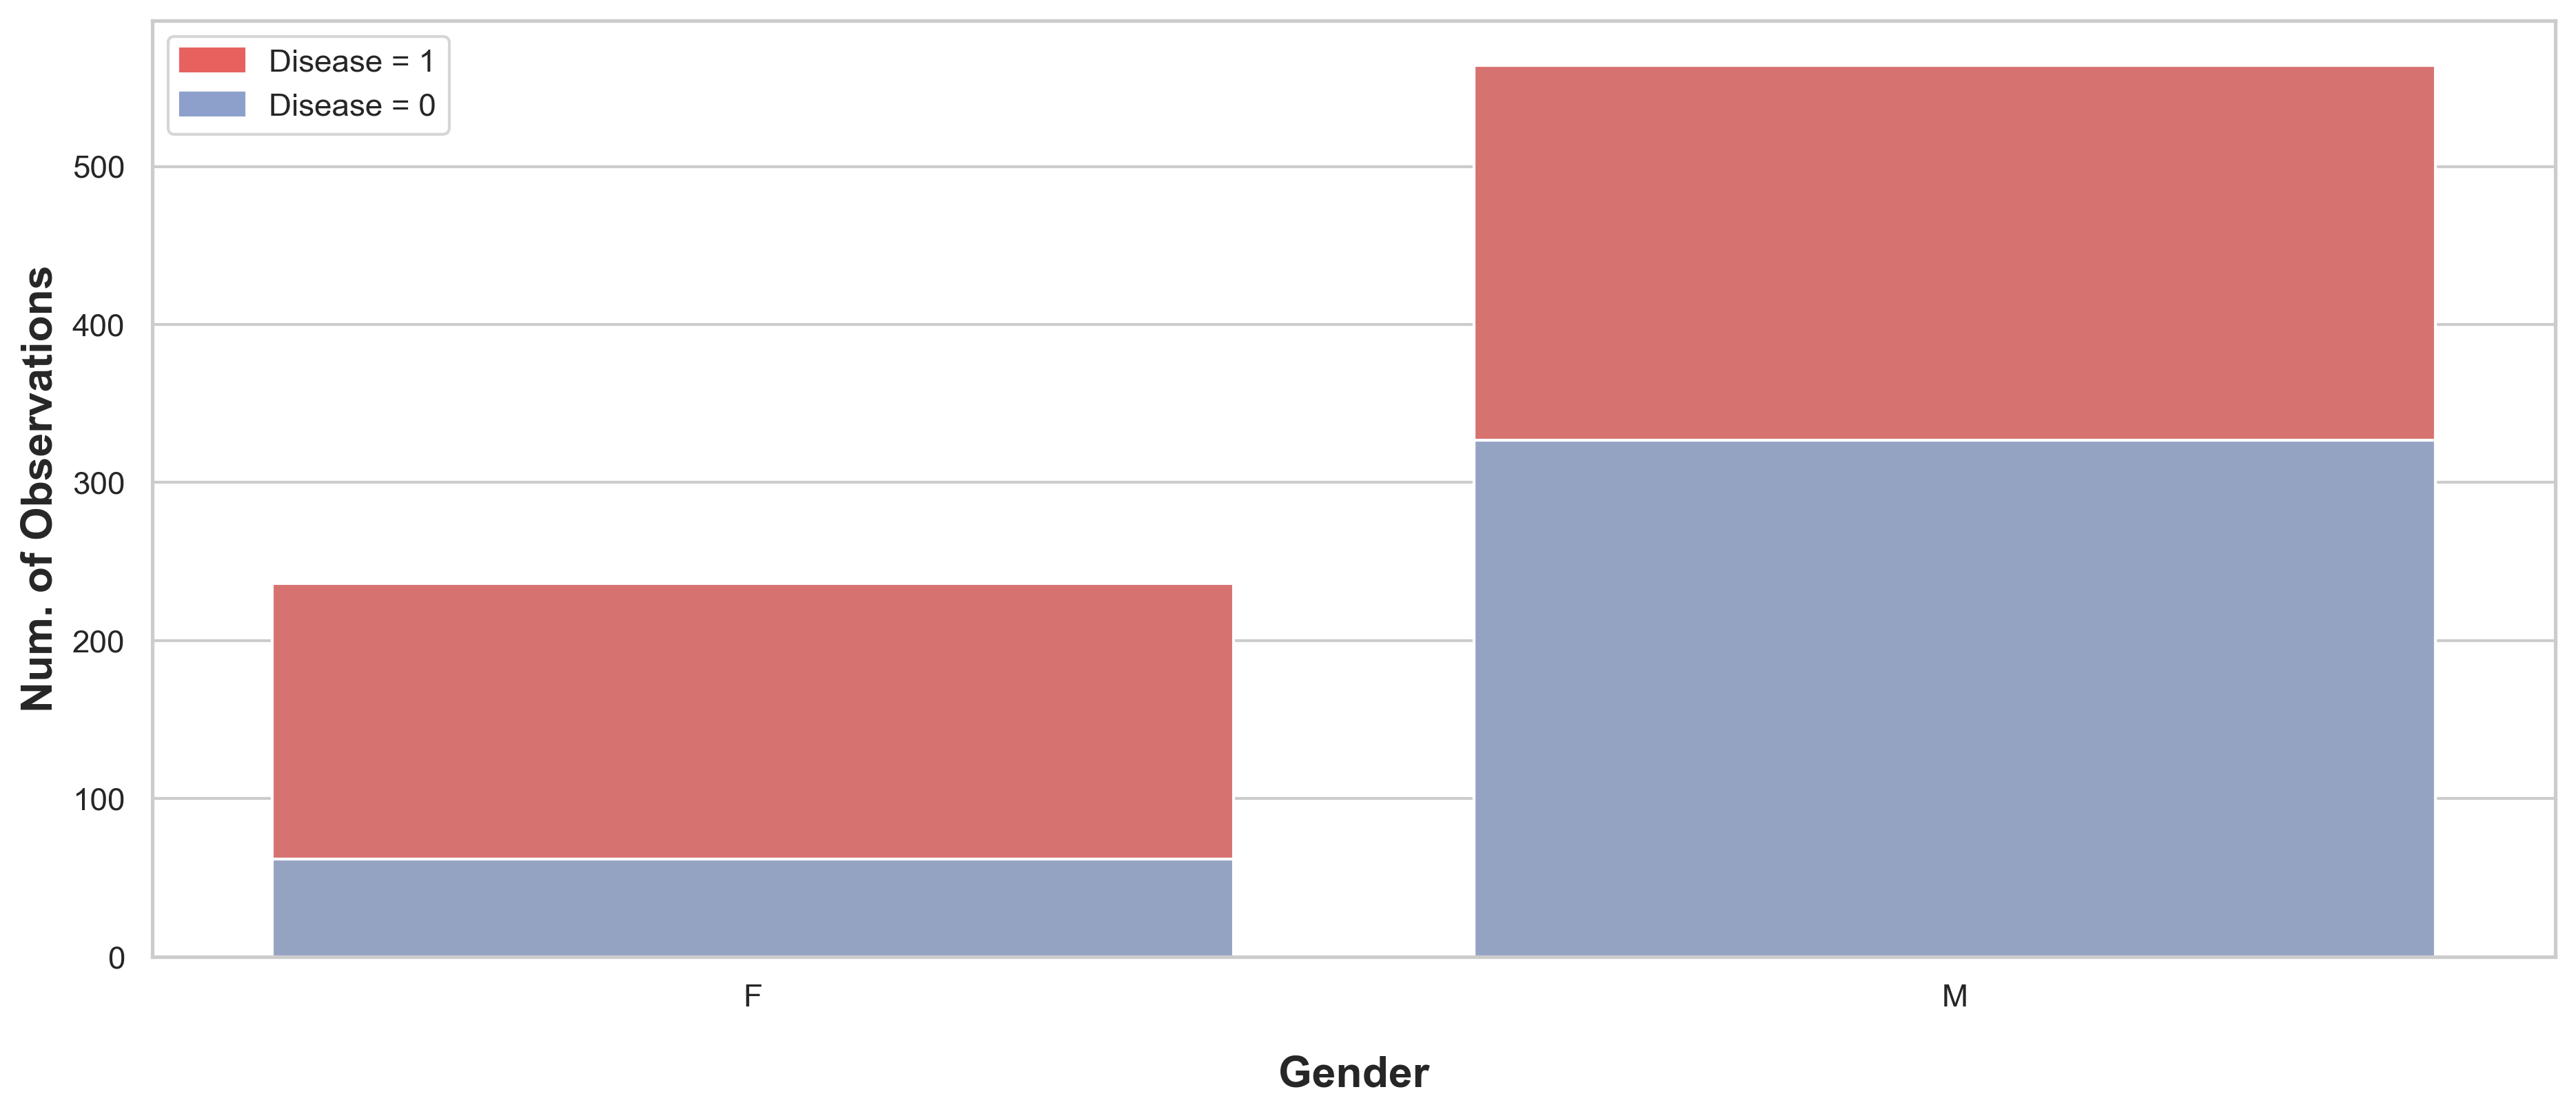

In [47]:
plt.figure(figsize=(15, 6), dpi=300)

# Getting value count
total = train_patient.groupby('Gender')['Disease'].count().reset_index()
non_disease = train_patient[train_patient.Disease==0].groupby('Gender')['Disease'].count().reset_index()

# Bar chart 1 -> top bars (group of 'Disease=1')
bar1 = sns.barplot(x="Gender", y="Disease", data=total, color='#E7625F')

# Bar chart 2 -> bottom bars (group of 'Disease=0')
bar2 = sns.barplot(x="Gender", y="Disease", data=non_disease, color=sns.color_palette("Set2")[2])

# Add legend
top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color=sns.color_palette("Set2")[2], label='Disease = 0')
plt.legend(handles=[top_bar, bottom_bar])
plt.xlabel("Gender", labelpad=15, size=15, fontweight='bold')
plt.ylabel("Num. of Observations", size=15, fontweight='bold')

plt.savefig('Figures/BarChart_Gender.png', dpi=600, bbox_inches='tight')
plt.show()

### 2.3 Treating Missing Values <a class="anchor" id="treatingmissingvalues"></a>

As we have seen, the only variable which had missing values was Education. Since it is a categorical variable, we will now fill the missing values using the mode.

In [48]:
train_patient['Education'].fillna(train_patient['Education'].mode()[0], inplace=True)

Checking that we no longer have missing values.

In [49]:
train_patient.isna().sum()

Name                0
Birth_Year          0
Region              0
Education           0
Disease             0
Height              0
Weight              0
High_Cholesterol    0
Blood_Pressure      0
Mental_Health       0
Physical_Health     0
Checkup             0
Diabetes            0
Smoking_Habit       0
Drinking_Habit      0
Exercise            0
Fruit_Habit         0
Water_Habit         0
Gender              0
Age                 0
BMI                 0
dtype: int64

### 2.4 Outlier analysis <a class="anchor" id="outlieranalysis"></a>

Modifying the previously created variable for all the numerical features by replacing Birth_Year by Age and removing the dependent variable.

In [50]:
train_patient_num.drop(["Birth_Year"],axis = 1, inplace=True)
train_patient_num["Age"] = train_patient['Age']
train_patient_num

Disease  Height  Weight  High_Cholesterol  Blood_Pressure  \
PatientID                                                              
1167             1     155      67               358             120   
1805             1     173      88               230             142   
1557             1     162      68               226             122   
1658             0     180      66               313             125   
1544             1     180      58               277             125   
...            ...     ...     ...               ...             ...   
1909             0     178      61               204             144   
1386             1     157      61               213             120   
1088             0     167      48               272             140   
1662             1     165      75               208             112   
1117             0     173      70               181             120   

           Mental_Health  Physical_Health  Age  
PatientID                                       
1167                  21                2   57  
1805                   9                0   53  
1557                  26                0   48  
1658                  13                8   64  
1544                  18                2   54  
...                  ...              ...  ...  
1909                  12                4   50  
1386                  23                0   42  
1088                  20               17  162  
1662                  16                0   47  
1117                  11               12   43  

[800 rows x 8 columns]

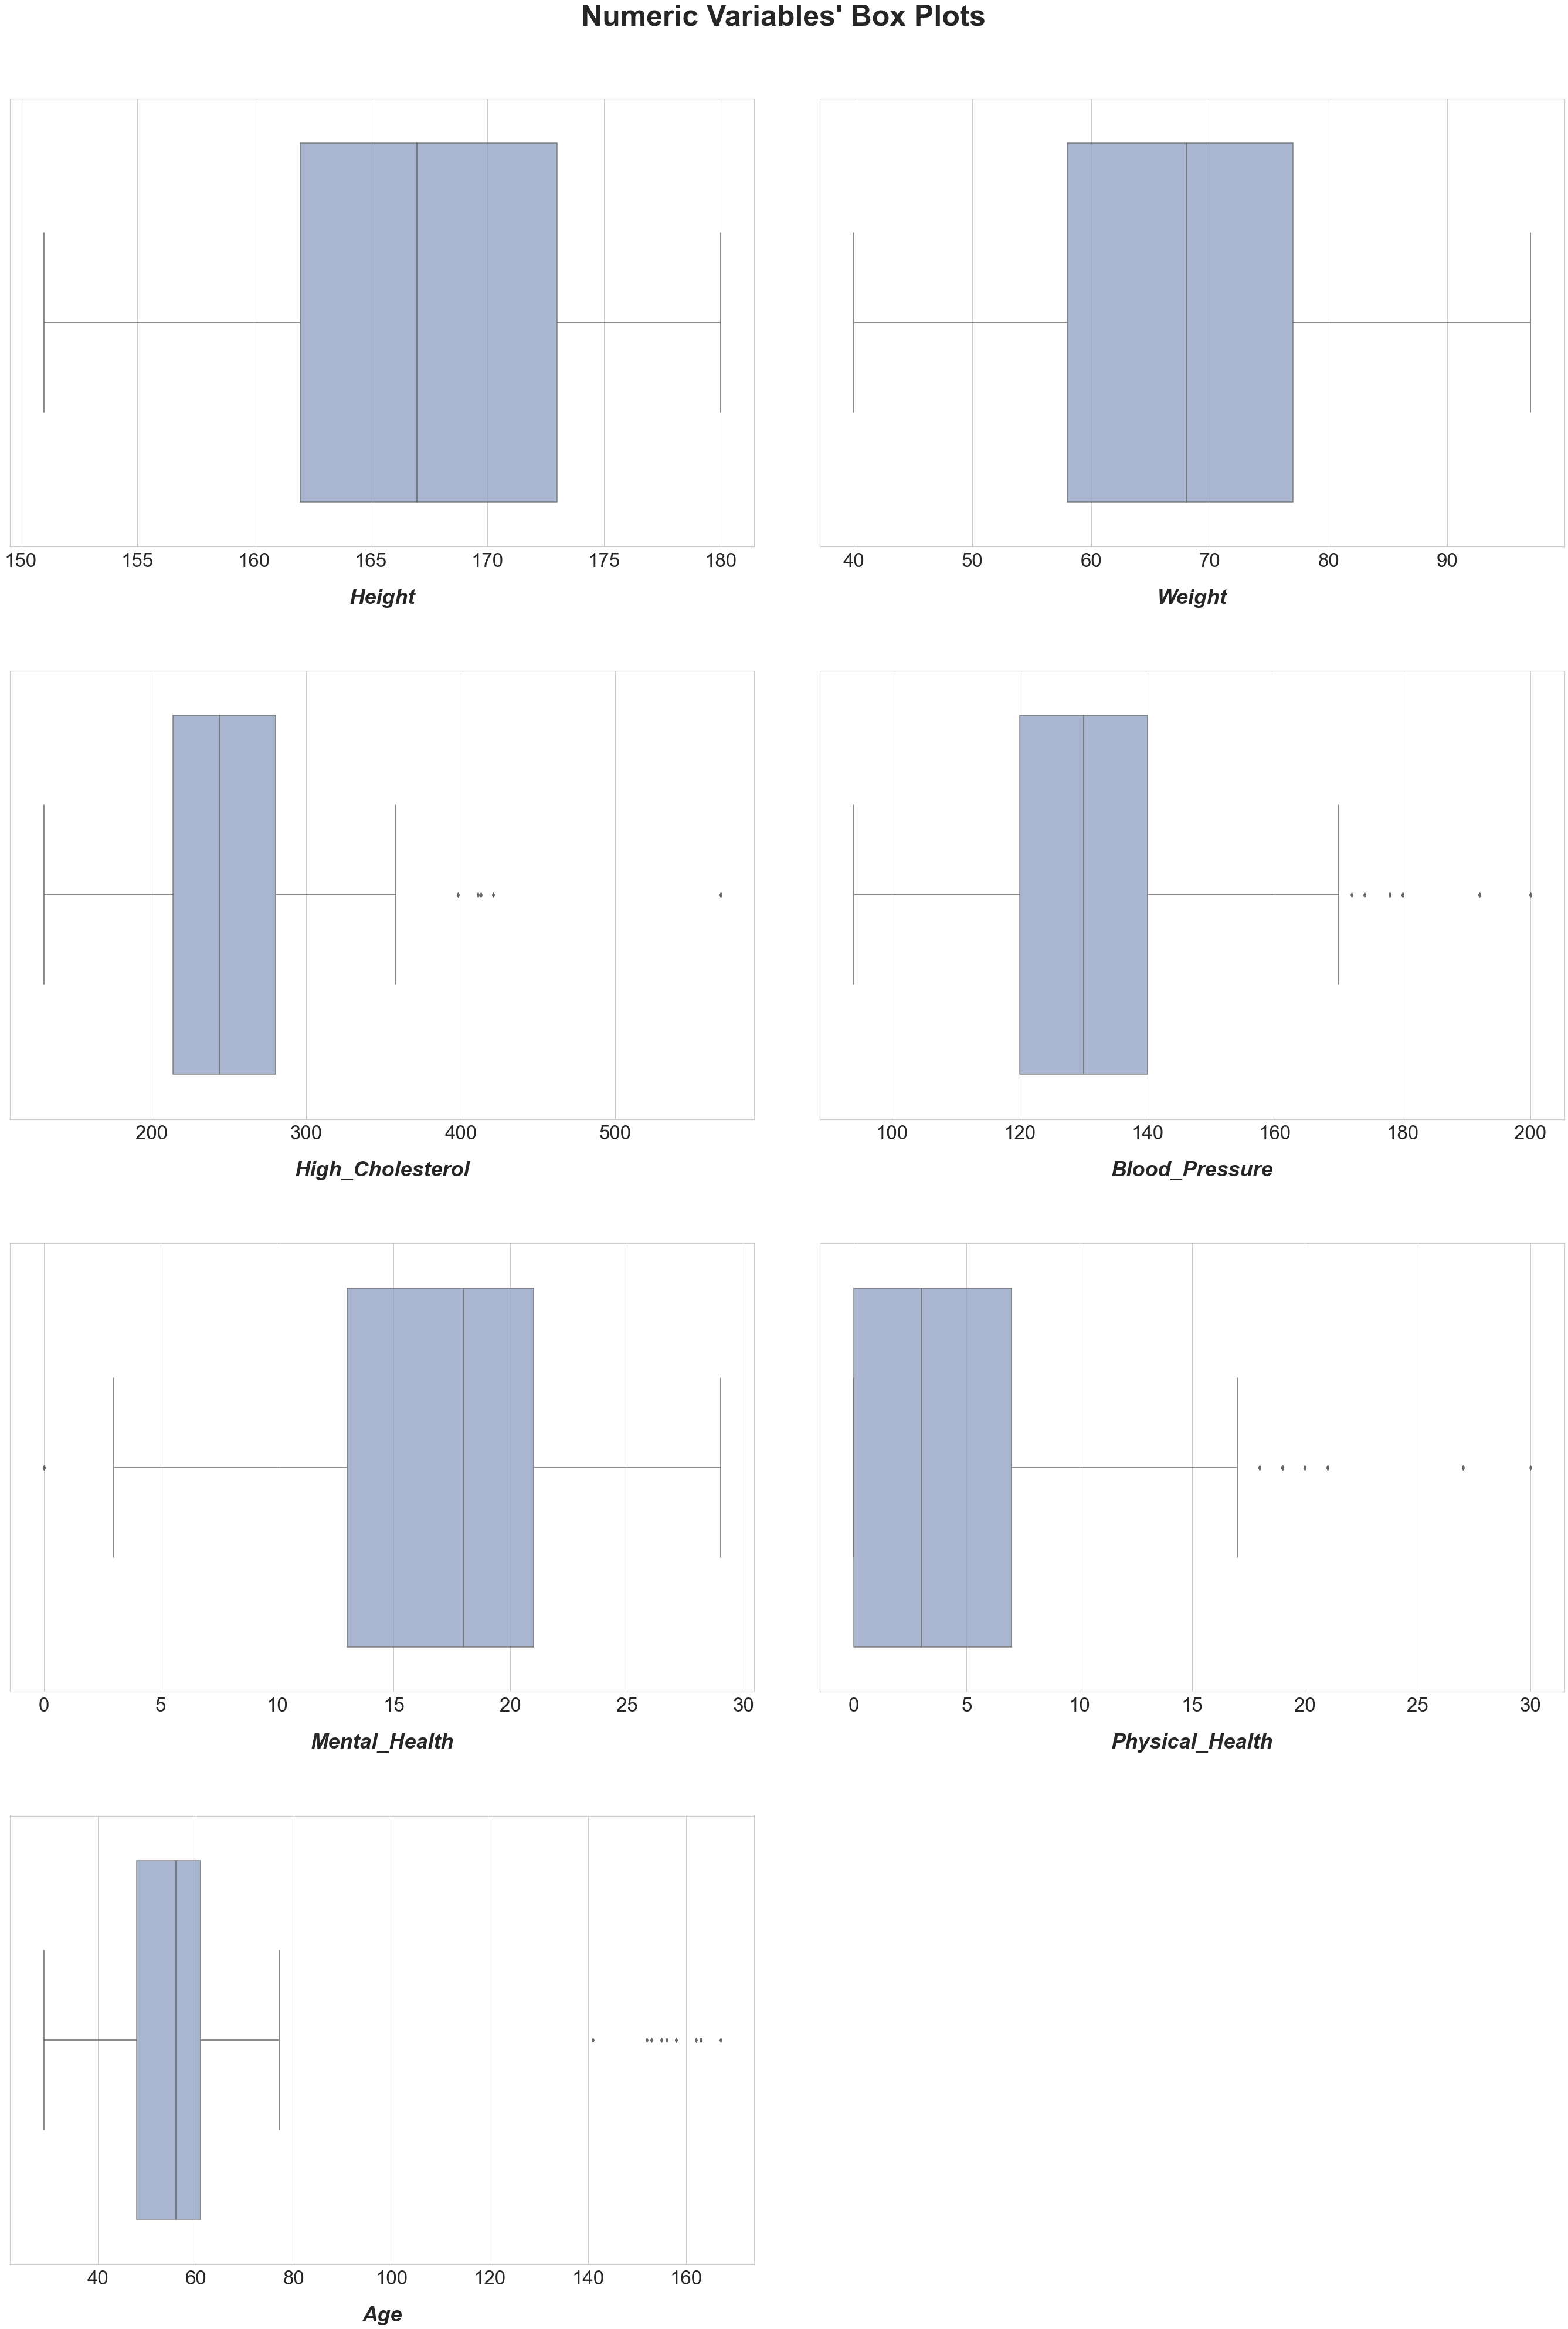

In [51]:
sns.set(font_scale=3)
sns.set_style("whitegrid")

# Get array of features
data = train_patient_num.columns.values[1:]

a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(40, 70))

# Building the Boxplots
for i in data:
    plt.subplot(a, b, c)
    plt.xlabel(i, fontweight="bold", fontstyle="italic", labelpad=30)
    sns.boxplot(x=train_patient[i], color=sns.color_palette("Set2")[2], boxprops=dict(alpha=.8))
    c = c + 1

# Layout
title = "Numeric Variables' Box Plots"
plt.suptitle(title, fontsize=50, fontweight="bold")
plt.tight_layout(pad=3)

plt.savefig('Figures/Num_Variables_BoxPlots.png', dpi=300, bbox_inches='tight')
plt.show()

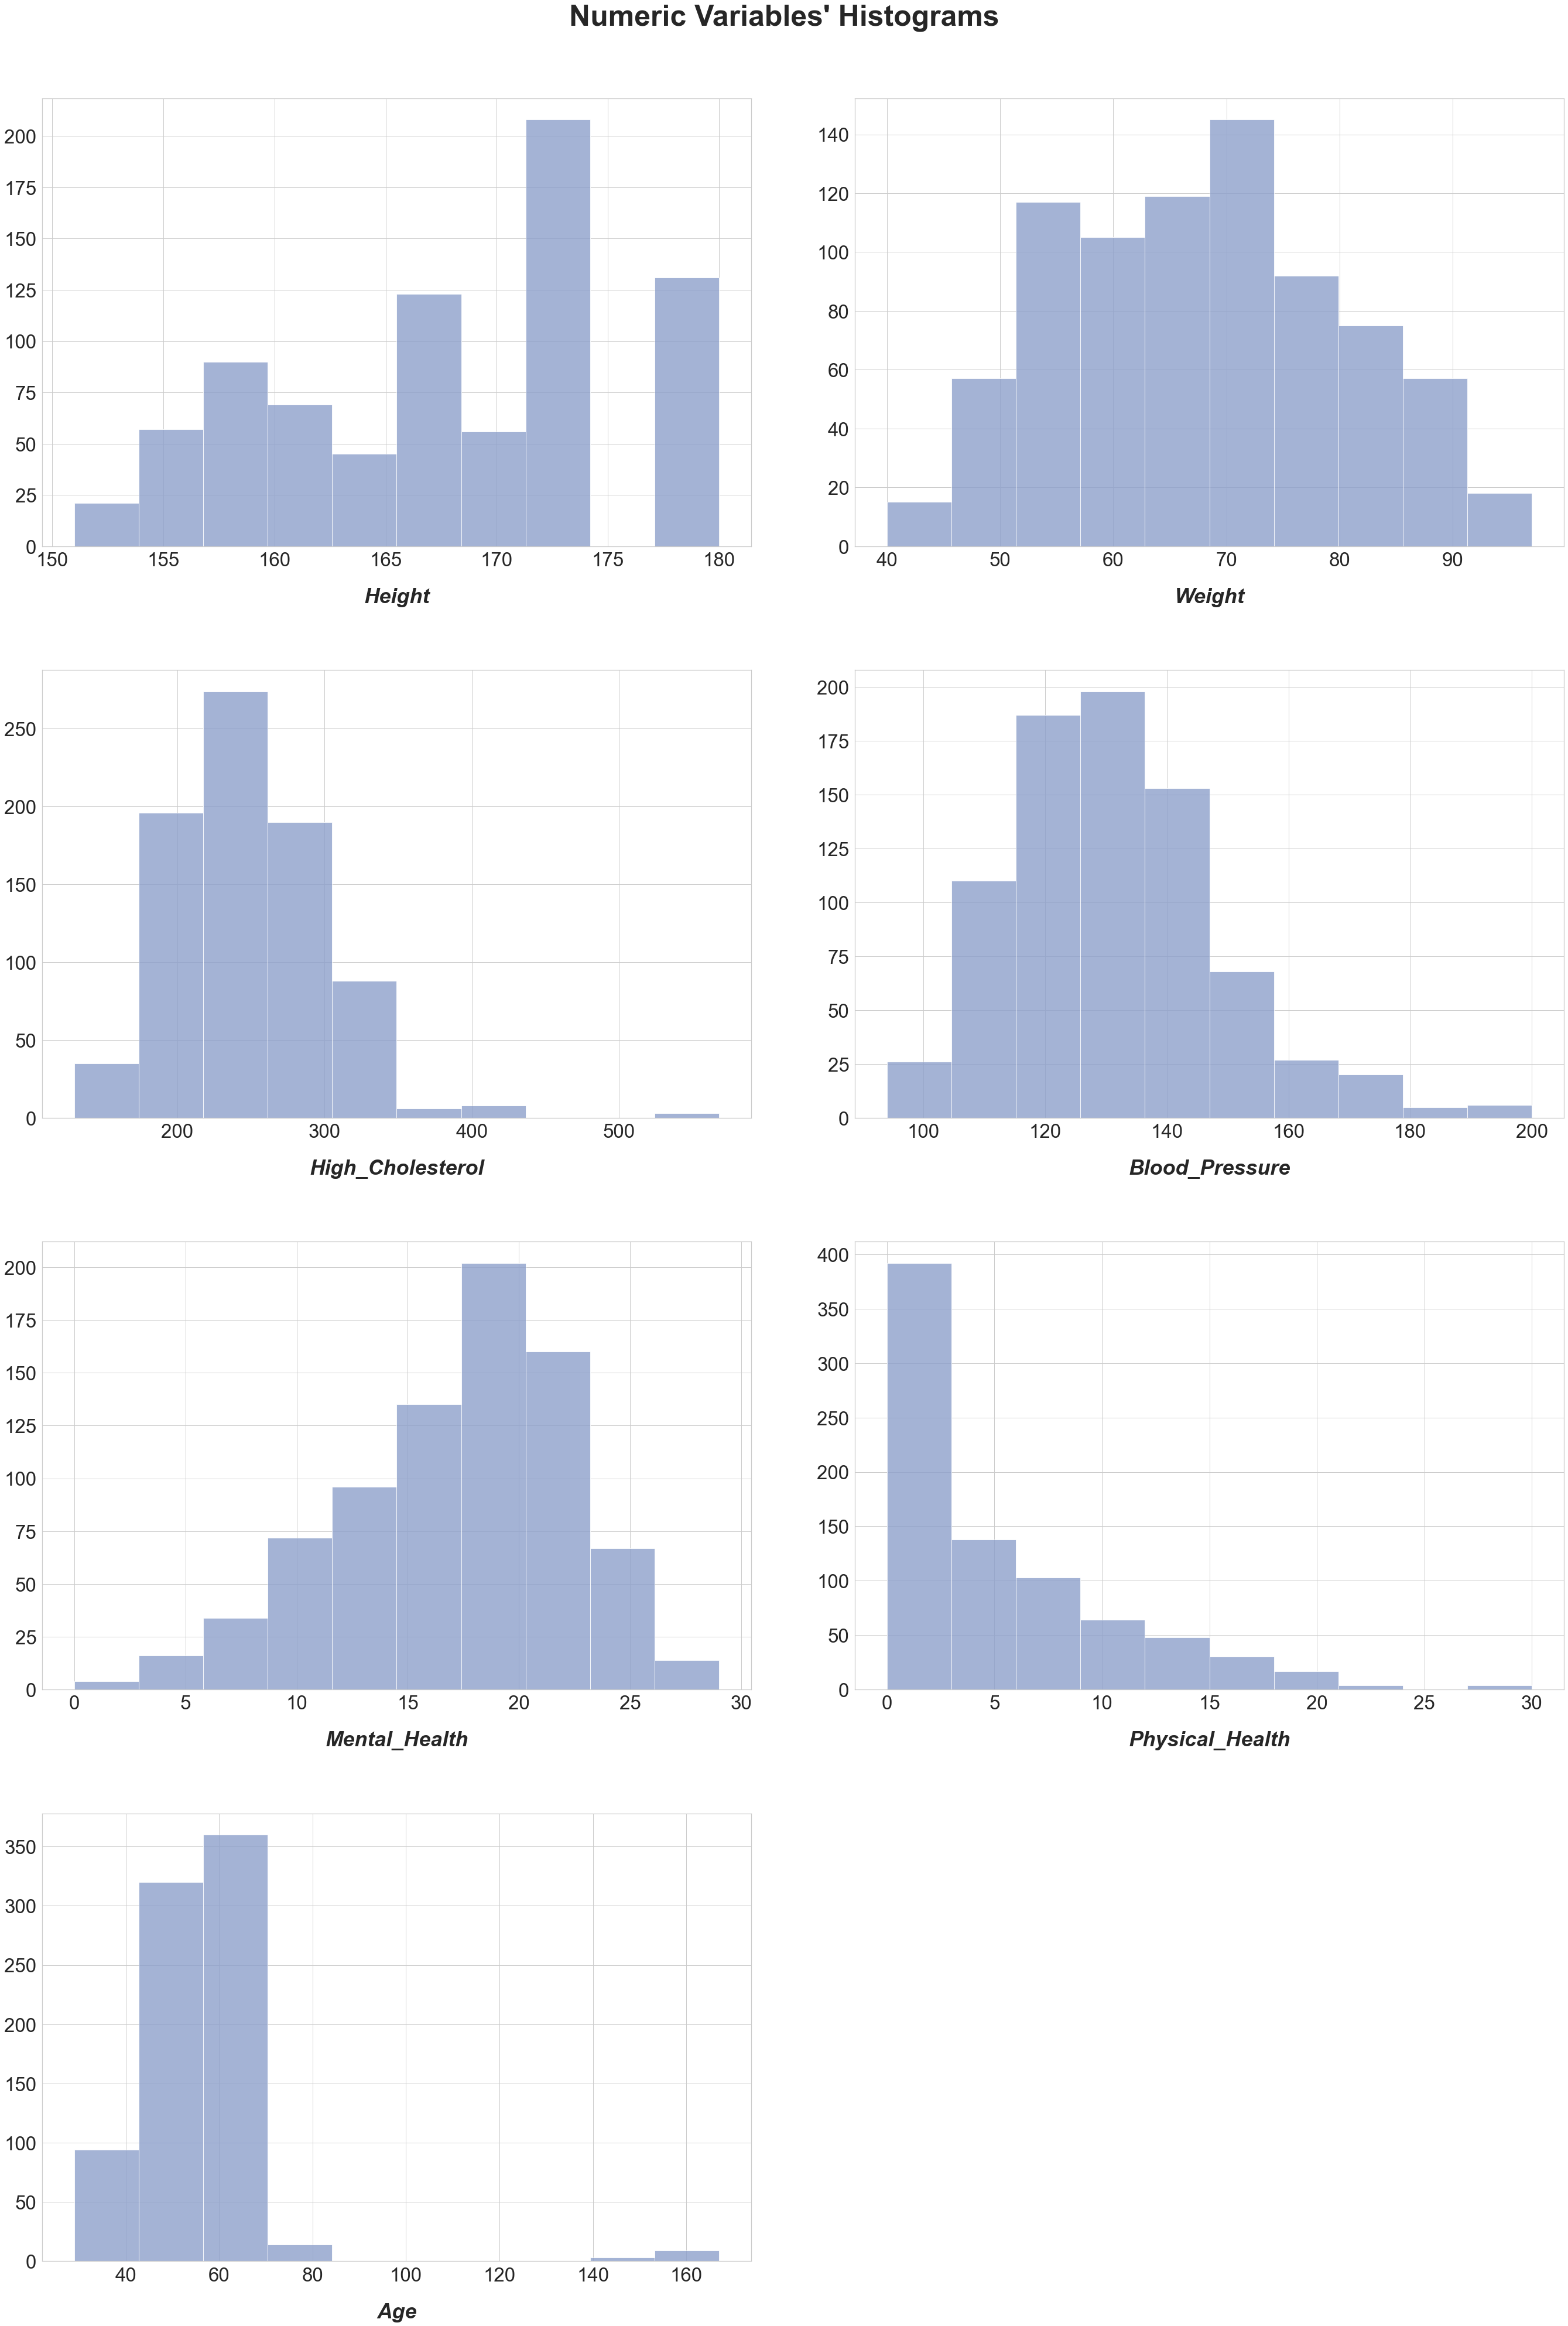

In [52]:
sns.set(font_scale=3)
sns.set_style("whitegrid")

# Get array of features
data = train_patient_num.columns.values[1:]

a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(40, 70))

# Building the Histograms
for i in data:
    plt.subplot(a, b, c)
    plt.xlabel(i, fontweight="bold", fontstyle="italic", labelpad=30)
    plt.hist(train_patient[i], color=sns.color_palette("Set2")[2], alpha=0.8)
    c = c + 1

# Layout
title = "Numeric Variables' Histograms"
plt.suptitle(title, fontsize=50, fontweight="bold")
plt.tight_layout(pad=3)

plt.savefig('Figures/Num_Variables_Histograms.png', dpi=300, bbox_inches='tight')
plt.show()

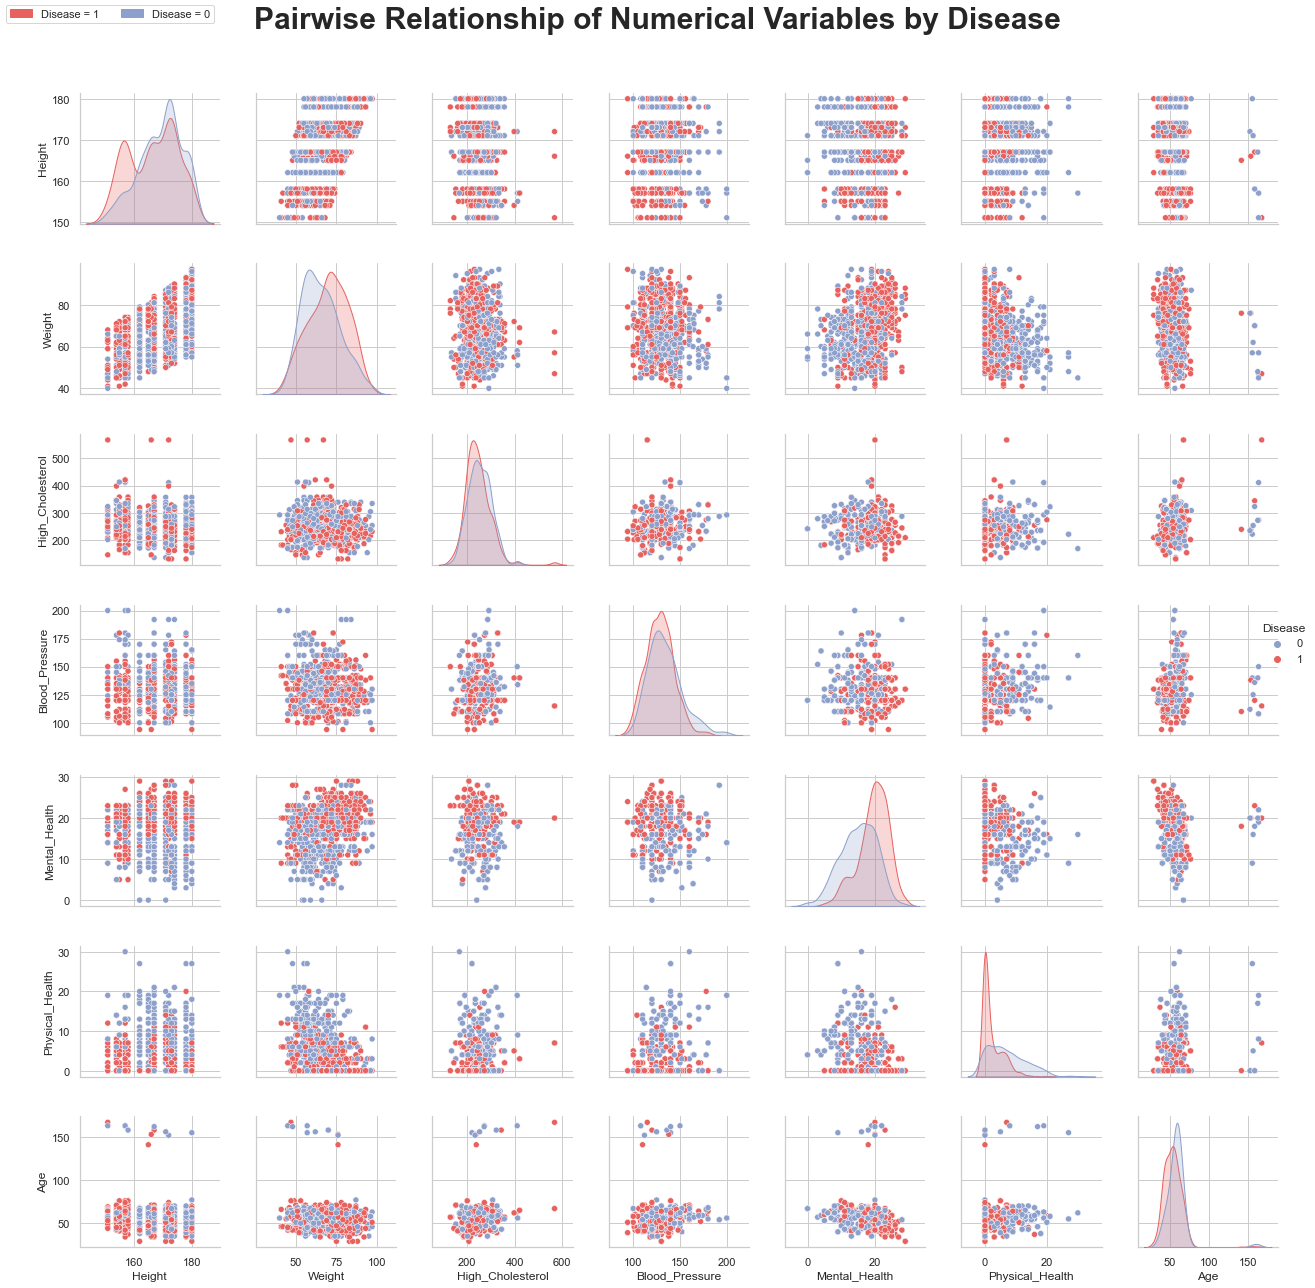

In [53]:
sns.set(font_scale=1)
sns.set_style("whitegrid")

p = sns.pairplot(train_patient_num, hue="Disease", palette=[sns.color_palette("Set2")[2], '#E7625F'])

top_bar = mpatches.Patch(color='#E7625F', label='Disease = 1')
bottom_bar = mpatches.Patch(color=sns.color_palette("Set2")[2], label='Disease = 0')
p.fig.legend(handles=[top_bar, bottom_bar], loc='upper left', ncol=2)

plt.tight_layout(pad=3)
title = "Pairwise Relationship of Numerical Variables by Disease"
plt.suptitle(title, fontsize=30, fontweight="bold", y=1.04)
plt.savefig('Figures/Pairwise Relationship of Numerical Variables by Disease.png', dpi=600, bbox_inches='tight')
plt.show()

With the help of the box plots and the histograms we were able to find outliers in:
	
* High_Cholestrol
* Age

We will now test several methods to deal with these outliers and then apply the one we find the most suiting. But first, let's drop the variable Disease from the numerical variables list (we needed it for this last plot, but now it won't be necessary).

In [54]:
train_patient_num.drop(["Disease"],axis = 1, inplace=True)

### 2.4.1 Inter Quartile Range <a class="anchor" id="iqr"></a>

In [55]:
iq = train_patient_num.copy()
Q1 = iq.quantile(0.25)  
Q3 = iq.quantile(0.75)
IQR = Q3 - Q1
IQR

Height              11.00
Weight              19.00
High_Cholesterol    66.25
Blood_Pressure      20.00
Mental_Health        8.00
Physical_Health      7.00
Age                 13.00
dtype: float64

In [56]:
iq = iq[~((iq < (Q1 - 1.5 * IQR)) |(iq > (Q3 + 1.5 * IQR))).any(axis=1)]

In [57]:
iq

Height  Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
PatientID                                                                    
1167          155      67               358             120             21   
1805          173      88               230             142              9   
1557          162      68               226             122             26   
1658          180      66               313             125             13   
1544          180      58               277             125             18   
...           ...     ...               ...             ...            ...   
1912          173      74               202             120             13   
1909          178      61               204             144             12   
1386          157      61               213             120             23   
1662          165      75               208             112             16   
1117          173      70               181             120             11   

           Physical_Health  Age  
PatientID                        
1167                     2   57  
1805                     0   53  
1557                     0   48  
1658                     8   64  
1544                     2   54  
...                    ...  ...  
1912                     7   35  
1909                     4   50  
1386                     0   42  
1662                     0   47  
1117                    12   43  

[738 rows x 7 columns]

In [58]:
print("The percentage of data removed with this method is ", (1-(iq.shape[0] / train_patient_num.shape[0]))*100)

The percentage of data removed with this method is  7.750000000000002


### 2.4.2 Local Outlier Factor <a class="anchor" id="lof"></a>

In [59]:
lof_df = train_patient_num.copy()

In [60]:
# Consider 5 neighbors 
lof = LocalOutlierFactor(n_neighbors=3)

In [61]:
lof_pred=lof.fit_predict(lof_df[train_patient_num.columns])

In [62]:
outlier_index = lof_df[lof_pred == -1] # negative values are outliers
outlier_index

Height  Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
PatientID                                                                    
1370          154      51               345             132             14   
1464          166      57               568             115             20   
1481          157      57               411             150             19   
1115          151      49               311             145             17   
1619          178      93               252             110             19   
1851          178      57               254             130             26   
1933          180      79               235             120             25   
1776          154      46               311             145             17   
1699          180      95               286             126             19   
1536          172      64               223             120             19   
1826          173      81               184             130             18   
1354          178      92               265             124             16   
1853          165      54               233             120             13   
1948          174      55               178             145             12   
1702          167      80               306             160             20   
1163          178      71               278             124             21   
1069          157      45               168             160             16   
1301          180      97               231              94             19   
1011          154      57               345             132             14   
1390          158      70               323             136             18   
1192          172      67               568             115             20   

           Physical_Health  Age  
PatientID                        
1370                    14   43  
1464                     7   67  
1481                    19  163  
1115                     4   61  
1619                     2   65  
1851                    16   37  
1933                    18   38  
1776                     4   61  
1699                     0   35  
1536                     7   50  
1826                     0   42  
1354                     1   57  
1853                    12   67  
1948                    12   70  
1702                     1   71  
1163                     2   48  
1069                    30   62  
1301                     0   51  
1011                    14   43  
1390                     0  158  
1192                     7   67

In [63]:
print("The percentage of data removed with this method is ", round((outlier_index.shape[0] / train_patient_num.shape[0])*100,2))

The percentage of data removed with this method is  2.62


In [64]:
outlier_index.describe()

Height     Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
count   21.000000  21.000000         21.000000       21.000000      21.000000   
mean   167.904762  67.476190        298.809524      130.142857      18.190476   
std     10.387034  16.942901        107.770413       16.511468       3.473025   
min    151.000000  45.000000        168.000000       94.000000      12.000000   
25%    157.000000  55.000000        233.000000      120.000000      16.000000   
50%    172.000000  64.000000        278.000000      130.000000      19.000000   
75%    178.000000  80.000000        323.000000      145.000000      20.000000   
max    180.000000  97.000000        568.000000      160.000000      26.000000   

       Physical_Health         Age  
count        21.000000   21.000000  
mean          8.095238   64.571429  
std           8.166424   33.946386  
min           0.000000   35.000000  
25%           1.000000   43.000000  
50%           7.000000   61.000000  
75%          14.000000   67.000000  
max          30.000000  163.000000

### 2.4.3 Z-Score <a class="anchor" id="z-score"></a>

In [65]:
z_score = train_patient.copy()

In [66]:
z = np.abs(stats.zscore(z_score[train_patient_num.columns]))

In [67]:
z

Height    Weight  High_Cholesterol  Blood_Pressure  \
PatientID                                                         
1167       1.606424  0.068355          2.108834        0.648617   
1805       0.651507  1.666337          0.374944        0.642309   
1557       0.728339  0.014249          0.452562        0.531260   
1658       1.529591  0.150959          1.235631        0.355225   
1544       1.529591  0.811794          0.537069        0.355225   
...             ...       ...               ...             ...   
1909       1.278710  0.563981          0.879461        0.759666   
1386       1.355542  0.563981          0.704821        0.648617   
1088       0.101136  1.637838          0.440046        0.524952   
1662       0.352018  0.592480          0.801843        1.118044   
1117       0.651507  0.179458          1.325765        0.648617   

           Mental_Health  Physical_Health       Age  
PatientID                                            
1167            0.679144         0.469859  0.067722  
1805            1.550604         0.837116  0.191812  
1557            1.608206         0.837116  0.516230  
1658            0.807355         0.631911  0.521907  
1544            0.121707         0.469859  0.126928  
...                  ...              ...       ...  
1909            0.993167         0.102602  0.386463  
1386            1.050769         0.837116  0.905531  
1088            0.493332         2.284566  6.880494  
1662            0.249918         0.837116  0.581113  
1117            1.178980         1.366424  0.840647  

[800 rows x 7 columns]

In [68]:
np.where(z > 3)

(array([ 18,  22,  35,  61,  61,  89,  93, 103, 177, 194, 198, 312, 312,
        341, 460, 473, 481, 493, 503, 511, 542, 566, 566, 585, 586, 588,
        593, 617, 640, 648, 695, 705, 710, 720, 729, 754, 757, 761, 797],
       dtype=int64),
 array([6, 2, 3, 2, 6, 5, 6, 2, 4, 4, 6, 2, 6, 4, 5, 2, 4, 6, 3, 5, 5, 5,
        6, 3, 2, 5, 6, 3, 6, 6, 5, 6, 3, 2, 2, 5, 2, 3, 6], dtype=int64))

In [69]:
# Remove the observations 3 standard deviations above the mean
z_score = z_score[(z < 3).all(axis=1)]

In [70]:
print("The percentage of data removed with this method is ",(1 - (z_score.shape[0] / train_patient.shape[0]))*100)

The percentage of data removed with this method is  4.5000000000000036


In [71]:
z_score.describe()

Birth_Year     Disease      Height      Weight  High_Cholesterol  \
count   764.000000  764.000000  764.000000  764.000000        764.000000   
mean   1967.768325    0.527487  167.969895   68.260471        246.066754   
std       9.034374    0.499571    7.949242   11.961667         45.655350   
min    1945.000000    0.000000  151.000000   41.000000        130.000000   
25%    1961.000000    0.000000  162.000000   59.000000        212.000000   
50%    1966.000000    1.000000  171.000000   68.000000        243.000000   
75%    1975.000000    1.000000  174.000000   77.000000        278.000000   
max    1993.000000    1.000000  180.000000   97.000000        398.000000   

       Blood_Pressure  Mental_Health  Physical_Health         Age         BMI  
count      764.000000     764.000000       764.000000  764.000000  764.000000  
mean       130.708115      17.403141         4.264398   54.231675   24.151152  
std         16.201140       5.274364         4.986034    9.034374    3.613581  
min         94.000000       3.000000         0.000000   29.000000   16.980000  
25%        120.000000      13.000000         0.000000   47.000000   21.080000  
50%        130.000000      18.000000         2.000000   56.000000   24.560000  
75%        140.000000      21.000000         7.000000   61.000000   27.182500  
max        180.000000      29.000000        20.000000   77.000000   30.120000

In [72]:
train_patient = z_score.copy()

### 2.5 Encoding and Split <a class="anchor" id="encodingandsplit"></a>

Let's now look at our dataframe's columns at this point and see which ones are no longer necessary.

In [73]:
train_patient.columns

Index(['Name', 'Birth_Year', 'Region', 'Education', 'Disease', 'Height',
       'Weight', 'High_Cholesterol', 'Blood_Pressure', 'Mental_Health',
       'Physical_Health', 'Checkup', 'Diabetes', 'Smoking_Habit',
       'Drinking_Habit', 'Exercise', 'Fruit_Habit', 'Water_Habit', 'Gender',
       'Age', 'BMI'],
      dtype='object')

In [74]:
train_patient.drop(["Birth_Year","Name"],axis = 1, inplace=True)

In [75]:
X = train_patient.drop('Disease', axis = 1)
y = train_patient['Disease']

In [76]:
train_patient = pd.get_dummies(X, drop_first=True)

In [77]:
train_patient

Height  Weight  High_Cholesterol  Blood_Pressure  Mental_Health  \
PatientID                                                                    
1167          155      67               358             120             21   
1805          173      88               230             142              9   
1557          162      68               226             122             26   
1658          180      66               313             125             13   
1544          180      58               277             125             18   
...           ...     ...               ...             ...            ...   
1912          173      74               202             120             13   
1909          178      61               204             144             12   
1386          157      61               213             120             23   
1662          165      75               208             112             16   
1117          173      70               181             120             11   

           Physical_Health  Age    BMI  Region_East of England  Region_London  \
PatientID                                                                       
1167                     2   57  27.89                       0              1   
1805                     0   53  29.40                       0              0   
1557                     0   48  25.91                       0              0   
1658                     8   64  20.37                       0              1   
1544                     2   54  17.90                       0              0   
...                    ...  ...    ...                     ...            ...   
1912                     7   35  24.73                       0              0   
1909                     4   50  19.25                       0              0   
1386                     0   42  24.75                       0              0   
1662                     0   47  27.55                       1              0   
1117                    12   43  23.39                       0              1   

           ...  Drinking_Habit_I do not consume any type of alcohol  \
PatientID  ...                                                        
1167       ...                                                  0     
1805       ...                                                  0     
1557       ...                                                  0     
1658       ...                                                  0     
1544       ...                                                  0     
...        ...                                                ...     
1912       ...                                                  0     
1909       ...                                                  0     
1386       ...                                                  0     
1662       ...                                                  0     
1117       ...                                                  0     

           Drinking_Habit_I usually consume alcohol every day  Exercise_Yes  \
PatientID                                                                     
1167                                                       1              1   
1805                                                       0              1   
1557                                                       0              0   
1658                                                       1              1   
1544                                                       0              0   
...                                                      ...            ...   
1912                                                       1              1   
1909                                                       0              1   
1386                                                       1              0   
1662                                                       1              0   
1117                                                       0          

In [78]:
train_patient.columns

Index(['Height', 'Weight', 'High_Cholesterol', 'Blood_Pressure',
       'Mental_Health', 'Physical_Health', 'Age', 'BMI',
       'Region_East of England', 'Region_London', 'Region_North East',
       'Region_North West', 'Region_South East', 'Region_South West',
       'Region_West Midlands', 'Region_Yorkshire and the Humber',
       'Education_High School Graduate',
       'Education_High School Incomplete (10th to 11th grade)',
       'Education_I never attended school / Other',
       'Education_University Complete (3 or more years)',
       'Education_University Incomplete (1 to 2 years)',
       'Checkup_Less than three months', 'Checkup_More than 3 years',
       'Checkup_Not sure',
       'Diabetes_I don't have diabetes, but I have direct family members who have diabetes.',
       'Diabetes_I have/had pregnancy diabetes or borderline diabetes',
       'Diabetes_Neither I nor my immediate family have diabetes.',
       'Smoking_Habit_Yes',
       'Drinking_Habit_I do not consume 

In [79]:
X_train, X_val, y_train, y_val = train_test_split(train_patient, y,
                                                 test_size = 0.2,
                                                 shuffle = True,
                                                 random_state = 15,
                                                 stratify = y)

In [80]:
print('Training Data')
print(y_train.value_counts()/len(y_train))
print('Validation Data')
print(y_val.value_counts()/len(y_val))

Training Data
1    0.527005
0    0.472995
Name: Disease, dtype: float64
Validation Data
1    0.529412
0    0.470588
Name: Disease, dtype: float64


### 2.6 Scaling <a class="anchor" id="scaling"></a>

Since variables that are measured at different scales do not contribute equally to the model fitting and model learned function and might end up creating a bias, we will deal with this potential problem by applying a Robust Scaler.

In [81]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

In [82]:
scaler = MinMaxScaler().fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array
# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled.head(3)

Height    Weight  High_Cholesterol  Blood_Pressure  \
PatientID                                                         
1046       1.000000  0.357143          0.287313        0.476744   
1140       0.793103  0.446429          0.552239        0.674419   
1859       0.551724  0.517857          0.645522        0.534884   

           Mental_Health  Physical_Health       Age       BMI  \
PatientID                                                       
1046            0.384615             0.00  0.250000  0.141006   
1140            0.000000             0.25  0.583333  0.367378   
1859            0.769231             0.35  0.458333  0.618902   

           Region_East of England  Region_London  ...  \
PatientID                                         ...   
1046                          0.0            0.0  ...   
1140                          0.0            0.0  ...   
1859                          0.0            1.0  ...   

           Drinking_Habit_I do not consume any type of alcohol  \
PatientID                                                        
1046                                                     0.0     
1140                                                     0.0     
1859                                                     0.0     

           Drinking_Habit_I usually consume alcohol every day  Exercise_Yes  \
PatientID                                                                     
1046                                                     1.0            0.0   
1140                                                     1.0            1.0   
1859                                                     1.0            1.0   

           Fruit_Habit_3 to 4 pieces of fruit in average  \
PatientID                                                  
1046                                                 0.0   
1140                                                 0.0   
1859                                                 0.0   

           Fruit_Habit_5 to 6 pieces of fruit in average  \
PatientID                                                  
1046                                                 0.0   
1140                                                 0.0   
1859                                                 0.0   

           Fruit_Habit_Less than 1. I do not consume fruits every day.  \
PatientID                                                                
1046                                                     1.0             
1140                                                     0.0             
1859                                                     1.0             

           Fruit_Habit_More than six pieces of fruit  \
PatientID                                              
1046                                             0.0   
1140                                             0.0   
1859                                             0.0   

           Water_Habit_Less than half a liter  \
PatientID                                       
1046                                      0.0   
1140                                      1.0   
1859                                      0.0   

           Water_Habit_More than half a liter but less than one liter  \
PatientID                                                               
1046                                                     1.0            
1140                                                     0.0            
1859                                                     1.0            

           Gender_M  
PatientID            
1046            1.0  
1140            1.0  
1859            1.0  

[3 rows x 38 columns]

In [83]:
X_val_num_scaled = scaler.transform(X_val_num) # this will return an array
# Convert the array to a pandas dataframe
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)
X_val_num_scaled.head(3)

Height    Weight  High_Cholesterol  Blood_Pressure  \
PatientID                                                         
1401       0.241379  0.160714          0.085821        0.209302   
1789       0.689655  0.535714          0.578358        0.302326   
1576       1.000000  0.696429          0.641791        0.674419   

           Mental_Health  Physical_Health       Age       BMI  \
PatientID                                                       
1401            0.346154             0.35  0.875000  0.232470   
1789            0.153846             0.30  0.687500  0.556402   
1576            0.807692             0.25  0.479167  0.587652   

           Region_East of England  Region_London  ...  \
PatientID                                         ...   
1401                          0.0            1.0  ...   
1789                          0.0            0.0  ...   
1576                          0.0            1.0  ...   

           Drinking_Habit_I do not consume any type of alcohol  \
PatientID                                                        
1401                                                     0.0     
1789                                                     0.0     
1576                                                     0.0     

           Drinking_Habit_I usually consume alcohol every day  Exercise_Yes  \
PatientID                                                                     
1401                                                     1.0            0.0   
1789                                                     0.0            0.0   
1576                                                     1.0            0.0   

           Fruit_Habit_3 to 4 pieces of fruit in average  \
PatientID                                                  
1401                                                 0.0   
1789                                                 0.0   
1576                                                 0.0   

           Fruit_Habit_5 to 6 pieces of fruit in average  \
PatientID                                                  
1401                                                 0.0   
1789                                                 0.0   
1576                                                 0.0   

           Fruit_Habit_Less than 1. I do not consume fruits every day.  \
PatientID                                                                
1401                                                     1.0             
1789                                                     0.0             
1576                                                     1.0             

           Fruit_Habit_More than six pieces of fruit  \
PatientID                                              
1401                                             0.0   
1789                                             0.0   
1576                                             0.0   

           Water_Habit_Less than half a liter  \
PatientID                                       
1401                                      0.0   
1789                                      0.0   
1576                                      0.0   

           Water_Habit_More than half a liter but less than one liter  \
PatientID                                                               
1401                                                     1.0            
1789                                                     1.0            
1576                                                     0.0            

           Gender_M  
PatientID            
1401            0.0  
1789            1.0  
1576            1.0  

[3 rows x 38 columns]

### 2.7 Feature Selection <a class="anchor" id="featureselection"></a>

### 2.7.1 Spearman Correlation <a class="anchor" id="spearman"></a>

In [84]:
all_train_num = X_train_num_scaled.join(y_train)
all_train_num.head()

Height    Weight  High_Cholesterol  Blood_Pressure  \
PatientID                                                         
1046       1.000000  0.357143          0.287313        0.476744   
1140       0.793103  0.446429          0.552239        0.674419   
1859       0.551724  0.517857          0.645522        0.534884   
1297       1.000000  0.857143          0.537313        0.651163   
1027       0.000000  0.446429          0.720149        0.488372   

           Mental_Health  Physical_Health       Age       BMI  \
PatientID                                                       
1046            0.384615             0.00  0.250000  0.141006   
1140            0.000000             0.25  0.583333  0.367378   
1859            0.769231             0.35  0.458333  0.618902   
1297            0.230769             0.15  0.604167  0.799543   
1027            0.576923             0.00  0.604167  0.912348   

           Region_East of England  Region_London  ...  \
PatientID                                         ...   
1046                          0.0            0.0  ...   
1140                          0.0            0.0  ...   
1859                          0.0            1.0  ...   
1297                          1.0            0.0  ...   
1027                          0.0            1.0  ...   

           Drinking_Habit_I usually consume alcohol every day  Exercise_Yes  \
PatientID                                                                     
1046                                                     1.0            0.0   
1140                                                     1.0            1.0   
1859                                                     1.0            1.0   
1297                                                     0.0            1.0   
1027                                                     0.0            0.0   

           Fruit_Habit_3 to 4 pieces of fruit in average  \
PatientID                                                  
1046                                                 0.0   
1140                                                 0.0   
1859                                                 0.0   
1297                                                 0.0   
1027                                                 1.0   

           Fruit_Habit_5 to 6 pieces of fruit in average  \
PatientID                                                  
1046                                                 0.0   
1140                                                 0.0   
1859                                                 0.0   
1297                                                 0.0   
1027                                                 0.0   

           Fruit_Habit_Less than 1. I do not consume fruits every day.  \
PatientID                                                                
1046                                                     1.0             
1140                                                     0.0             
1859                                                     1.0             
1297                                                     1.0             
1027                                                     0.0             

           Fruit_Habit_More than six pieces of fruit  \
PatientID                                              
1046                                             0.0   
1140                                             0.0   
1859                                             0.0   
1297                                             0.0   
1027                                             0.0   

           Water_Habit_Less than half a liter  \
PatientID                                       
1046                                      0.0   
1140                                      1.0   
1859                                      0.0   
1297                                      0.0   
1027                                      0.0   

           Water_Habit_More than ha

In [85]:
def cor_heatmap(cor, scale):
    sns.set(font_scale=scale)
    fig = plt.figure(figsize=(15,10))
    
    #Formatting the labels
    labels = [];
    for label in cor.columns:
        labels.append(textwrap.fill(label, width=60,
                      break_long_words=False))
        
    # Build annotation matrix (values above |0.5| will appear annotated in the plot)
    mask_annot = np.absolute(cor.values) >= 0.5
    annot = np.where(mask_annot, cor.values, np.full(cor.shape,""))
    
    # Getting the Upper Triangle of the correlation matrix
    mask = np.triu(np.ones_like(cor, dtype=bool))
    
    # Plot heatmap of the correlation matrix
    sns.heatmap(data = cor, mask = mask, annot = annot, annot_kws={"style": "italic", "weight": "bold"}, cmap = "coolwarm", yticklabels=labels,
                fmt='s', vmin=-1, vmax=1, center=0, 
                square=True, linewidths=.5)
    
    # Layout
    fig.subplots_adjust(top=0.93)
    fig.suptitle("Spearman Correlation Matrix", fontsize=20, fontweight="bold")

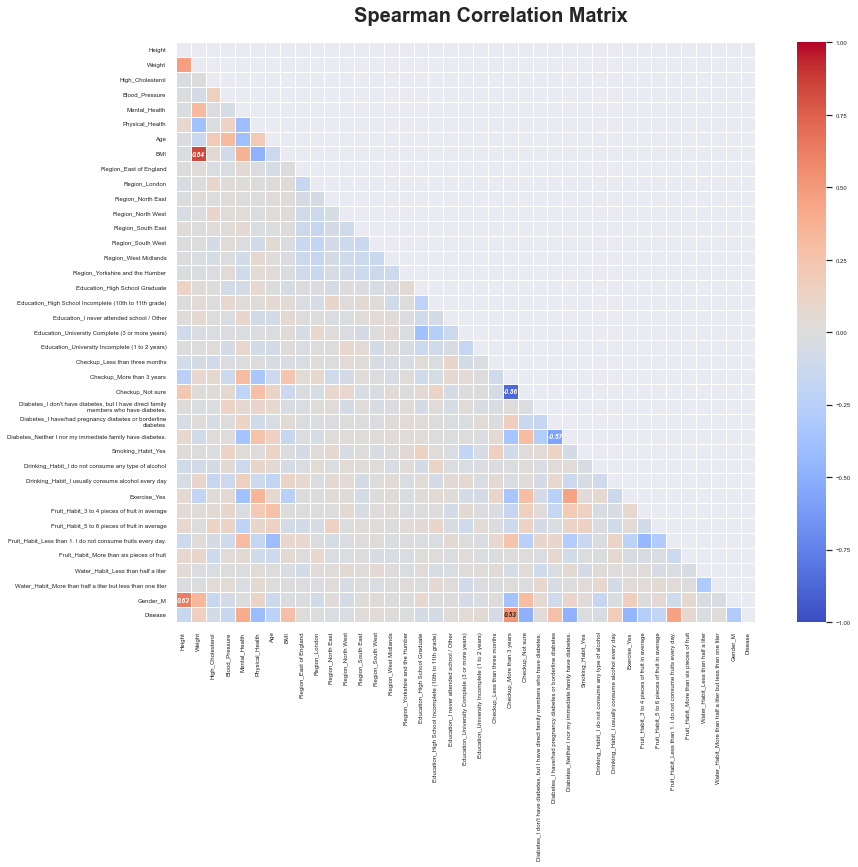

In [86]:
cor_spearman = np.round(all_train_num.corr(method ='spearman'), decimals=2)
cor_spearman

cor_heatmap(cor_spearman, 0.55)
plt.savefig('Figures/Spearman Correlation.png', dpi=600, bbox_inches='tight')
plt.show()

### 2.7.2 Univariate Variables <a class="anchor" id="univariate"></a>

Checking if any of the numerical variables is univariate (variance is equal to 0).

In [87]:
X_train_num_scaled.var()

Height                                                                                 0.074201
Weight                                                                                 0.046388
High_Cholesterol                                                                       0.028402
Blood_Pressure                                                                         0.036234
Mental_Health                                                                          0.041232
Physical_Health                                                                        0.063371
Age                                                                                    0.036006
BMI                                                                                    0.077722
Region_East of England                                                                 0.091326
Region_London                                                                          0.139299
Region_North East                       

There are no univariate variables.

### 2.7.3 Logistic Regression <a class="anchor" id="logisticregressionfeature"></a>

In [88]:
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=38)
embeded_lr_selector.fit(train_patient, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = train_patient.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')
print(embeded_lr_feature)

9 selected features
['Checkup_More than 3 years', 'Checkup_Not sure', 'Diabetes_I have/had pregnancy diabetes or borderline diabetes', 'Diabetes_Neither I nor my immediate family have diabetes.', 'Drinking_Habit_I usually consume alcohol every day', 'Exercise_Yes', 'Fruit_Habit_3 to 4 pieces of fruit in average', 'Fruit_Habit_Less than 1. I do not consume fruits every day.', 'Gender_M']


### 2.7.4 Random Forest <a class="anchor" id="randomforest"></a>

In [89]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=38)
embeded_rf_selector.fit(train_patient,y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = train_patient.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

13 selected features
['Height', 'Weight', 'High_Cholesterol', 'Blood_Pressure', 'Mental_Health', 'Physical_Health', 'Age', 'BMI', 'Checkup_More than 3 years', 'Checkup_Not sure', 'Diabetes_Neither I nor my immediate family have diabetes.', 'Exercise_Yes', 'Fruit_Habit_Less than 1. I do not consume fruits every day.']


### 2.7.5 Recursive Feature Elimination (RFE) <a class="anchor" id="rfe"></a>

In [90]:
model = RandomForestClassifier()

In [91]:
nof_list=np.arange(1,len(train_patient.axes[1]))    
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    rfe = RFE(model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_val_rfe = rfe.transform(X_val)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 9
Score with 9 features: 0.973856


In [92]:
rfe = RFE(estimator = model)

In [93]:
rfe.fit_transform(X_train, y_train)

array([[180.,  61., 207., ...,   0.,   1.,   1.],
       [174.,  66., 278., ...,   0.,   0.,   1.],
       [167.,  70., 303., ...,   0.,   1.,   1.],
       ...,
       [162.,  72., 281., ...,   0.,   0.,   1.],
       [180.,  66., 313., ...,   0.,   1.,   1.],
       [155.,  52., 238., ...,   0.,   1.,   0.]])

In [94]:
selected_features = pd.Series(rfe.support_, index = train_patient.columns)
selected_features

Height                                                                                  True
Weight                                                                                  True
High_Cholesterol                                                                        True
Blood_Pressure                                                                          True
Mental_Health                                                                           True
Physical_Health                                                                         True
Age                                                                                     True
BMI                                                                                     True
Region_East of England                                                                 False
Region_London                                                                          False
Region_North East                                                     

#### 2.7.5.1 Recursive Feature Elimination with cross-validation <a class="anchor" id="rfecv"></a>

In [95]:
rfecv = RFECV(estimator=model, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 10
Best features : Index(['High_Cholesterol', 'Blood_Pressure', 'Mental_Health',
       'Physical_Health', 'Age', 'BMI', 'Checkup_More than 3 years',
       'Checkup_Not sure',
       'Diabetes_Neither I nor my immediate family have diabetes.',
       'Fruit_Habit_Less than 1. I do not consume fruits every day.'],
      dtype='object')


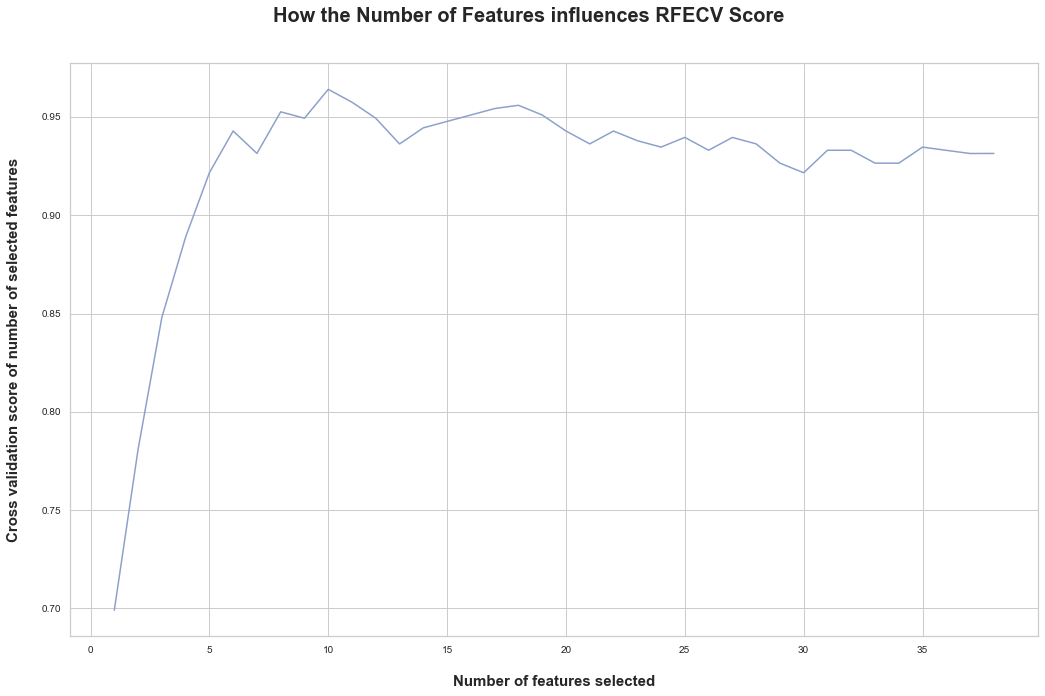

In [96]:
sns.set(font_scale=1)
sns.set_style("whitegrid")

plt.figure(figsize=(15,10))
plt.xlabel("Number of features selected", fontsize=15, fontweight="bold", labelpad=20)
plt.ylabel("Cross validation score of number of selected features", fontsize=15, fontweight="bold", labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)

plt.suptitle("How the Number of Features influences RFECV Score", fontsize=20, fontweight="bold")
plt.tight_layout(pad=2)
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], color=sns.color_palette("Set2")[2])
plt.savefig('Figures/CrossValidationScore.png', dpi=600, bbox_inches='tight')
plt.show()

### 2.7.6 Select K Best <a class="anchor" id="selectkbest"></a>

In [97]:
X_new = SelectKBest(k='all').fit(X_train, y_train)
kbest_features = pd.DataFrame(X_new.scores_, X_new.feature_names_in_).rename(columns={0: "Score"})

In [98]:
kbest_features.sort_values("Score", ascending=False, inplace=True)

In [99]:
kbest_features

Score
Checkup_More than 3 years                           242.030473
Checkup_Not sure                                    183.251135
Diabetes_Neither I nor my immediate family have...  178.620560
Fruit_Habit_Less than 1. I do not consume fruit...  167.552188
Exercise_Yes                                        164.163943
Physical_Health                                     142.495754
Mental_Health                                       117.095158
Gender_M                                             57.684094
BMI                                                  50.027844
Diabetes_I have/had pregnancy diabetes or borde...   46.977261
Fruit_Habit_3 to 4 pieces of fruit in average        44.599108
Age                                                  26.896145
Drinking_Habit_I usually consume alcohol every day   21.249662
Fruit_Habit_5 to 6 pieces of fruit in average        19.366585
Height                                               18.286221
Blood_Pressure                                       17.333378
Weight                                               13.557250
High_Cholesterol                                      3.327229
Fruit_Habit_More than six pieces of fruit             3.101732
Education_High School Graduate                        2.899581
Checkup_Less than three months                        2.163176
Education_High School Incomplete (10th to 11th ...    1.855268
Education_University Incomplete (1 to 2 years)        1.828505
Region_South West                                     1.186248
Education_University Complete (3 or more years)       0.933175
Drinking_Habit_I do not consume any type of alc...    0.910169
Water_Habit_Less than half a liter                    0.730378
Diabetes_I don't have diabetes, but I have dire...    0.715760
Region_North East                                     0.526767
Region_North West                                     0.469273
Education_I never attended school / Other             0.211628
Region_South East                                     0.175041
Water_Habit_More than half a liter but less tha...    0.146397
Smoking_Habit_Yes                                     0.131768
Region_East of England                                0.126171
Region_Yorkshire and the Humber                       0.065839
Region_London                                         0.026790
Region_West Midlands                                  0.026481

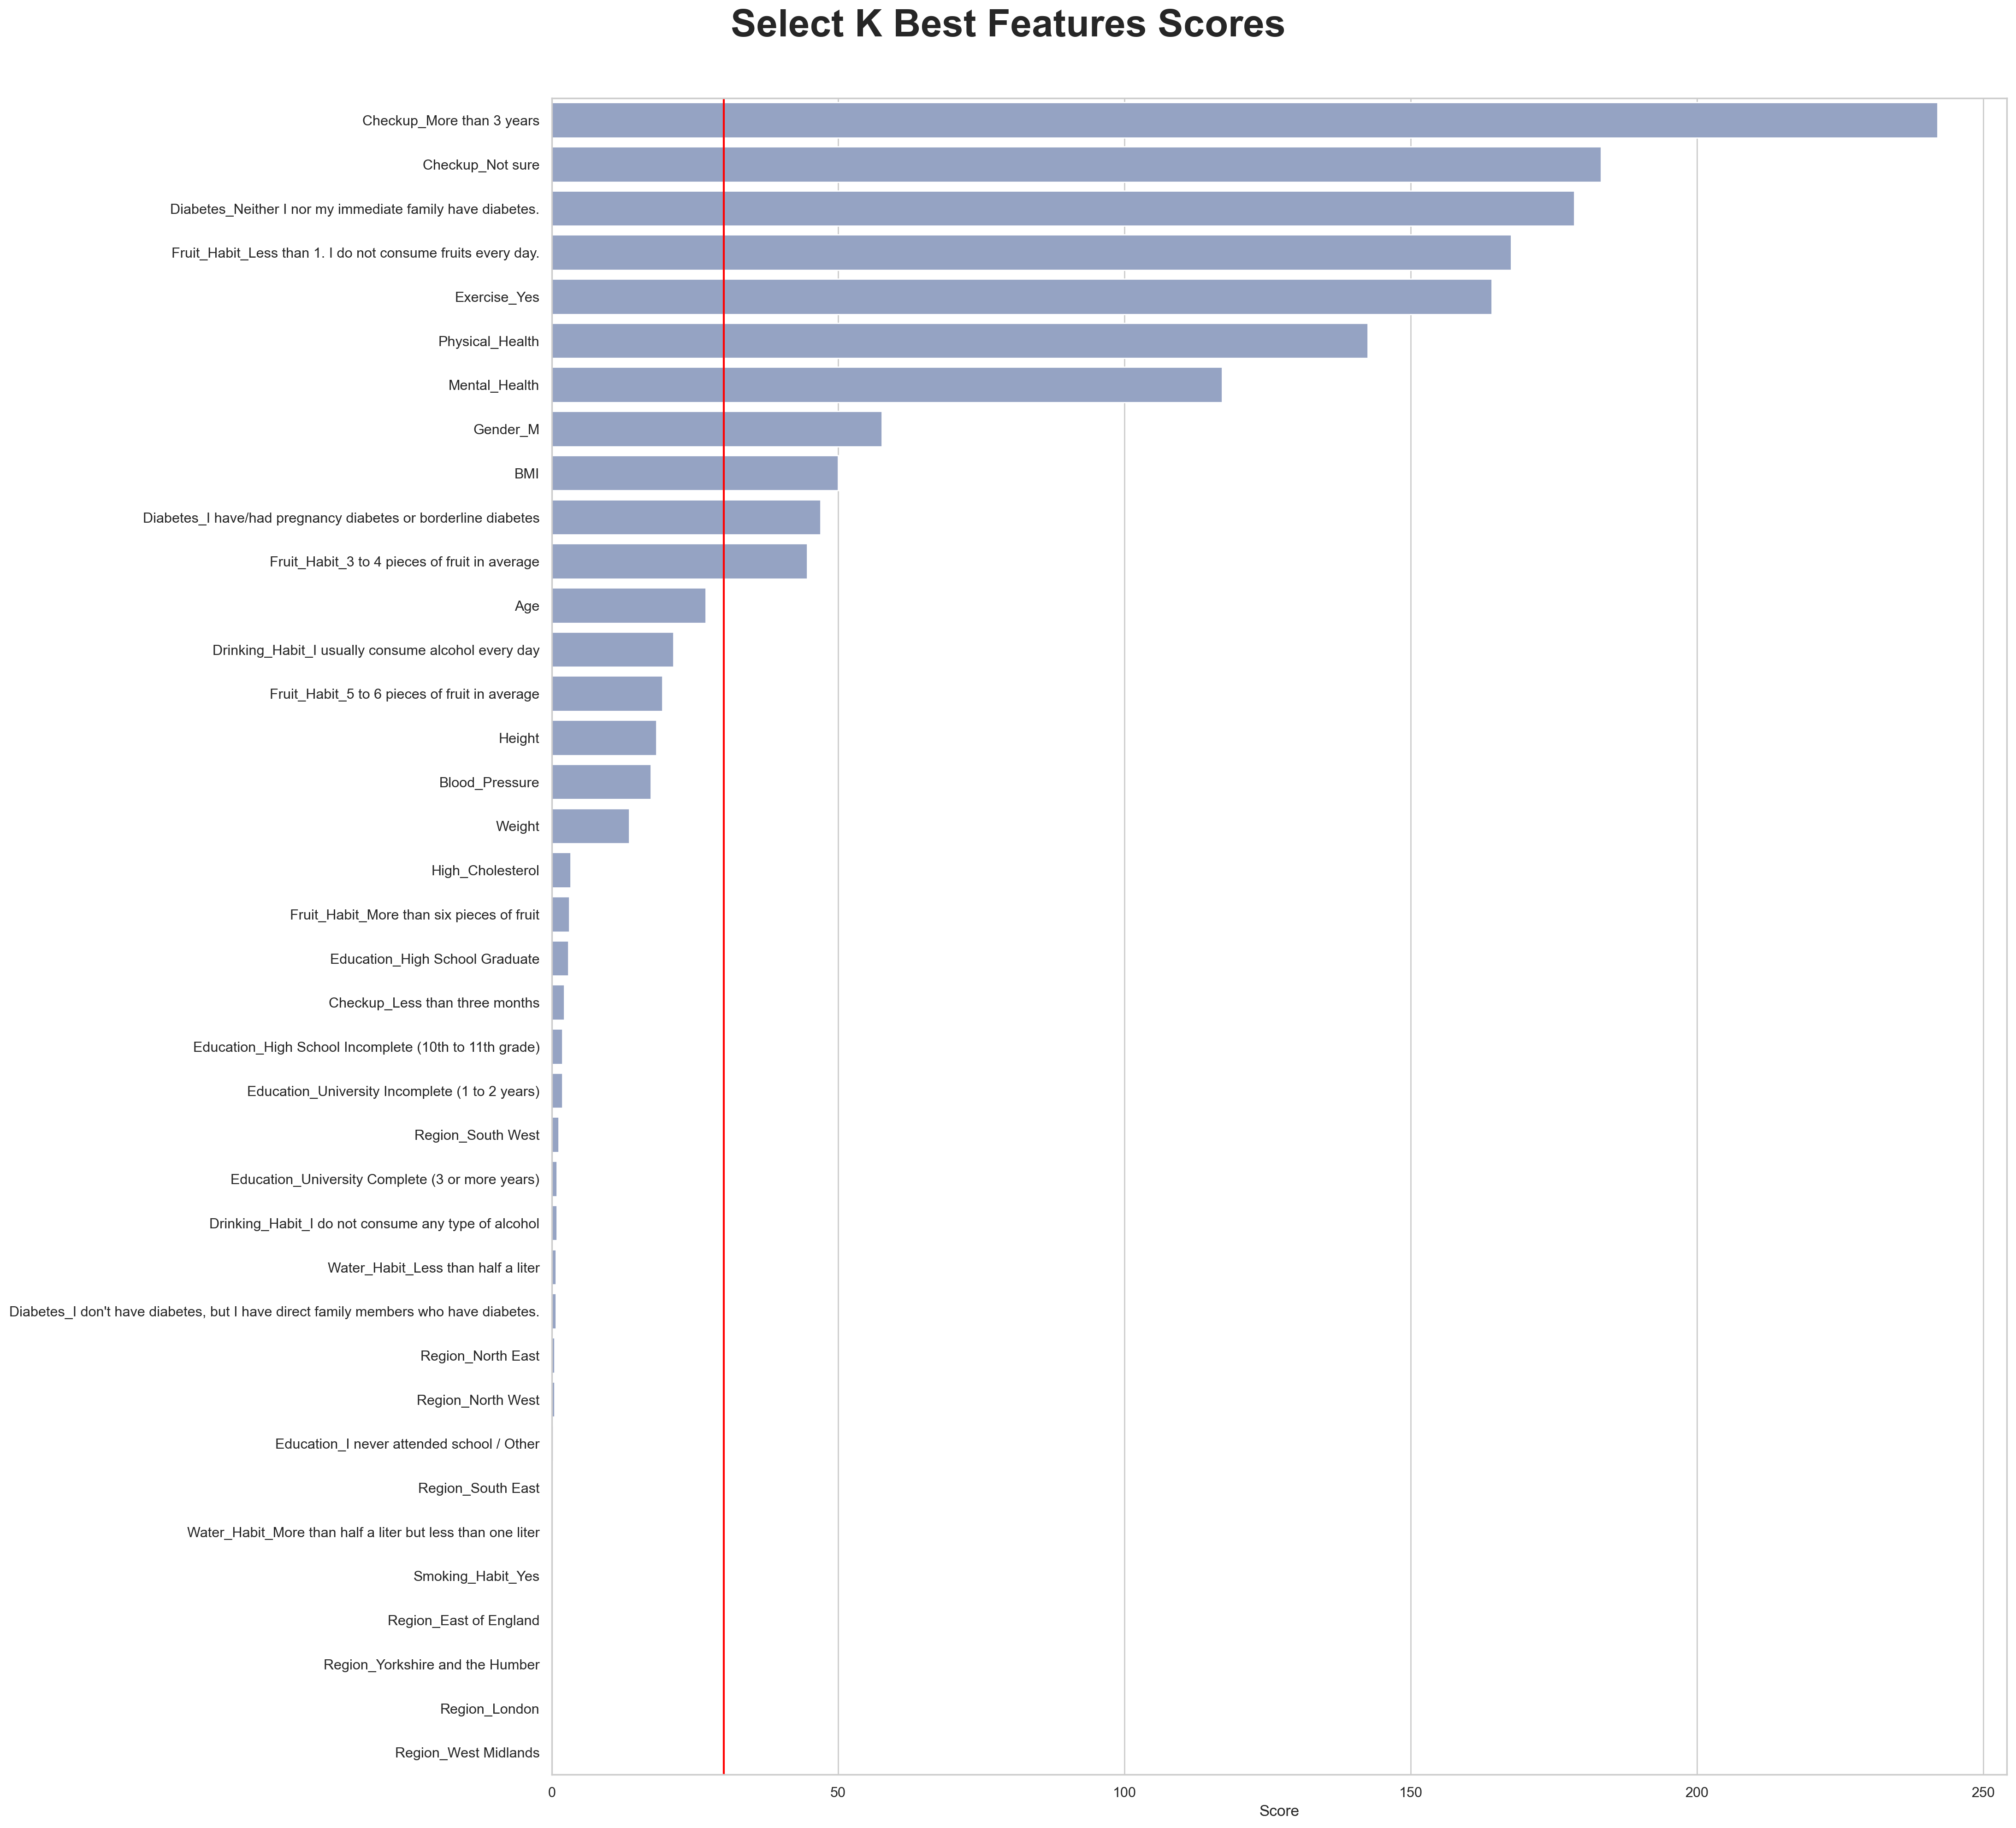

In [100]:
sns.set(font_scale=1)
sns.set_style("whitegrid")
plt.figure(figsize=(23,20), dpi=200)
sns.barplot(data=kbest_features, y=kbest_features.index, x=kbest_features["Score"], color=sns.color_palette("Set2")[2], orient="h")
plt.axvline(x=30, color='red')
plt.tight_layout(pad=4)
plt.suptitle("Select K Best Features Scores", fontweight="bold", fontsize=30, y=1.015)
plt.savefig('Figures/SelectKBest_BarChart.png', dpi=600, bbox_inches='tight')
plt.show()

In [101]:
kbest_features = kbest_features.to_numpy()

In [102]:
kbest_features_bool=[]
for elem in kbest_features:
    if elem > 30:
        kbest_features_bool.append(True)
    else:
        kbest_features_bool.append(False)

In [103]:
k_features = pd.Series(kbest_features_bool, index = train_patient.columns)

In [104]:
k_features

Height                                                                                  True
Weight                                                                                  True
High_Cholesterol                                                                        True
Blood_Pressure                                                                          True
Mental_Health                                                                           True
Physical_Health                                                                         True
Age                                                                                     True
BMI                                                                                     True
Region_East of England                                                                  True
Region_London                                                                           True
Region_North East                                                     

### 2.7.7 Mean Absolute Diference (MAD) <a class="anchor" id="mad"></a>

In [105]:
mad = np.sum(np.abs(train_patient -np.mean(train_patient, axis =0 )), axis = 0)/train_patient.shape[0]
mad.sort_values(ascending = False, inplace=True)

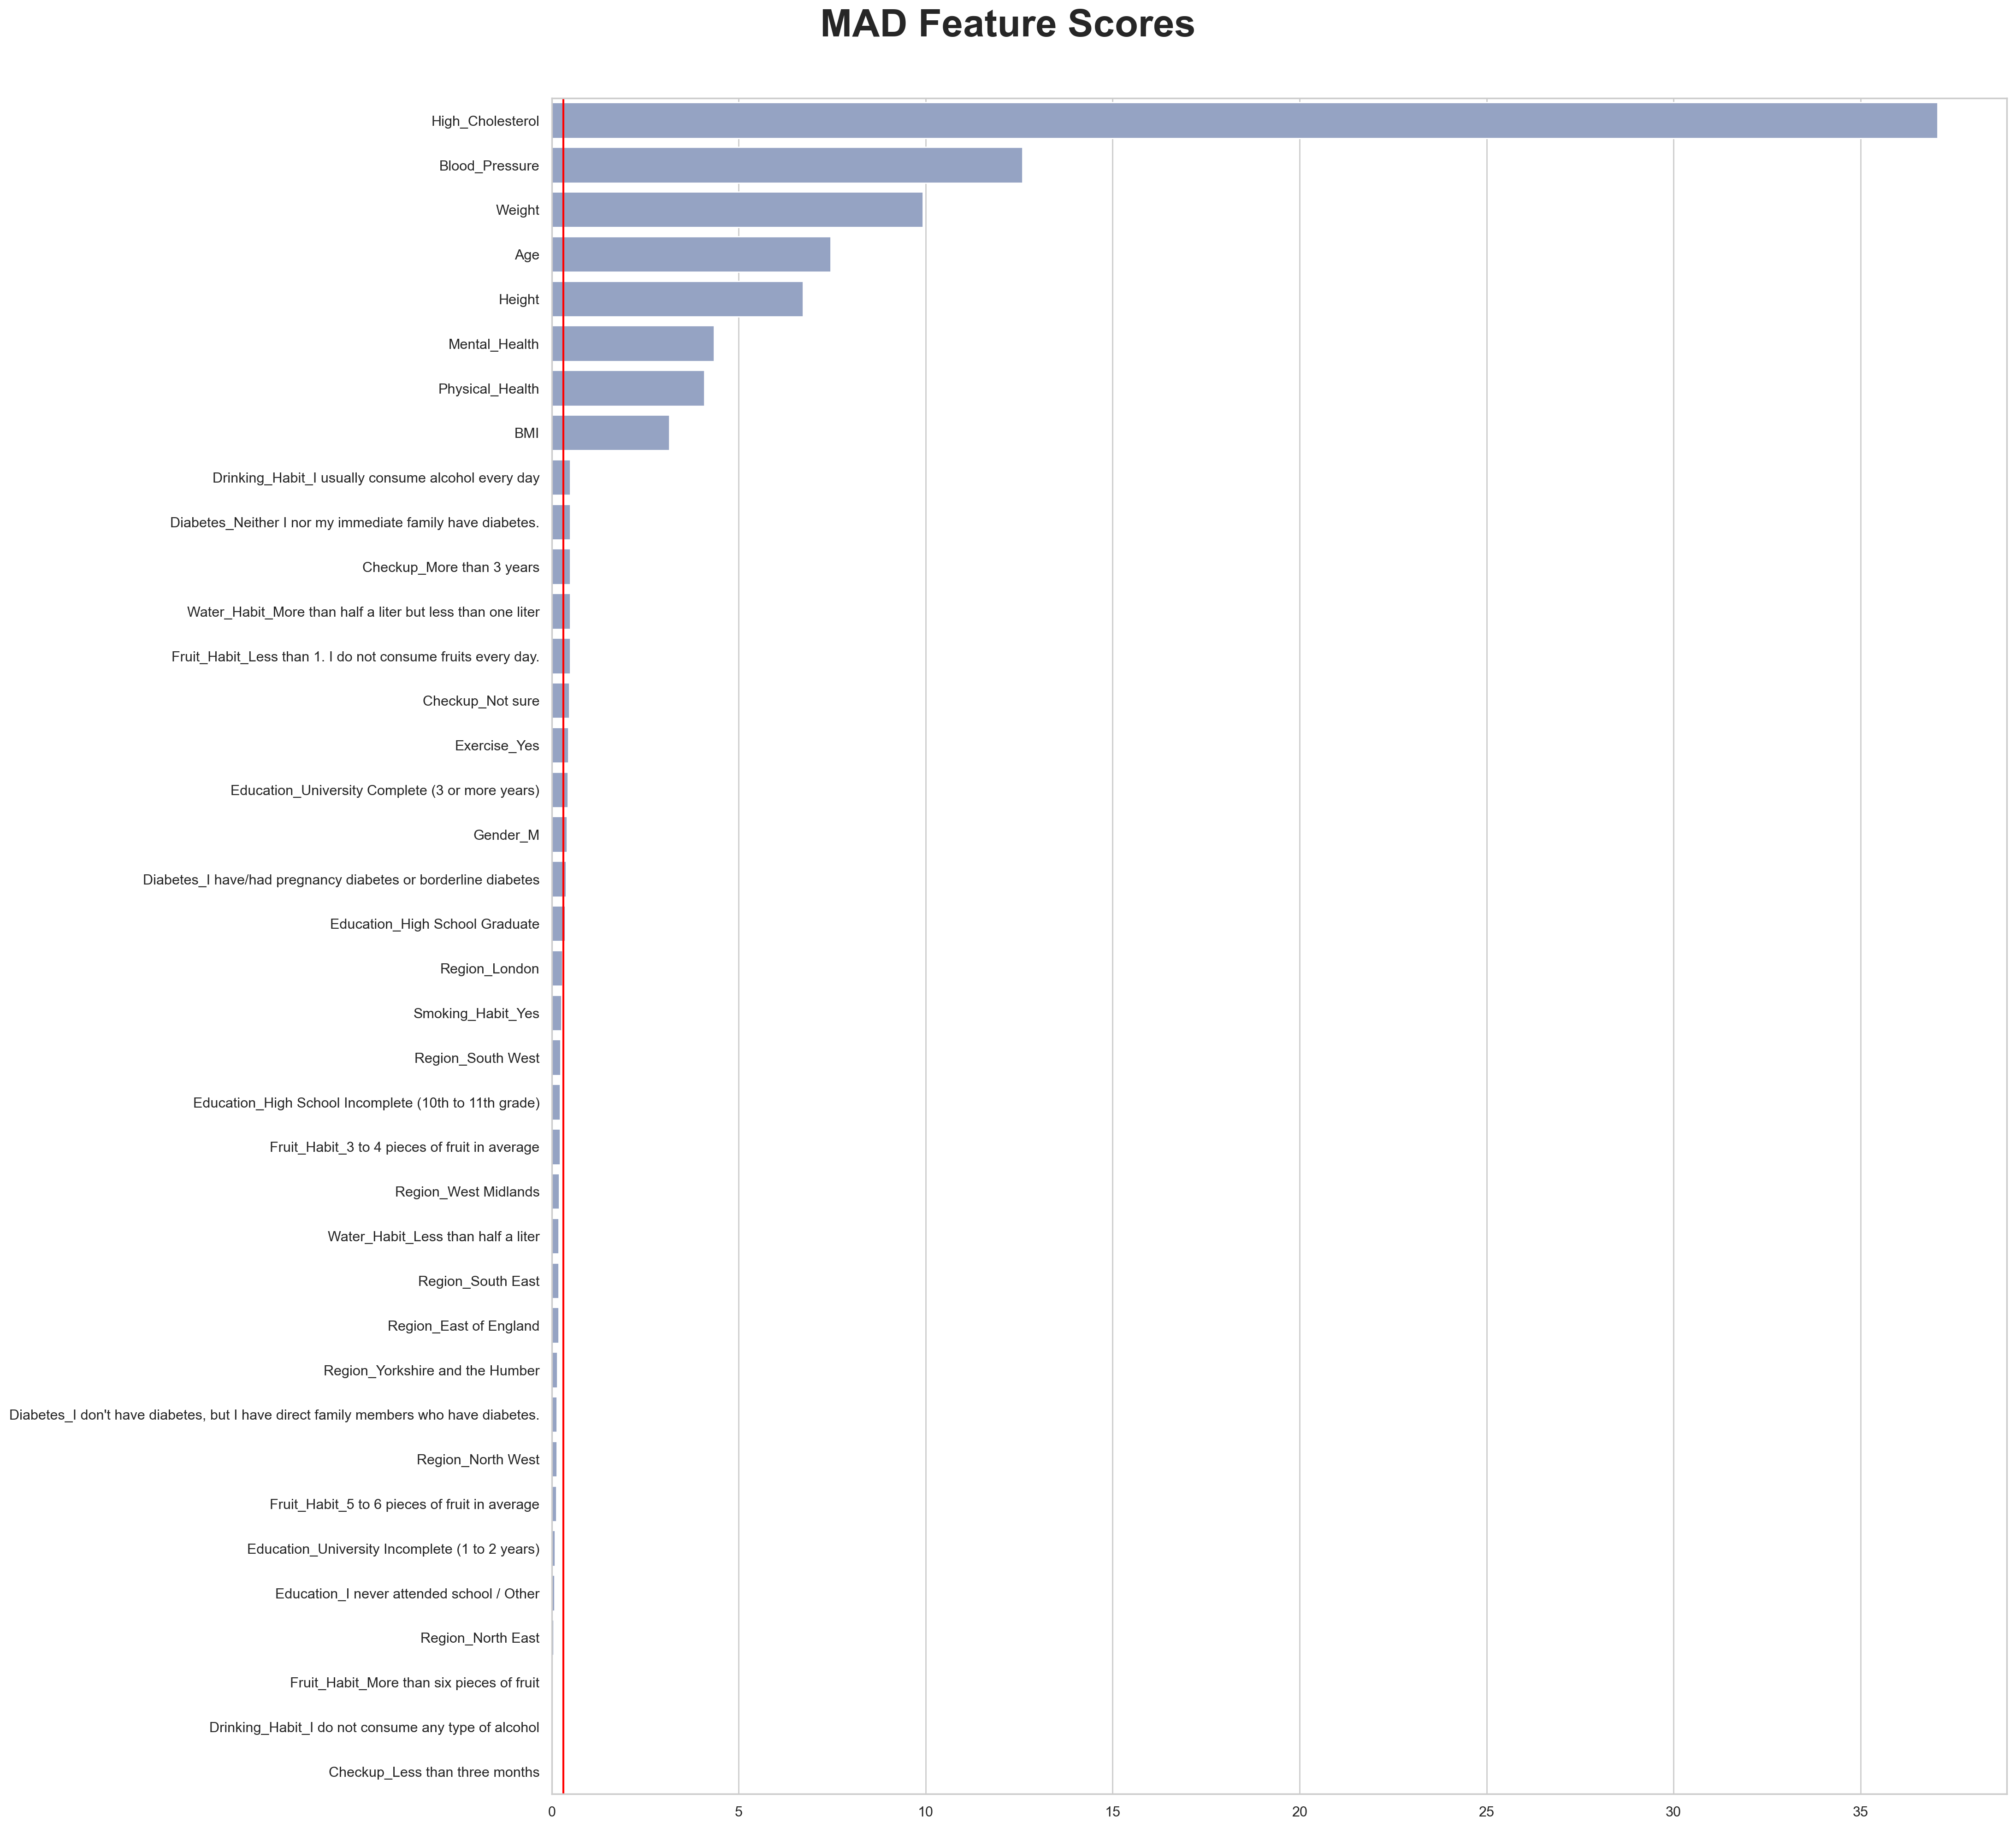

In [106]:
sns.set(font_scale=1)
sns.set_style("whitegrid")
plt.figure(figsize=(23,20), dpi=200)
sns.barplot(y=mad.index, x=mad.values, color=sns.color_palette("Set2")[2], orient="h")
plt.axvline(x=0.307, color='red')
plt.tight_layout(pad=4)
plt.suptitle("MAD Feature Scores", fontweight="bold", fontsize=30, y=1.015)
plt.savefig('Figures/MAD_BarChart.png', dpi=600, bbox_inches='tight')
plt.show()

In [107]:
mad = mad.tolist()

In [108]:
mad_bool = []
for elem in mad:
    if elem > 0.307:
        mad_bool.append(True)
    else:
        mad_bool.append(False)

In [109]:
mad_features = pd.Series(mad_bool, index = train_patient.columns)

In [110]:
mad_features

Height                                                                                  True
Weight                                                                                  True
High_Cholesterol                                                                        True
Blood_Pressure                                                                          True
Mental_Health                                                                           True
Physical_Health                                                                         True
Age                                                                                     True
BMI                                                                                     True
Region_East of England                                                                  True
Region_London                                                                           True
Region_North East                                                     

### 2.7.8 Feature Selection Results <a class="anchor" id="results"></a>

In [111]:
feature_selection_df = pd.DataFrame({'Feature':train_patient.columns,
                                     'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support,
                                     'RFE':selected_features, 
                                     'MAD': mad_features,
                                     'KBestFeatures' : k_features})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(len(train_patient))

Feature  Logistics  \
1                                              Weight      False   
2                                     Physical_Health      False   
3                                       Mental_Health      False   
4                                    High_Cholesterol      False   
5                                              Height      False   
6                                      Blood_Pressure      False   
7                                                 BMI      False   
8                                                 Age      False   
9   Fruit_Habit_Less than 1. I do not consume frui...       True   
10                                       Exercise_Yes       True   
11  Diabetes_Neither I nor my immediate family hav...       True   
12                                   Checkup_Not sure       True   
13                          Checkup_More than 3 years       True   
14                                  Region_North East      False   
15                                      Region_London      False   
16                             Region_East of England      False   
17                                           Gender_M       True   
18      Fruit_Habit_3 to 4 pieces of fruit in average       True   
19  Drinking_Habit_I usually consume alcohol every...       True   
20  Diabetes_I have/had pregnancy diabetes or bord...       True   
21                                  Smoking_Habit_Yes      False   
22                    Region_Yorkshire and the Humber      False   
23                               Region_West Midlands      False   
24                                  Region_South West      False   
25                                  Region_South East      False   
26                                  Region_North West      False   
27          Education_I never attended school / Other      False   
28  Education_High School Incomplete (10th to 11th...      False   
29                     Education_High School Graduate      False   
30  Diabetes_I don't have diabetes, but I have dir...      False   
31  Water_Habit_More than half a liter but less th...      False   
32                 Water_Habit_Less than half a liter      False   
33          Fruit_Habit_More than six pieces of fruit      False   
34      Fruit_Habit_5 to 6 pieces of fruit in average      False   
35     Education_University Incomplete (1 to 2 years)      False   
36    Education_University Complete (3 or more years)      False   
37  Drinking_Habit_I do not consume any type of al...      False   
38                     Checkup_Less than three months      False   

    Random Forest    RFE    MAD  KBestFeatures  Total  
1            True   True   True           True      4  
2            True   True   True           True      4  
3            True   True   True           True      4  
4            True   True   True           True      4  
5            True   True   True           True      4  
6            True   True   True           True      4  
7            True   True   True           True      4  
8            True   True   True           True      4  
9            True   True  False          False      3  
10           True   True  False          False      3  
11           True   True  False          False      3  
12           True   True  False          False      3  
13           True   True  False          False      3  
14          False  False   True           True      2  
15          False  False   True           True      2  
16          False  False   True           True      2  
17          False   True  False          False      2  
18          False   True  False          False      2  
19          False   True  False          False      2  
20          False   True  False          False      2  
21          False   True  False          False      1  
22          False  False   True          False      1  
23          False  False   True          False      1  
24          False  False   True          False   

In [112]:
X_train = X_train_num_scaled [['Gender_M',
 'Fruit_Habit_Less than 1. I do not consume fruits every day.',
 'Exercise_Yes',
 'Diabetes_Neither I nor my immediate family have diabetes.',
 'Checkup_More than 3 years',
 'BMI',
 'Physical_Health',
 'Mental_Health',
 'High_Cholesterol',
 'Drinking_Habit_I usually consume alcohol every day'
]]

In [113]:
X_train.head()

Gender_M  \
PatientID             
1046            1.0   
1140            1.0   
1859            1.0   
1297            1.0   
1027            0.0   

           Fruit_Habit_Less than 1. I do not consume fruits every day.  \
PatientID                                                                
1046                                                     1.0             
1140                                                     0.0             
1859                                                     1.0             
1297                                                     1.0             
1027                                                     0.0             

           Exercise_Yes  \
PatientID                 
1046                0.0   
1140                1.0   
1859                1.0   
1297                1.0   
1027                0.0   

           Diabetes_Neither I nor my immediate family have diabetes.  \
PatientID                                                              
1046                                                     0.0           
1140                                                     1.0           
1859                                                     1.0           
1297                                                     1.0           
1027                                                     0.0           

           Checkup_More than 3 years       BMI  Physical_Health  \
PatientID                                                         
1046                             0.0  0.141006             0.00   
1140                             0.0  0.367378             0.25   
1859                             0.0  0.618902             0.35   
1297                             0.0  0.799543             0.15   
1027                             1.0  0.912348             0.00   

           Mental_Health  High_Cholesterol  \
PatientID                                    
1046            0.384615          0.287313   
1140            0.000000          0.552239   
1859            0.769231          0.645522   
1297            0.230769          0.537313   
1027            0.576923          0.720149   

           Drinking_Habit_I usually consume alcohol every day  
PatientID                                                      
1046                                                     1.0   
1140                                                     1.0   
1859                                                     1.0   
1297                                                     0.0   
1027                                                     0.0

In [114]:
X_val = X_val_num_scaled [['Gender_M',
 'Fruit_Habit_Less than 1. I do not consume fruits every day.',
 'Exercise_Yes',
 'Diabetes_Neither I nor my immediate family have diabetes.',
 'Checkup_More than 3 years',
 'BMI',
 'Physical_Health',
 'Mental_Health',
 'High_Cholesterol',
 'Drinking_Habit_I usually consume alcohol every day'
]]

In [115]:
X_val.head()

Gender_M  \
PatientID             
1401            0.0   
1789            1.0   
1576            1.0   
1209            1.0   
1434            0.0   

           Fruit_Habit_Less than 1. I do not consume fruits every day.  \
PatientID                                                                
1401                                                     1.0             
1789                                                     0.0             
1576                                                     1.0             
1209                                                     0.0             
1434                                                     1.0             

           Exercise_Yes  \
PatientID                 
1401                0.0   
1789                0.0   
1576                0.0   
1209                0.0   
1434                1.0   

           Diabetes_Neither I nor my immediate family have diabetes.  \
PatientID                                                              
1401                                                     1.0           
1789                                                     0.0           
1576                                                     0.0           
1209                                                     0.0           
1434                                                     0.0           

           Checkup_More than 3 years       BMI  Physical_Health  \
PatientID                                                         
1401                             1.0  0.232470             0.35   
1789                             0.0  0.556402             0.30   
1576                             0.0  0.587652             0.25   
1209                             0.0  0.536585             0.30   
1434                             1.0  0.870427             0.00   

           Mental_Health  High_Cholesterol  \
PatientID                                    
1401            0.346154          0.085821   
1789            0.153846          0.578358   
1576            0.807692          0.641791   
1209            0.153846          0.578358   
1434            0.769231          0.529851   

           Drinking_Habit_I usually consume alcohol every day  
PatientID                                                      
1401                                                     1.0   
1789                                                     0.0   
1576                                                     1.0   
1209                                                     0.0   
1434                                                     0.0

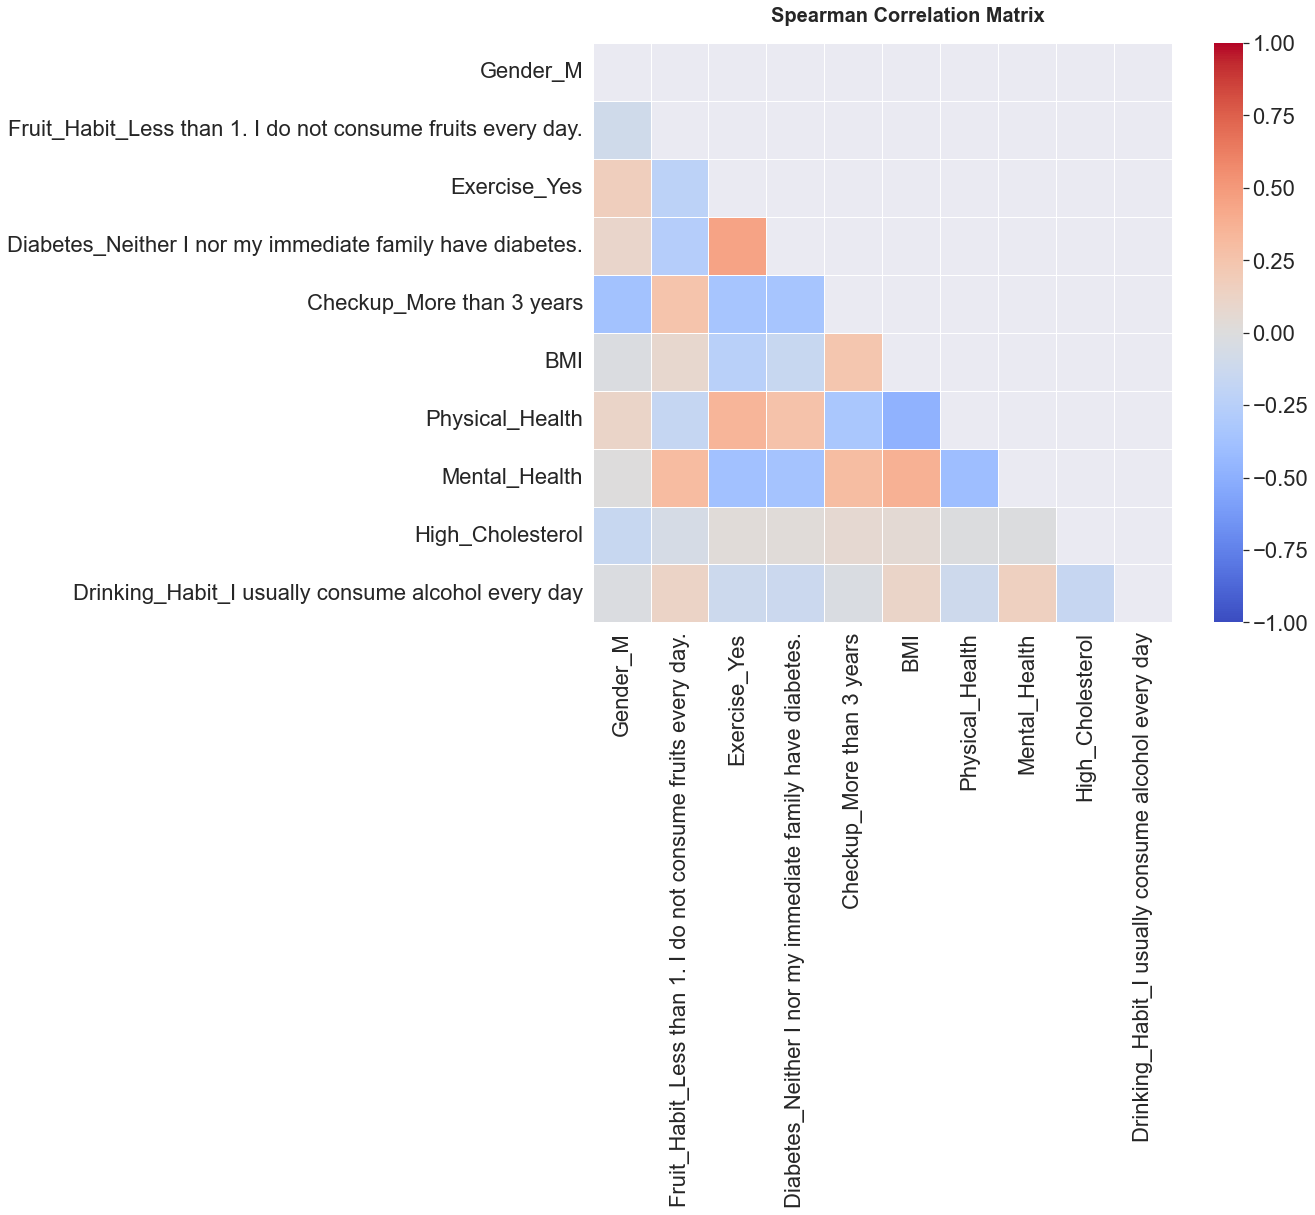

In [116]:
cor_spearman = np.round(X_train.corr(method ='spearman'), decimals=2)
cor_spearman

cor_heatmap(cor_spearman, 2)
plt.savefig('Figures/Spearman Correlation After.png', dpi=600, bbox_inches='tight')
plt.show()

## 3. Modelling <a class="anchor" id="modelling"></a>

Functions that will be used to evaluate our models and extract assessment metrics:

In [262]:
def avg_score(model):
    score_train = []
    score_val = []
    timer = []
    f1_score_val = []
    f1_score_train = []
    
    for i in range(10):
        begin = time.perf_counter() # start counting time
        model.fit(X_train, y_train) # fit your model to your training data
        end = time.perf_counter() # stop counting time
        
        value_train = model.score(X_train, y_train) # mean accuracy for train
        value_val = model.score(X_val, y_val) # mean accuracy for validation
        score_train.append(value_train) # append the mean accuracy in train to your list score_train
        score_val.append(value_val) # append the mean accuracy in validation to your list score_val
        timer.append(end-begin) # append the time to your list timer
        f1_score_val.append(f1_score(model.predict(X_val), y_val))
        f1_score_train.append(f1_score(model.predict(X_train), y_train))
        
    
    avg_time = round(np.mean(timer),3) # check the mean value of training time for your 10 models 
    avg_train = round(np.mean(score_train),3) # check the mean accuracy in train for your 10 models
    avg_val = round(np.mean(score_val),3) # check the mean accuracy in validation for your 10 models
    std_time = round(np.std(timer),2) # check the standard deviation of training time for your 10 models
    std_train = round(np.std(score_train),2) # check the standard deviation of the mean accuracy in train for your 10 models
    std_val = round(np.std(score_val),2) # check the standard deviation of the mean accuracy in validation for your 10 models
    avg_f1_val = round(np.mean(f1_score_val),3)
    avg_f1_train = round(np.mean(f1_score_train),3)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_val) + '+/-' + str(std_val), str(avg_f1_train), str(avg_f1_val)

def show_results(df, models):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for model in models:
        # obtain the results provided by avg_score
        time, avg_train, avg_val, avg_f1_train, avg_f1_val = avg_score(model)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_val, avg_f1_train, avg_f1_val
        count+=1
    return df

In [263]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))

    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))

###  3.1 Logistic Regression <a class="anchor" id="logistic"></a>

In [264]:
parameters_LogisticRegression = [
    {'C': np.logspace(-3,3,7),
     "penalty":["l1","l2"],
     "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
    }
    
]
model_LogisticRegression = GridSearchCV(LogisticRegression(), parameters_LogisticRegression, cv=10, scoring='f1')
model_LogisticRegression.fit(X_train, y_train)

print(model_LogisticRegression.best_params_)

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [265]:
pred_prob = model_LogisticRegression.predict_proba(X_val)
pred_prob

array([[0.3570272 , 0.6429728 ],
       [0.5659201 , 0.4340799 ],
       [0.40112088, 0.59887912],
       [0.56656521, 0.43343479],
       [0.33732817, 0.66267183],
       [0.62632271, 0.37367729],
       [0.65052558, 0.34947442],
       [0.2749502 , 0.7250498 ],
       [0.6682617 , 0.3317383 ],
       [0.5311077 , 0.4688923 ],
       [0.56525697, 0.43474303],
       [0.4591069 , 0.5408931 ],
       [0.56311099, 0.43688901],
       [0.38010403, 0.61989597],
       [0.37598252, 0.62401748],
       [0.30430039, 0.69569961],
       [0.70094394, 0.29905606],
       [0.35540472, 0.64459528],
       [0.40079629, 0.59920371],
       [0.36367976, 0.63632024],
       [0.72755555, 0.27244445],
       [0.65257176, 0.34742824],
       [0.66840818, 0.33159182],
       [0.41552463, 0.58447537],
       [0.28839746, 0.71160254],
       [0.29626174, 0.70373826],
       [0.45122745, 0.54877255],
       [0.30830694, 0.69169306],
       [0.53177265, 0.46822735],
       [0.32482637, 0.67517363],
       [0.

In [266]:
labels_train = model_LogisticRegression.predict(X_train)
labels_val = model_LogisticRegression.predict(X_val)

In [267]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       289
           1       0.83      0.93      0.88       322

    accuracy                           0.86       611
   macro avg       0.87      0.86      0.86       611
weighted avg       0.87      0.86      0.86       611

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

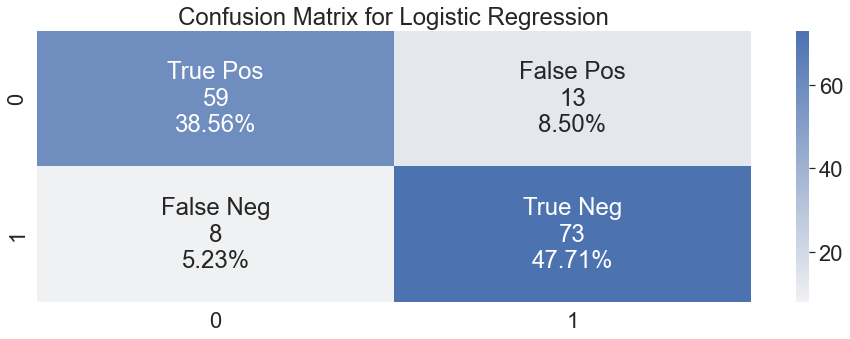

In [268]:
# confusion matrix 
sns.set(font_scale=2)
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_LogisticRegression_confusionMatrix = confusion_matrix(y_val, labels_val)
test_counts = ["{0:0.0f}".format(value) for value in model_LogisticRegression_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_LogisticRegression_confusionMatrix .flatten()/np.sum(model_LogisticRegression_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for Logistic Regression")
sns.heatmap(model_LogisticRegression_confusionMatrix, annot=test_labels, fmt='', cmap=sns.color_palette("light:b", as_cmap=True));
plt.savefig('Figures/ConfusionMatrix_Logistic.png', dpi=600, bbox_inches='tight')

###  3.2 Gaussian Naive Bayes <a class="anchor" id="gaussiannb"></a>

In [269]:
parameters_GaussianNB = [
    {"var_smoothing":[0.0001,0.001,0.01,0.1]
    }
    
]
model_GaussianNB = GridSearchCV(GaussianNB(), parameters_GaussianNB, cv=10, scoring='f1')
model_GaussianNB.fit(X_train, y_train)

print(model_GaussianNB.best_params_)

{'var_smoothing': 0.0001}


In [270]:
labels_train = model_GaussianNB.predict(X_train)
labels_val = model_GaussianNB.predict(X_val)

In [271]:
model_GaussianNB.predict_proba(X_val)

array([[5.60530624e-02, 9.43946938e-01],
       [9.89598568e-01, 1.04014316e-02],
       [7.11584518e-02, 9.28841548e-01],
       [9.90028269e-01, 9.97173076e-03],
       [5.37234301e-03, 9.94627657e-01],
       [9.97107540e-01, 2.89246030e-03],
       [9.94028379e-01, 5.97162101e-03],
       [5.47853369e-04, 9.99452147e-01],
       [9.99992760e-01, 7.23985362e-06],
       [9.83759569e-01, 1.62404307e-02],
       [8.89397812e-01, 1.10602188e-01],
       [3.36383215e-01, 6.63616785e-01],
       [9.91771606e-01, 8.22839438e-03],
       [4.29200283e-02, 9.57079972e-01],
       [8.42254166e-02, 9.15774583e-01],
       [9.20569726e-04, 9.99079430e-01],
       [9.97838282e-01, 2.16171807e-03],
       [3.37352372e-03, 9.96626476e-01],
       [2.41790546e-01, 7.58209454e-01],
       [7.79805060e-01, 2.20194940e-01],
       [9.99788392e-01, 2.11608123e-04],
       [9.99842382e-01, 1.57617539e-04],
       [9.99928131e-01, 7.18687623e-05],
       [3.79864675e-02, 9.62013532e-01],
       [2.201810

In [272]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       289
           1       0.84      0.88      0.86       322

    accuracy                           0.85       611
   macro avg       0.85      0.84      0.85       611
weighted avg       0.85      0.85      0.85       611

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

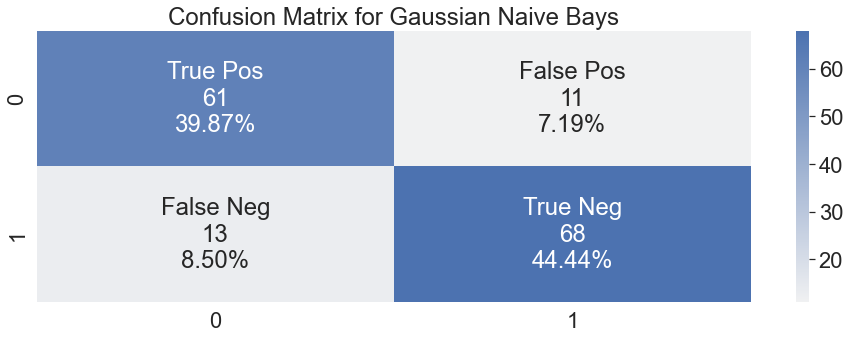

In [273]:
# confusion matrix 
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_GaussianNB_confusionMatrix = confusion_matrix(y_val, labels_val)
test_counts = ["{0:0.0f}".format(value) for value in model_GaussianNB_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_GaussianNB_confusionMatrix .flatten()/np.sum(model_GaussianNB_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for Gaussian Naive Bays")
sns.heatmap(model_GaussianNB_confusionMatrix, annot=test_labels, fmt='', cmap=sns.color_palette("light:b", as_cmap=True));
plt.savefig('Figures/ConfusionMatrix_Naive.png', dpi=600, bbox_inches='tight')

###  3.3 KNN <a class="anchor" id="knn"></a>

In [274]:
numberK_list=np.arange(2,90)
high_score=0
nof=0           
score_list_train =[]
score_list_val =[]
for n in numberK_list:
    model = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    score_train = model.score(X_train, y_train)
    score_val = model.score(X_val, y_val)
    score_list_train.append(score_train)
    score_list_val.append(score_val)
    
    if(score_val>high_score):
        high_score = score_val
        nof = numberK_list[n-1]
print("Best number of neighbors: %d" %nof)
print("Mean accuracy in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))
print("Mean accuracy in validation with %d neighbors: %f" % (nof, high_score))

Best number of neighbors: 3
Mean accuracy in train with 3 neighbors: 0.931260
Mean accuracy in validation with 3 neighbors: 0.921569


In [275]:
parameters_KNN = [
    {'n_neighbors': [3, 4, 5, 6, 7, 8],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
     'metric': ['minkowski', 'manhattan'],
     'weights': ['uniform', 'distance'],
     'leaf_size': [10, 20, 30, 40]
    }
    
]
model_KNN = GridSearchCV(KNeighborsClassifier(), parameters_KNN, cv=10, scoring='f1')
model_KNN.fit(X_train, y_train)

print(model_KNN.best_params_)

{'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [276]:
labels_train = model_KNN.predict(X_train)
labels_val = model_KNN.predict(X_val)

In [277]:
model_KNN.predict_proba(X_val)

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.21513806, 0.78486194],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.26234494, 0.73765506],
       [0.08190759, 0.91809241],
       [0.70135291, 0.29864709],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.17796845, 0.82203155],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

In [278]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       322

    accuracy                           1.00       611
   macro avg       1.00      1.00      1.00       611
weighted avg       1.00      1.00      1.00       611

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

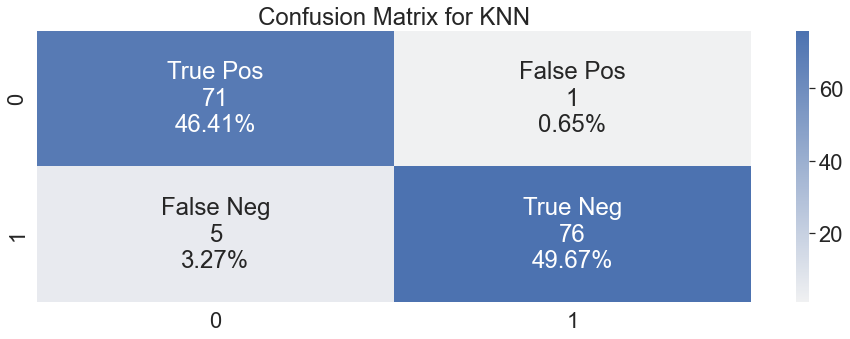

In [279]:
# confusion matrix 
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_KNN_confusionMatrix = confusion_matrix(y_val, labels_val)
test_counts = ["{0:0.0f}".format(value) for value in model_KNN_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_KNN_confusionMatrix .flatten()/np.sum(model_KNN_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for KNN")
sns.heatmap(model_KNN_confusionMatrix, annot=test_labels, fmt='', cmap=sns.color_palette("light:b", as_cmap=True));
plt.savefig('Figures/ConfusionMatrix_KNN.png', dpi=600, bbox_inches='tight')

### 3.4 Decision Trees <a class="anchor" id="dt"></a>

In [304]:
parameters_DT = [
    {'max_depth': [10,12,13,20],
     'min_samples_split': [1,2, 3, 4,5],
     'max_leaf_nodes': ["None",10,50,70],
    'criterion': ["gini", "entropy"],
     'max_features':["None","auto","sqrt","log2"],
     'random_state': [0,5,42,"None"]
    }
]

In [305]:
model_DT = GridSearchCV(DecisionTreeClassifier(), parameters_DT, cv=10, scoring='f1')
model_DT.fit(X_train, y_train)
final_DT = model_DT.best_estimator_

print(model_DT.best_params_)

{'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'max_leaf_nodes': 70, 'min_samples_split': 1, 'random_state': 0}


In [306]:
dot_data = tree.export_graphviz(final_DT, out_file=None, 
                     feature_names=X_train.columns,
                     class_names=["Lower Average", "Above Average"],  # only to classification problems
                     filled=True)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"40,40!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
pydot_graph.write_png('Figures/DT.png')
gvz_graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [307]:
labels_train = model_DT.predict(X_train)
labels_val = model_DT.predict(X_val)

In [308]:
model_DT.predict_proba(X_val)

array([[0.        , 1.        ],
       [0.97391304, 0.02608696],
       [0.        , 1.        ],
       [0.97391304, 0.02608696],
       [0.05970149, 0.94029851],
       [0.97391304, 0.02608696],
       [0.97391304, 0.02608696],
       [0.06349206, 0.93650794],
       [1.        , 0.        ],
       [0.97391304, 0.02608696],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.97391304, 0.02608696],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.06349206, 0.93650794],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.97391304, 0.02608696],
       [0.94117647, 0.05882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.27272727, 0.72727273],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.06349206, 0.93650794],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

In [309]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       289
           1       0.97      0.99      0.98       322

    accuracy                           0.98       611
   macro avg       0.98      0.97      0.98       611
weighted avg       0.98      0.98      0.98       611

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

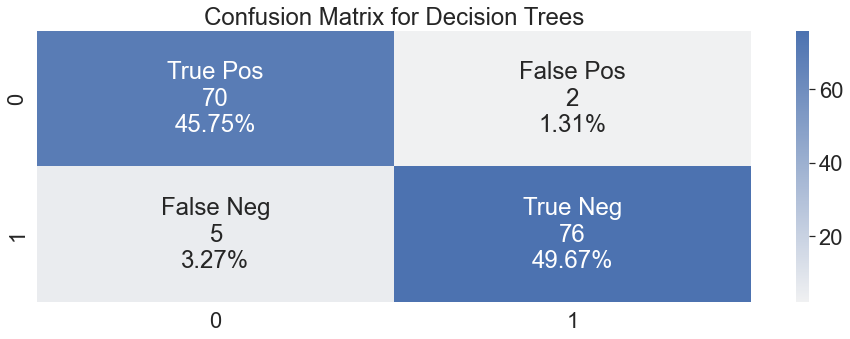

In [313]:
# confusion matrix 
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_DT_confusionMatrix = confusion_matrix(y_val, labels_val)
test_counts = ["{0:0.0f}".format(value) for value in model_DT_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_DT_confusionMatrix .flatten()/np.sum(model_DT_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for Decision Trees")
sns.heatmap(model_DT_confusionMatrix, annot=test_labels, fmt='', cmap=sns.color_palette("light:b", as_cmap=True));
plt.savefig('Figures/ConfusionMatrix_DT.png', dpi=600, bbox_inches='tight')

In [314]:
importances = final_DT.feature_importances_
pd.Series(importances, index = X_train.columns).sort_values(ascending = False)

Physical_Health                                                0.245689
Mental_Health                                                  0.177475
Fruit_Habit_Less than 1. I do not consume fruits every day.    0.149536
High_Cholesterol                                               0.120641
Diabetes_Neither I nor my immediate family have diabetes.      0.090494
Exercise_Yes                                                   0.085088
Gender_M                                                       0.058602
BMI                                                            0.036846
Drinking_Habit_I usually consume alcohol every day             0.022688
Checkup_More than 3 years                                      0.012941
dtype: float64

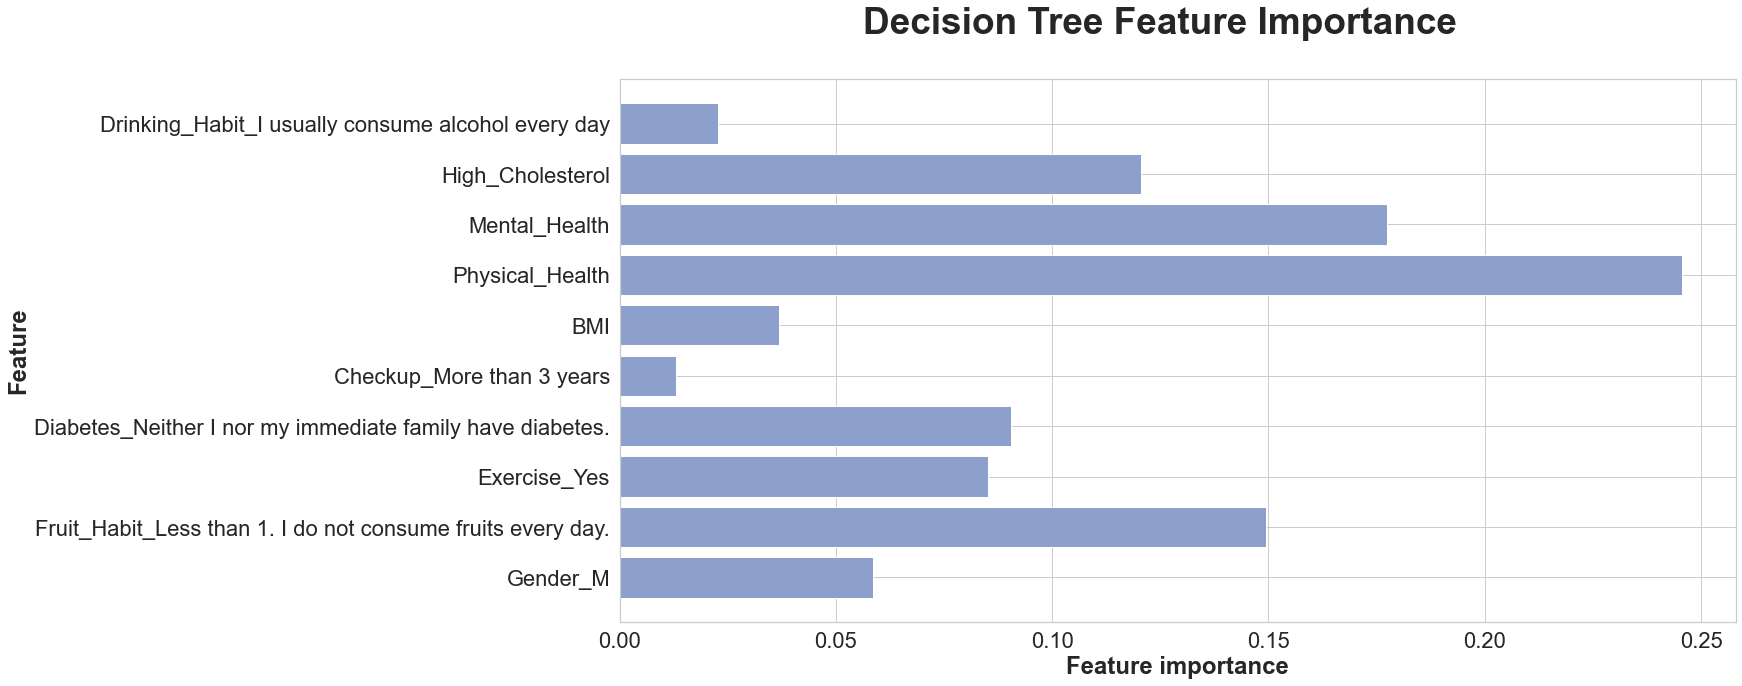

In [315]:
def plot_feature_importances(model):
    sns.set_style("whitegrid")
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,10))
    plt.barh(range(n_features), model.feature_importances_, align='center', color=sns.color_palette("Set2")[2])
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance", fontweight="bold")
    plt.ylabel("Feature", fontweight="bold")
    plt.suptitle("Decision Tree Feature Importance", fontweight="bold", fontsize=37)
    plt.savefig('Figures/DecisionTree_BarChart.png', dpi=600, bbox_inches='tight')
    plt.show()

plot_feature_importances(final_DT)

### 3.5 Support Vector Machine <a class="anchor" id="supportvectormachine"></a>

#### 3.5.1 Support Vector Classification  <a class="anchor" id="svc"></a>

In [289]:
parameters_SVC = [
    {'C': [0.5,1,10,100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','sigmoid']
    },
    
]
model_SVC= GridSearchCV(SVC(), parameters_SVC,cv=10,scoring ='f1')
model_SVC.fit(X_train, y_train)
print(model_SVC.best_params_)


{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [290]:
labels_train = model_SVC.predict(X_train)
labels_val = model_SVC.predict(X_val)

In [291]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       289
           1       0.98      0.99      0.99       322

    accuracy                           0.99       611
   macro avg       0.99      0.98      0.99       611
weighted avg       0.99      0.99      0.99       611

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

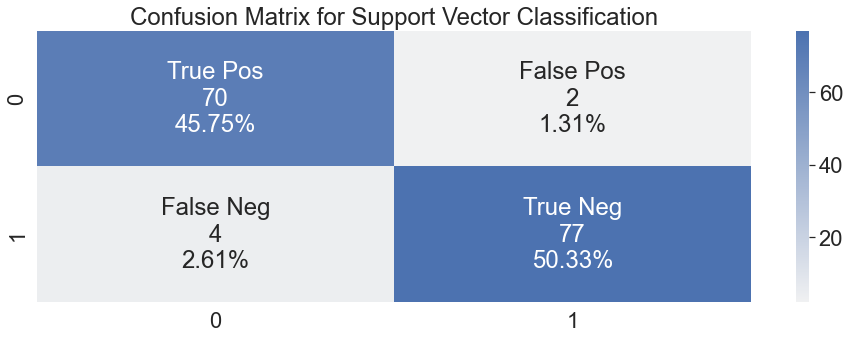

In [293]:
# confusion matrix 
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_SVC_confusionMatrix = confusion_matrix(y_val, labels_val)
test_counts = ["{0:0.0f}".format(value) for value in model_SVC_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_SVC_confusionMatrix .flatten()/np.sum(model_SVC_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for Support Vector Classification")
sns.heatmap(model_SVC_confusionMatrix, annot=test_labels, fmt='', cmap=sns.color_palette("light:b", as_cmap=True));
plt.savefig('Figures/ConfusionMatrix_SVC.png', dpi=600, bbox_inches='tight')

#### 3.5.2 Nu-Support Vector Classification <a class="anchor" id="nusvc"></a>

In [294]:
parameters_NuSVC = [
    {'nu': [0.5,1,10,100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf','sigmoid']
    },
    
]

model_NuSVC= GridSearchCV(NuSVC(), parameters_NuSVC,cv=10,scoring ='f1')
model_NuSVC.fit(X_train, y_train)
print(model_NuSVC.best_params_)


{'gamma': 1, 'kernel': 'rbf', 'nu': 0.5}


In [295]:
labels_train = model_NuSVC.predict(X_train)
labels_val = model_NuSVC.predict(X_val)

In [296]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       289
           1       0.84      0.94      0.89       322

    accuracy                           0.88       611
   macro avg       0.88      0.87      0.88       611
weighted avg       0.88      0.88      0.88       611

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

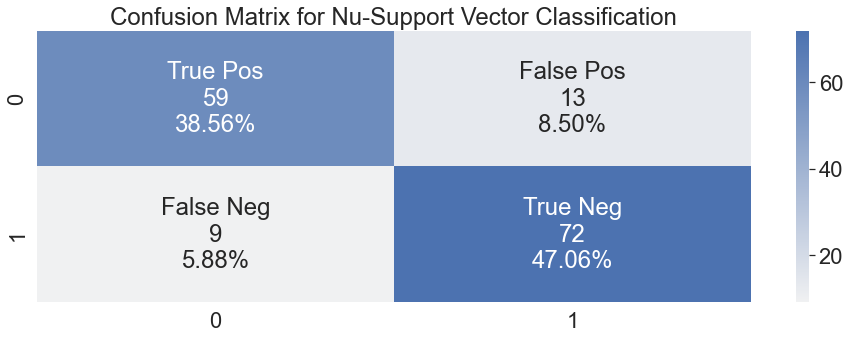

In [298]:
# confusion matrix 
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_NuSVC_confusionMatrix = confusion_matrix(y_val, labels_val)
test_counts = ["{0:0.0f}".format(value) for value in model_NuSVC_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_NuSVC_confusionMatrix .flatten()/np.sum(model_NuSVC_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for Nu-Support Vector Classification")
sns.heatmap(model_NuSVC_confusionMatrix, annot=test_labels, fmt='', cmap=sns.color_palette("light:b", as_cmap=True));
plt.savefig('Figures/ConfusionMatrix_Nu-SVC.png', dpi=600, bbox_inches='tight')

#### 3.5.3 Linear Support Vector Classification <a class="anchor" id="linearsvc"></a>

In [299]:
parameters_LinearSVC = [
    {'C': [0.5,1,10,100],
     'dual': [True,False]
    },
    
]
model_LinearSVC= GridSearchCV(LinearSVC(), parameters_LinearSVC,cv=10,scoring ='f1')
model_LinearSVC.fit(X_train, y_train)
print(model_LinearSVC.best_params_)

{'C': 0.5, 'dual': True}


In [300]:
labels_train = model_LinearSVC.predict(X_train)
labels_val = model_LinearSVC.predict(X_val)

In [301]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       289
           1       0.84      0.90      0.87       322

    accuracy                           0.86       611
   macro avg       0.86      0.85      0.85       611
weighted avg       0.86      0.86      0.86       611

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision  

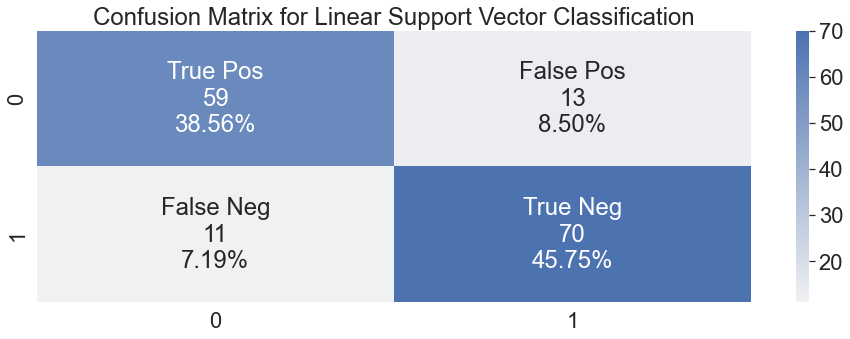

In [303]:
# confusion matrix 
group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
model_LinearSVC_confusionMatrix = confusion_matrix(y_val, labels_val)
test_counts = ["{0:0.0f}".format(value) for value in model_LinearSVC_confusionMatrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in model_LinearSVC_confusionMatrix .flatten()/np.sum(model_LinearSVC_confusionMatrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
plt.title("Confusion Matrix for Linear Support Vector Classification")
sns.heatmap(model_LinearSVC_confusionMatrix, annot=test_labels, fmt='', cmap=sns.color_palette("light:b", as_cmap=True));
plt.savefig('Figures/LinearSVC.png', dpi=600, bbox_inches='tight')

### 3.6 Neural Networks <a class="anchor" id="nn"></a>

In [159]:
model_logistic = MLPClassifier(activation='logistic')
model_tanh = MLPClassifier(activation='tanh')
model_relu = MLPClassifier(activation='relu')
model_identity = MLPClassifier(activation='identity')

df = pd.DataFrame(columns = ['Time','Train','Validation','F1 Train','F1 Validation'], index = ['logistic','tanh', 'relu', 'identity'])
show_results(df, [model_logistic, model_tanh, model_relu, model_identity])

Time         Train    Validation F1 Train F1 Validation
logistic  0.977+/-0.05   0.861+/-0.0    0.85+/-0.0    0.873         0.859
tanh      0.648+/-0.11   0.857+/-0.0  0.848+/-0.01    0.869         0.857
relu      0.928+/-0.04  0.864+/-0.01  0.854+/-0.01    0.874         0.861
identity    0.3+/-0.05   0.857+/-0.0  0.846+/-0.01    0.868         0.855

In [160]:
model_sgd = MLPClassifier(solver = 'sgd')
model_adam = MLPClassifier(solver = 'adam')
model_lbfgs = MLPClassifier(solver = 'lbfgs')

df = pd.DataFrame(columns = ['Time','Train','Validation','F1 Train','F1 Validation'], index = ['sgd','adam', 'lbfgs'])
show_results(df, [model_sgd, model_adam, model_lbfgs])

Time         Train    Validation F1 Train F1 Validation
sgd    0.933+/-0.07  0.846+/-0.01  0.862+/-0.01    0.858         0.872
adam   1.111+/-0.07  0.863+/-0.01   0.86+/-0.01    0.874         0.868
lbfgs  0.663+/-0.09   0.994+/-0.0  0.944+/-0.01    0.994         0.946

In [161]:
model_constant = MLPClassifier(solver = 'sgd', learning_rate = 'constant')
model_invscaling = MLPClassifier(solver = 'sgd', learning_rate = 'invscaling')

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['constant','invscaling'])
show_results(df, [model_constant, model_invscaling])

Time         Train    Validation f1 Train f1 Validation
constant    0.899+/-0.05  0.847+/-0.01   0.864+/-0.0    0.859         0.874
invscaling  0.111+/-0.02  0.546+/-0.08  0.539+/-0.09     0.52         0.514

In [162]:
parameters_NN = {
    'hidden_layer_sizes': [(200,80,60),(200,80,60,40),(200,80,60,40,20)],
    'activation': ['relu','tanh','logistic','identity'],
    'solver': ['lbfgs'],
}

In [163]:
model_NN = RandomizedSearchCV(MLPClassifier(), parameters_NN, cv=10)
model_NN.fit(X_train, y_train)

final_model_NN = model_NN.best_estimator_
print(model_NN.best_params_)

df = pd.DataFrame(columns = ['Time','Train','Validation','F1 Train','F1 Validation'], index = ['final_model_NN'])
show_results(df, [final_model_NN])

{'solver': 'lbfgs', 'hidden_layer_sizes': (200, 80, 60), 'activation': 'tanh'}


Time      Train   Validation F1 Train F1 Validation
final_model_NN  2.861+/-0.35  1.0+/-0.0  0.93+/-0.01      1.0         0.932

### 3.7 Ensemble Models <a class="anchor" id="ensemble"></a>

Ensemble learning is a machine learning technique that seeks better predictive performance by combining the predictions from multiple models.

In [164]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2, random_state = 1)

The function return_f1score will allow us to obtain the f1 score for all the models we are going to create on the notebook, and each model instance is going to be trained for 20 (10*2) times, using the RepeatedStratifiedKFold.

In [165]:
def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X, y, scoring = 'f1', cv = cv)
    return n_scores

The function return_results will receive as parameters all the models instances and is going to return the f1 scores from the previous function, and make a boxplot of the results for all the model instances.

In [166]:
def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X_train, y_train)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(18,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=10)
    plt.show()

#### 3.7.1 Bagging Classifier <a class="anchor" id="bagging"></a>

In [369]:
dt = final_DT.fit(X_train, y_train)
knn = model_KNN.fit(X_train, y_train)
lr = model_LogisticRegression.fit(X_train, y_train)

def get_models(*args):
    models = dict()
    for arg in args:
        models[str(arg) + '_bagging'] = BaggingClassifier(base_estimator = arg, random_state = 15)      
        models[str(arg)] = arg  
    return models

models = get_models(dt, knn, lr)
return_results(models)

>DecisionTreeClassifier(max_depth=12, max_features='auto', max_leaf_nodes=70,
                       min_samples_split=1, random_state=0)_bagging 0.935 (0.033)
>DecisionTreeClassifier(max_depth=12, max_features='auto', max_leaf_nodes=70,
                       min_samples_split=1, random_state=0) 0.901 (0.041)


KeyboardInterrupt: 

>True 0.930 (0.032)
>False 0.941 (0.032)


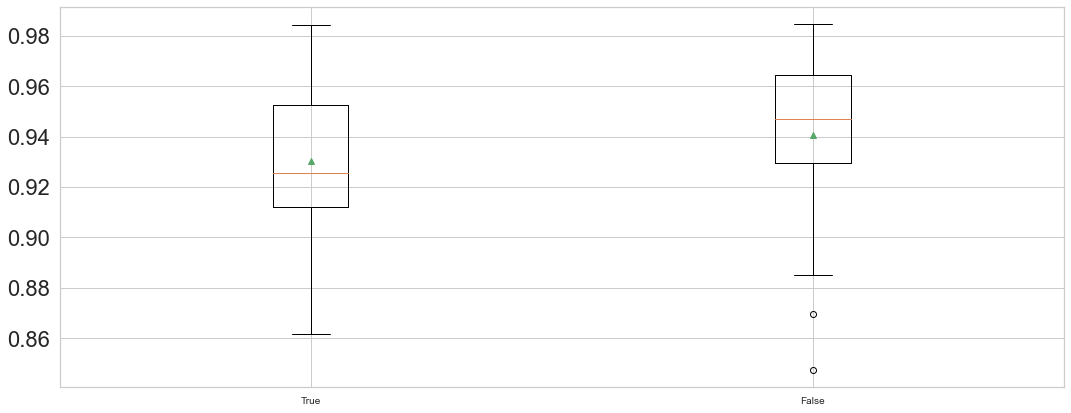

In [168]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = BaggingClassifier(bootstrap = value, random_state = 15)      
    return models

models = get_models([True, False])
return_results(models)

>0.1 0.837 (0.054)
>0.2 0.860 (0.039)
>0.4 0.899 (0.039)
>0.6 0.916 (0.030)
>0.8 0.925 (0.029)
>1.0 0.930 (0.032)


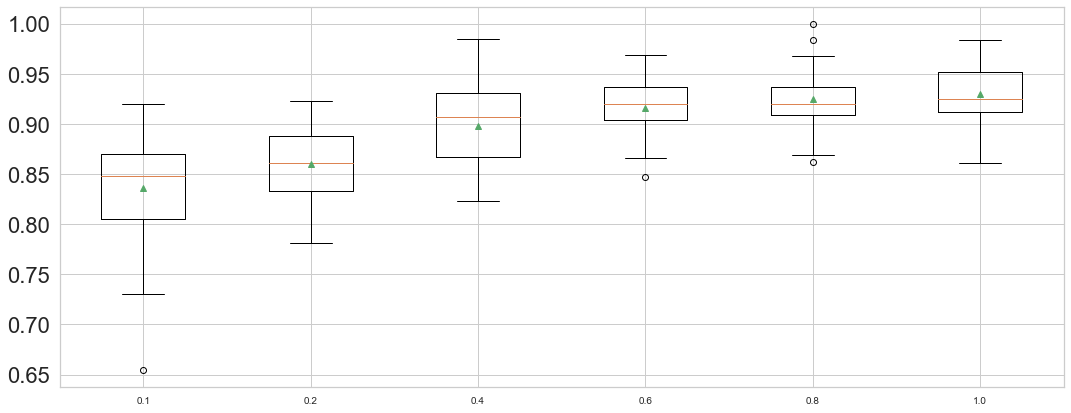

In [169]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = BaggingClassifier(max_samples = value, random_state = 15)      
    return models

models = get_models([0.1,0.2,0.4,0.6,0.8,1.0])
return_results(models)

In [170]:
parameters_Bagging = {
    'base_estimator': [DecisionTreeClassifier()],
    'n_estimators': [2,5,10,20,30,50,100,150,200],
    'max_samples': [0.9, 1],
    'max_features': [0.6,0.8,1.0],
    'bootstrap': [False]
}

In [171]:
model_Bagging = GridSearchCV(BaggingClassifier(), parameters_Bagging)
model_Bagging.fit(X_train, y_train)

final_model_Bagging = model_Bagging.best_estimator_
print(model_Bagging.best_params_)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['final_model_Bagging'])
show_results(df, [final_model_Bagging])

{'base_estimator': DecisionTreeClassifier(), 'bootstrap': False, 'max_features': 0.6, 'max_samples': 0.9, 'n_estimators': 150}


Time      Train    Validation f1 Train  \
final_model_Bagging  1.055+/-0.38  1.0+/-0.0  0.976+/-0.01      1.0   

                    f1 Validation  
final_model_Bagging         0.977

#### 3.7.2 Random Forest <a class="anchor" id="rforest"></a>

>10 0.936 (0.041)
>20 0.944 (0.033)
>50 0.948 (0.029)
>100 0.952 (0.028)
>200 0.951 (0.029)
>300 0.951 (0.029)


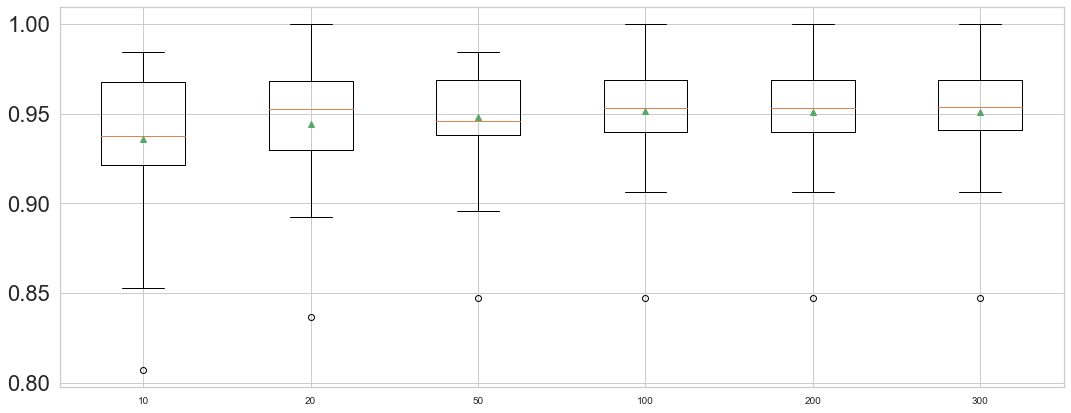

In [172]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(n_estimators = value, random_state = 10)      
    return models

models = get_models([10,20,50,100,200,300])
return_results(models)

>True 0.952 (0.031)
>False 0.962 (0.026)


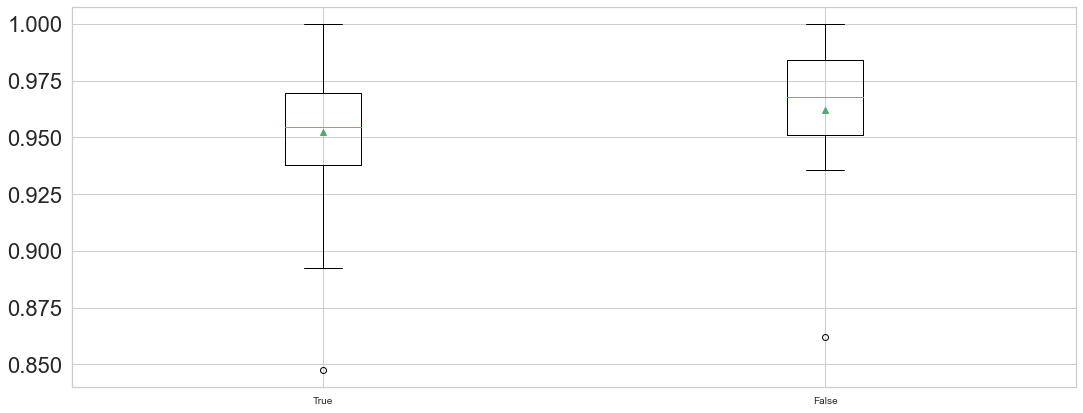

In [173]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(bootstrap = value, random_state = 15)      
    return models

models = get_models([True, False])
return_results(models)

In [174]:
model_gini = RandomForestClassifier(criterion='gini')
model_entropy= RandomForestClassifier(criterion='entropy')

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['gini','entropy'])
show_results(df, [model_gini, model_entropy])

Time      Train    Validation f1 Train f1 Validation
gini     0.649+/-0.13  1.0+/-0.0  0.976+/-0.01      1.0         0.978
entropy  0.581+/-0.17  1.0+/-0.0  0.972+/-0.01      1.0         0.973

In [175]:
model_small_maxdepth = RandomForestClassifier(max_depth=5)
model_medium_maxdepth = RandomForestClassifier(max_depth=10)
model_big_maxdepth = RandomForestClassifier(max_depth=15)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['small','medium', 'big'])
show_results(df, [model_small_maxdepth, model_medium_maxdepth, model_big_maxdepth])

Time        Train    Validation f1 Train f1 Validation
small   0.551+/-0.14  0.921+/-0.0    0.9+/-0.01    0.928         0.908
medium   0.54+/-0.19  0.998+/-0.0  0.969+/-0.01    0.998          0.97
big     0.563+/-0.17    1.0+/-0.0  0.981+/-0.01      1.0         0.982

>1 0.860 (0.041)
>2 0.855 (0.039)
>4 0.882 (0.034)
>6 0.911 (0.040)
>8 0.940 (0.031)
>10 0.952 (0.030)
>None 0.952 (0.031)


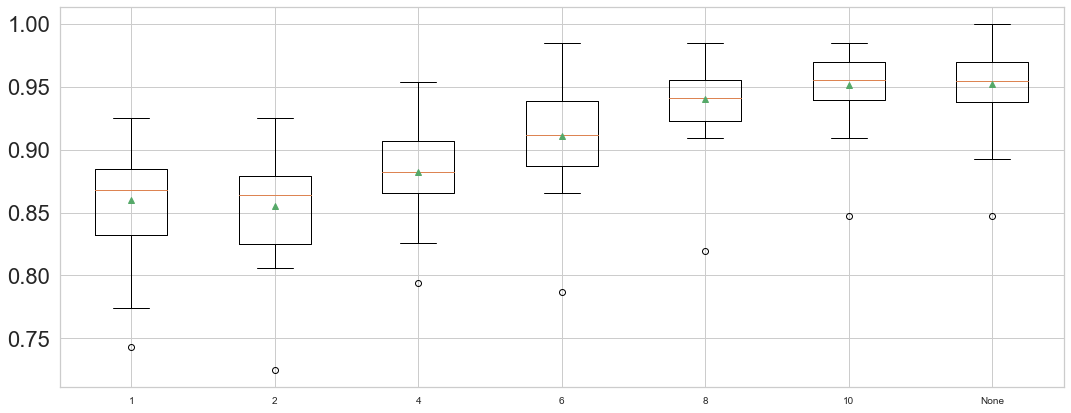

In [176]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(max_depth = value, random_state = 15)      
    return models

models = get_models([1,2,4,6,8,10,None])
return_results(models)

In [177]:
model_small_min_samples_leaf = RandomForestClassifier(min_samples_leaf=3)
model_medium_min_samples_leaf = RandomForestClassifier(min_samples_leaf=5)
model_big_min_samples_leaf = RandomForestClassifier(min_samples_leaf=8)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['small','medium', 'big'])
show_results(df, [model_small_min_samples_leaf, model_medium_min_samples_leaf, model_big_min_samples_leaf])

Time        Train    Validation f1 Train f1 Validation
small   0.698+/-0.16  0.976+/-0.0  0.925+/-0.01    0.978         0.931
medium  0.726+/-0.14  0.931+/-0.0   0.89+/-0.01    0.936         0.898
big     0.613+/-0.17  0.911+/-0.0  0.872+/-0.01    0.918         0.882

In [178]:
parameters_random_forest = {
    'n_estimators': [300],
    'criterion': ['gini'],
    'class_weight': ['balanced_subsample'],
    'max_depth': [None],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [False]
}

In [179]:
model_random_forest = GridSearchCV(RandomForestClassifier(), parameters_random_forest,scoring ='f1')
model_random_forest.fit(X_train, y_train)

final_model_forest = model_random_forest.best_estimator_
print(model_random_forest.best_params_)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['final_model_forest'])
show_results(df, [final_model_forest])

{'bootstrap': False, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Time      Train    Validation f1 Train  \
final_model_forest  1.768+/-0.33  1.0+/-0.0  0.995+/-0.01      1.0   

                   f1 Validation  
final_model_forest         0.995

Checking feature importance once again to make sure our feature selection is good.

In [211]:
importances = final_model_forest.feature_importances_
pd.Series(importances, index = X_train.columns).sort_values(ascending = False)

Checkup_More than 3 years                                      0.157781
High_Cholesterol                                               0.144507
Mental_Health                                                  0.124577
Fruit_Habit_Less than 1. I do not consume fruits every day.    0.118628
Physical_Health                                                0.118214
BMI                                                            0.103081
Diabetes_Neither I nor my immediate family have diabetes.      0.102214
Exercise_Yes                                                   0.068807
Gender_M                                                       0.035415
Drinking_Habit_I usually consume alcohol every day             0.026775
dtype: float64

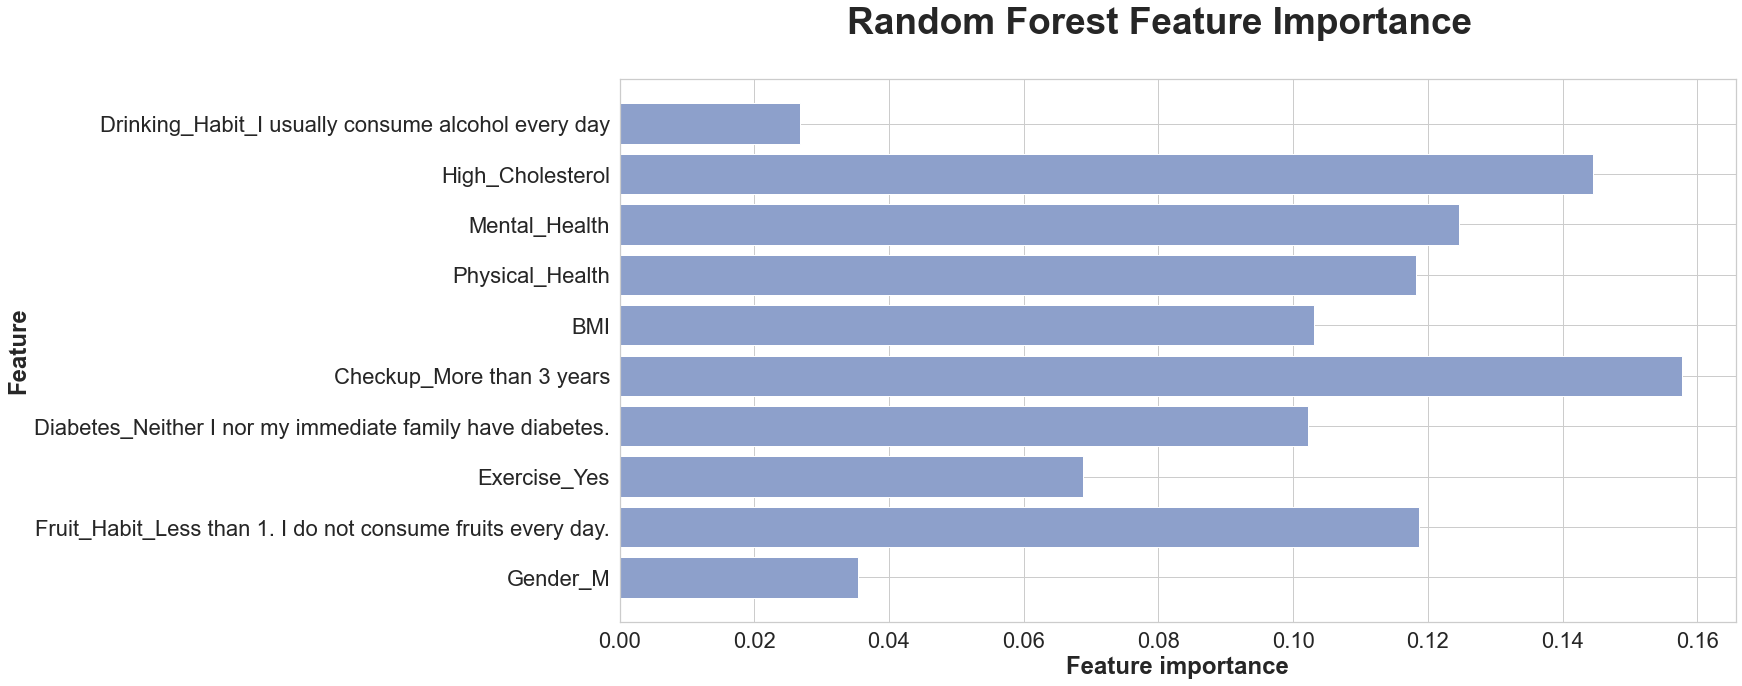

In [216]:
def plot_feature_importances(model):
    sns.set_style("whitegrid")
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,10))
    plt.barh(range(n_features), model.feature_importances_, align='center', color=sns.color_palette("Set2")[2])
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance", fontweight="bold")
    plt.ylabel("Feature", fontweight="bold")
    plt.suptitle("Random Forest Feature Importance", fontweight="bold", fontsize=37)
    plt.savefig('Figures/RandomForest_BarChart.png', dpi=600, bbox_inches='tight')
    plt.show()

plot_feature_importances(final_model_forest)

#### 3.7.3 Extra Trees <a class="anchor" id="et"></a>

In [181]:
parameters_ExtraTrees = {
    'n_estimators': [300],
    'criterion': ['gini'],
    'class_weight': ['balanced_subsample'],
    'max_depth': [None],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

In [182]:
model_ExtraTrees = GridSearchCV(ExtraTreesClassifier(), parameters_ExtraTrees, cv=10, scoring ='f1')

model_ExtraTrees.fit(X_train, y_train)
final_model_ExtraTrees = model_ExtraTrees.best_estimator_
print(model_ExtraTrees.best_params_)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['Extra_Trees'])
show_results(df, [final_model_ExtraTrees])

{'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Time      Train  Validation f1 Train f1 Validation
Extra_Trees  1.131+/-0.12  1.0+/-0.0  0.98+/-0.0      1.0         0.981

#### 3.7.4 AdaBoost <a class="anchor" id="ada"></a>

>1 0.881 (0.044)
>2 0.925 (0.035)
>3 0.951 (0.032)
>4 0.963 (0.027)
>5 0.961 (0.026)
>6 0.965 (0.028)
>7 0.960 (0.028)
>8 0.965 (0.033)
>9 0.952 (0.029)
>10 0.933 (0.032)


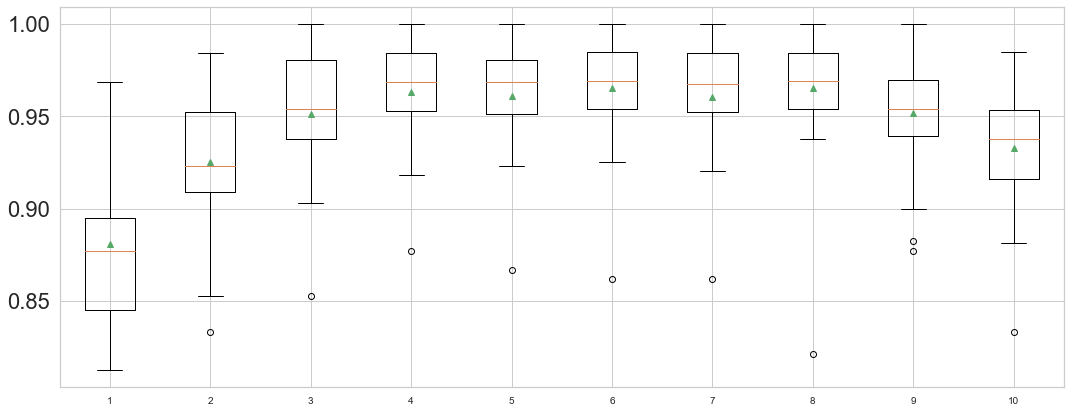

In [183]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=value), random_state = 15)      
    return models

models = get_models([1,2,3,4,5,6, 7, 8, 9, 10])
return_results(models)

>ad_LR 0.858 (0.038)
>ad_def 0.881 (0.044)


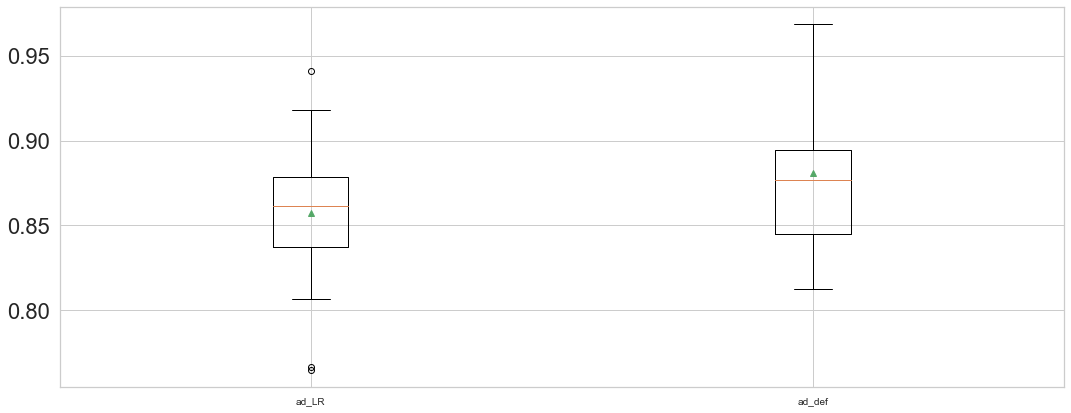

In [184]:
def get_models():
    models = dict()
    models['ad_LR'] = AdaBoostClassifier(base_estimator = LogisticRegression(max_iter=500), random_state = 15) 
    models['ad_def'] = AdaBoostClassifier(random_state = 15)  
    return models

models = get_models()
return_results(models)

>2 0.775 (0.048)
>5 0.834 (0.045)
>10 0.853 (0.046)
>20 0.867 (0.039)
>30 0.875 (0.039)
>50 0.881 (0.044)
>100 0.880 (0.044)
>150 0.883 (0.045)


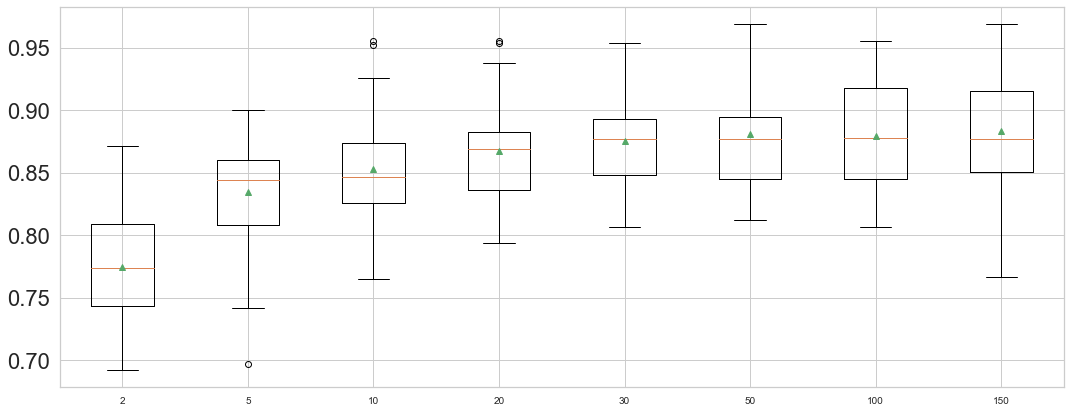

In [185]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(n_estimators = value, random_state = 15)      
    return models

models = get_models([2,5,10,20,30,50,100,150])
return_results(models)

>0.1 0.866 (0.038)
>0.2 0.862 (0.040)
>0.3 0.864 (0.039)
>0.4 0.865 (0.042)
>0.5 0.871 (0.041)
>0.6 0.869 (0.042)
>0.7 0.878 (0.041)
>0.8 0.882 (0.042)
>0.9 0.878 (0.041)
>1.0 0.881 (0.044)


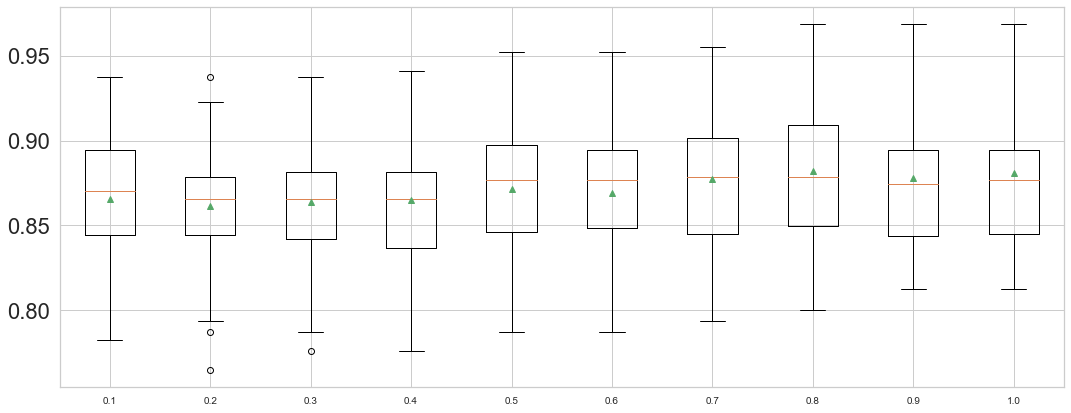

In [186]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = AdaBoostClassifier(learning_rate = value, random_state = 15)      
    return models

models = get_models([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
return_results(models)

In [187]:
parametes_adaBoost = {
              "base_estimator" : [DecisionTreeClassifier(max_depth=4),DecisionTreeClassifier(max_depth=6),DecisionTreeClassifier(max_depth=7)],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[30,50,80,100],
              "learning_rate":  [0.8, 1,1.5]
}

In [188]:
model_adaBoost = GridSearchCV(AdaBoostClassifier(), parametes_adaBoost, cv=10, scoring='f1')

model_adaBoost.fit(X_train, y_train)
final_model_adaBoost = model_adaBoost.best_estimator_
print(model_adaBoost.best_params_)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['Ada Boost'])
show_results(df, [final_model_adaBoost])

{'algorithm': 'SAMME.R', 'base_estimator': DecisionTreeClassifier(max_depth=6), 'learning_rate': 1, 'n_estimators': 80}


Time      Train    Validation f1 Train f1 Validation
Ada Boost  0.261+/-0.01  1.0+/-0.0  0.981+/-0.01      1.0         0.982

#### 3.7.5 Gradient Boosting <a class="anchor" id="gradient"></a>

>0.1 0.924 (0.030)
>0.3 0.946 (0.030)
>0.5 0.950 (0.029)
>0.8 0.954 (0.033)
>1.0 0.955 (0.028)


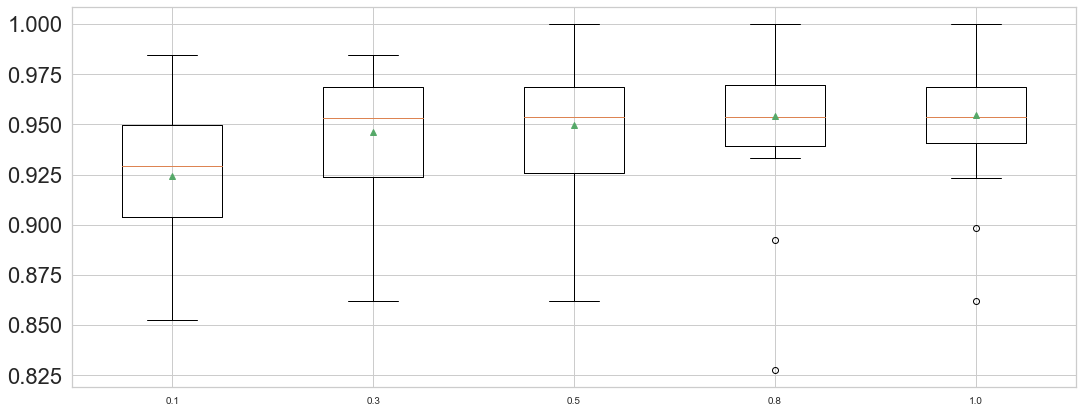

In [189]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(learning_rate = value, random_state = 15)      
    return models

models = get_models([0.1, 0.3, 0.5, 0.8, 1.0])
return_results(models)

>100 0.924 (0.030)
>200 0.938 (0.031)
>300 0.944 (0.027)


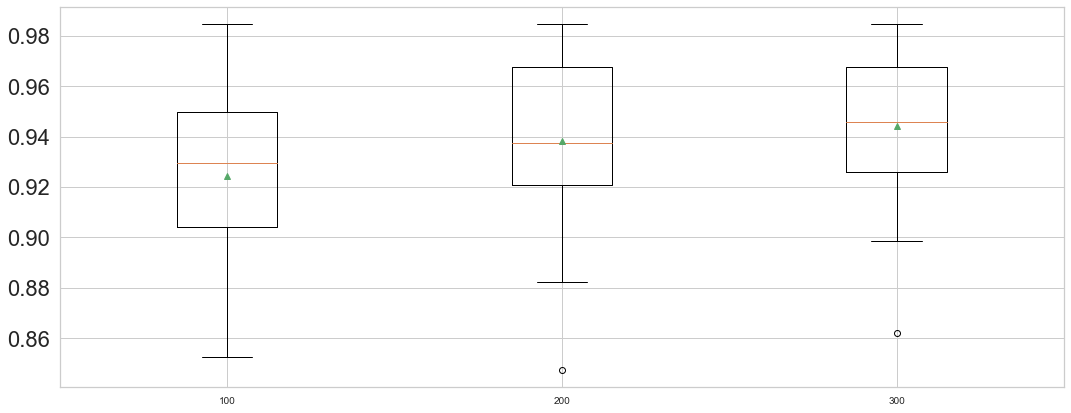

In [190]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(n_estimators = value, random_state = 15)      
    return models

models = get_models([100, 200, 300])
return_results(models)

>0.2 0.902 (0.039)
>0.4 0.915 (0.034)
>0.6 0.919 (0.038)
>0.8 0.928 (0.034)
>1.0 0.924 (0.030)


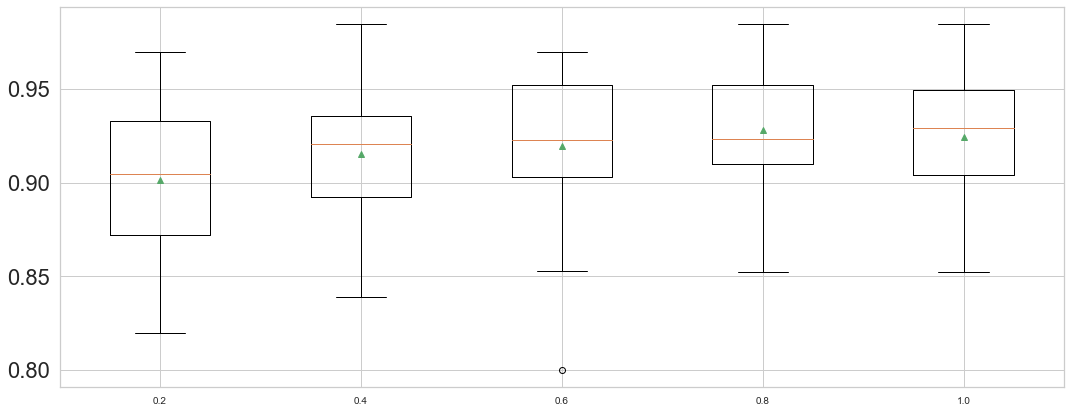

In [191]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(subsample = value, random_state = 15)      
    return models

models = get_models([0.2,0.4,0.6,0.8,1.0])
return_results(models)

>2 0.908 (0.035)
>0.5 0.916 (0.033)
>sqrt 0.911 (0.037)
>log2 0.911 (0.037)
>None 0.924 (0.030)


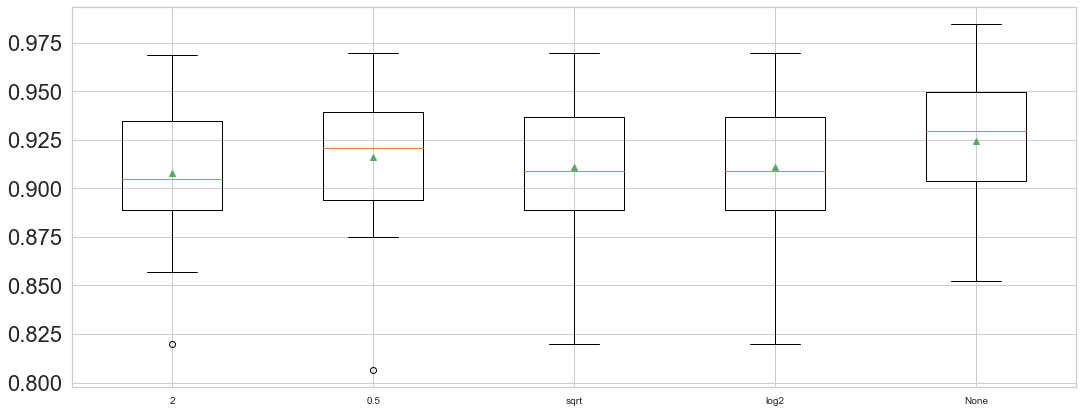

In [192]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(max_features = value, random_state = 15)      
    return models

models = get_models([2,0.5,'sqrt','log2',None])
return_results(models)

In [193]:
parameters_GradientBoosting = {
    'n_estimators': [300],
    'learning_rate': [0.3, 0.5],
    'subsample': [0.6, 1],
    'max_features': [None]
}

In [194]:
model_GradientBoosting = GridSearchCV(GradientBoostingClassifier(), parameters_GradientBoosting, cv=10)

model_GradientBoosting.fit(X_train, y_train)
final_model_GradientBoosting = model_GradientBoosting.best_estimator_

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['Gradient_Boosting'])
show_results(df, [final_model_GradientBoosting])

Time      Train   Validation f1 Train f1 Validation
Gradient_Boosting  0.574+/-0.09  1.0+/-0.0  0.98+/-0.01      1.0         0.982

#### 3.7.6 Voting Classifier <a class="anchor" id="voting"></a>

In [195]:
clf1 = final_model_forest
clf2 = final_model_ExtraTrees
clf3 = final_model_GradientBoosting
voting_classifier = VotingClassifier(estimators=[('Random Forest', clf1), ('Extra Trees', clf2), ('Gradient Boosting', clf3)], voting='hard')
voting_classifier.fit(X_train, y_train)

df = pd.DataFrame(columns = ['Time','Train','Validation', 'f1 Train', 'f1 Validation'], index = ['Voting Classifier'])
show_results(df, [voting_classifier])

Time      Train   Validation f1 Train f1 Validation
Voting Classifier  2.05+/-0.37  1.0+/-0.0  0.99+/-0.01      1.0          0.99

#### 3.7.7 Stacking Classifier<a class="anchor" id="stacking"></a>

In [316]:
lr = model_LogisticRegression.fit(X_train, y_train)
nb = model_GaussianNB.fit(X_train, y_train)
kn = model_KNN.fit(X_train, y_train)
dt = final_DT.fit(X_train, y_train)
nn = final_model_NN.fit(X_train, y_train)
bg = final_model_Bagging.fit(X_train, y_train)
ab = final_model_adaBoost.fit(X_train, y_train)
rf = final_model_forest.fit(X_train, y_train)
gb = final_model_GradientBoosting.fit(X_train, y_train)

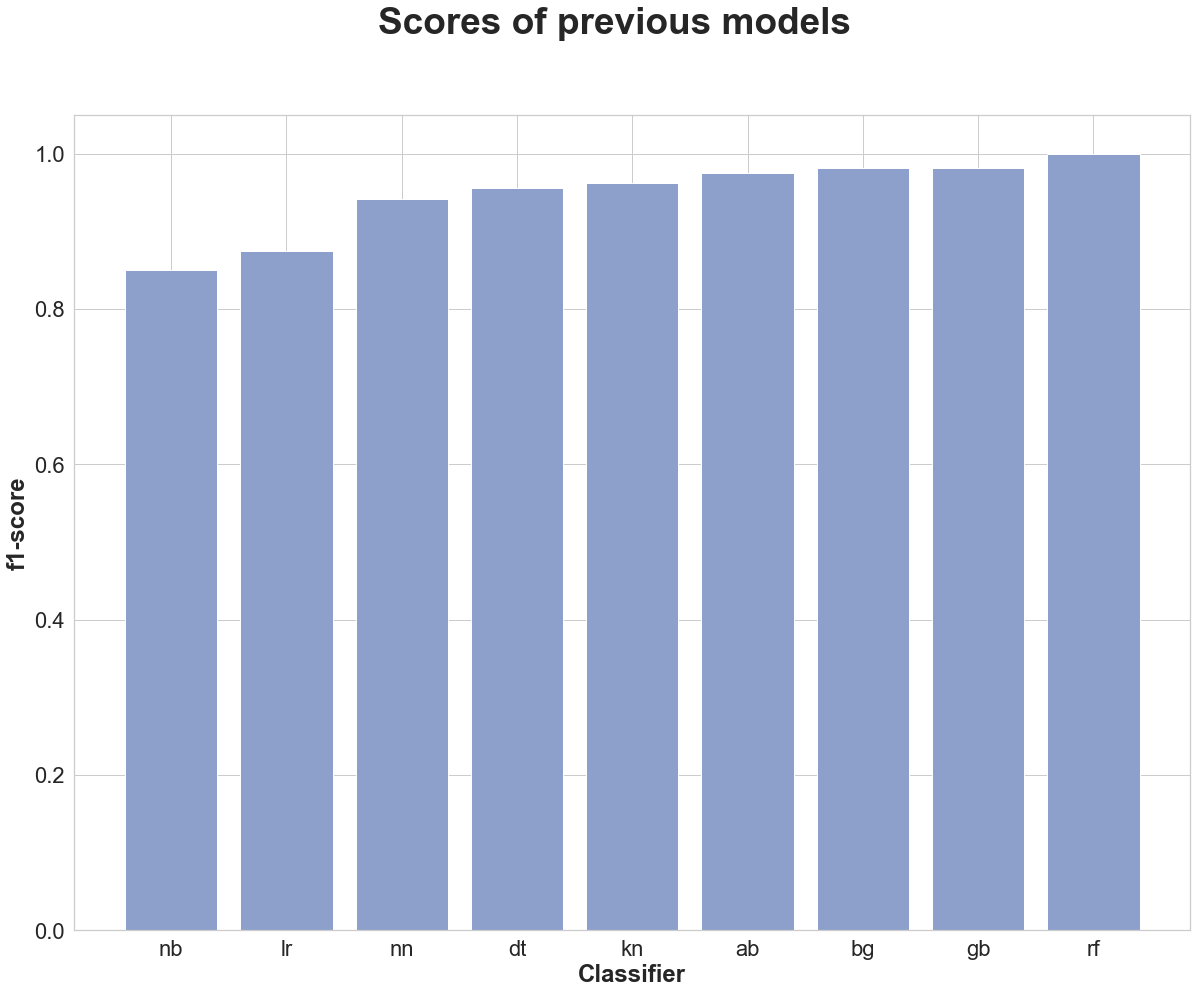

In [341]:
accuracies = [f1_score(y_val, lr.predict(X_val)), 
              f1_score(y_val, nb.predict(X_val)), 
              f1_score(y_val, kn.predict(X_val)),
              f1_score(y_val, dt.predict(X_val)), 
              f1_score(y_val, nn.predict(X_val)), 
              f1_score(y_val, bg.predict(X_val)),
              f1_score(y_val, ab.predict(X_val)), 
              f1_score(y_val, rf.predict(X_val)), 
              f1_score(y_val, gb.predict(X_val))]
models = ['lr','nb','kn','dt','nn','bg','ab','rf','gb']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.figure(figsize=(20,15))
plt.xlabel("Classifier", fontweight="bold")
plt.ylabel("f1-score", fontweight="bold")
plt.suptitle("Scores of previous models", fontweight="bold", fontsize=37)
plt.bar(data[0], data[1], color=sns.color_palette("Set2")[2])
plt.show()

Stacking the 2 best models

In [318]:
estimators = [('gb', final_model_GradientBoosting),
              ('rf', final_model_forest)]

In [319]:
stacking_classifier1 = StackingClassifier(estimators=estimators, final_estimator = RandomForestClassifier()).fit(X_train, y_train)

Stackig the 3 best models

In [320]:
estimators2 = [('ab', final_model_adaBoost),
            ('gb', final_model_GradientBoosting),
            ('rf', final_model_forest)]

In [321]:
stacking_classifier2 = StackingClassifier(estimators=estimators2, final_estimator = RandomForestClassifier()).fit(X_train, y_train)

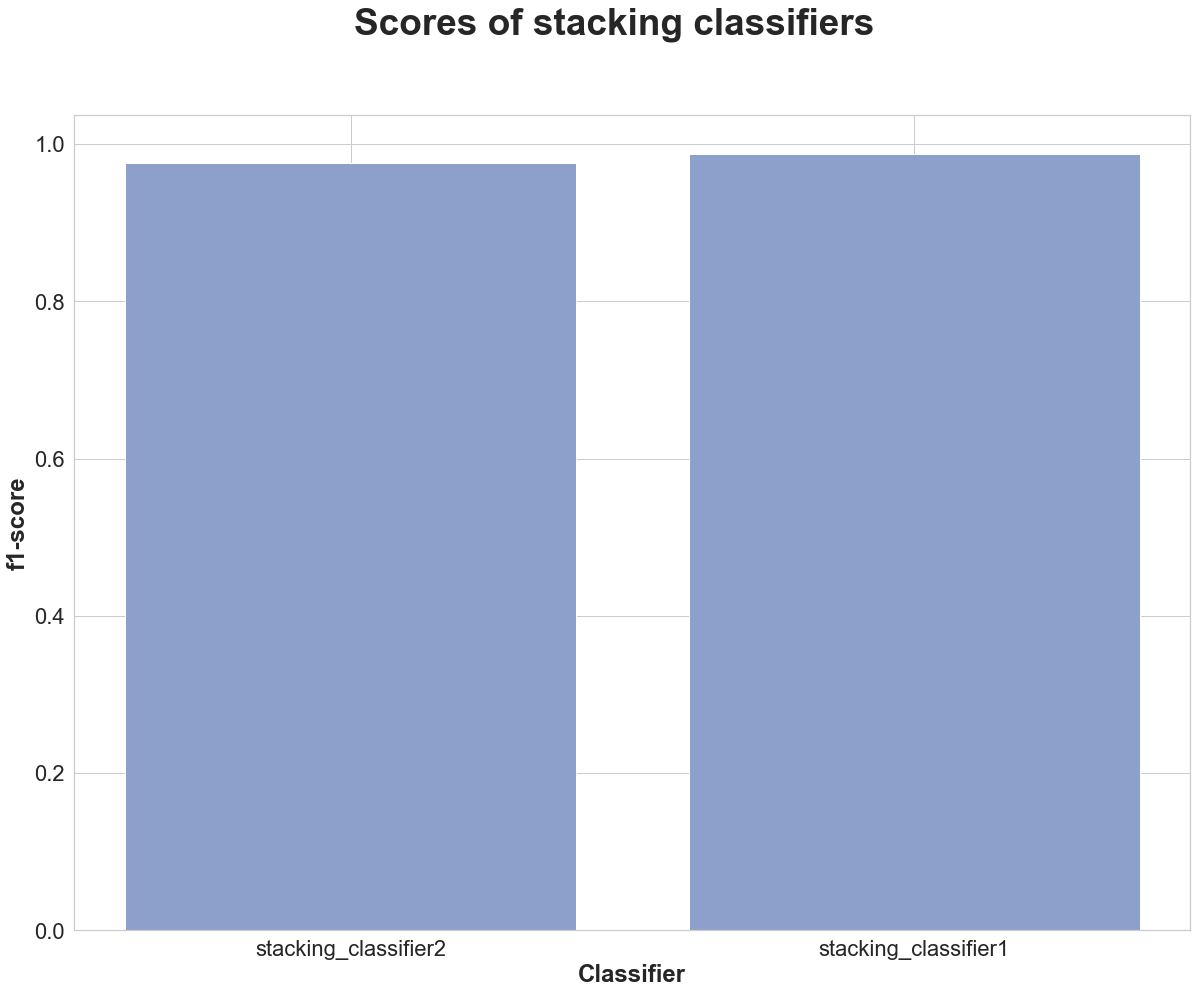

In [340]:
accuracies = [f1_score(y_val, stacking_classifier1.predict(X_val)),
              f1_score(y_val, stacking_classifier2.predict(X_val))]


models = ['stacking_classifier1','stacking_classifier2']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)

plt.figure(figsize=(20,15))
plt.xlabel("Classifier", fontweight="bold")
plt.ylabel("f1-score", fontweight="bold")
plt.suptitle("Scores of stacking classifiers", fontweight="bold", fontsize=37)
plt.bar(data[0], data[1], color=sns.color_palette("Set2")[2])
plt.savefig('Figures/Stacking.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Assessment <a class="anchor" id="assessment"></a>

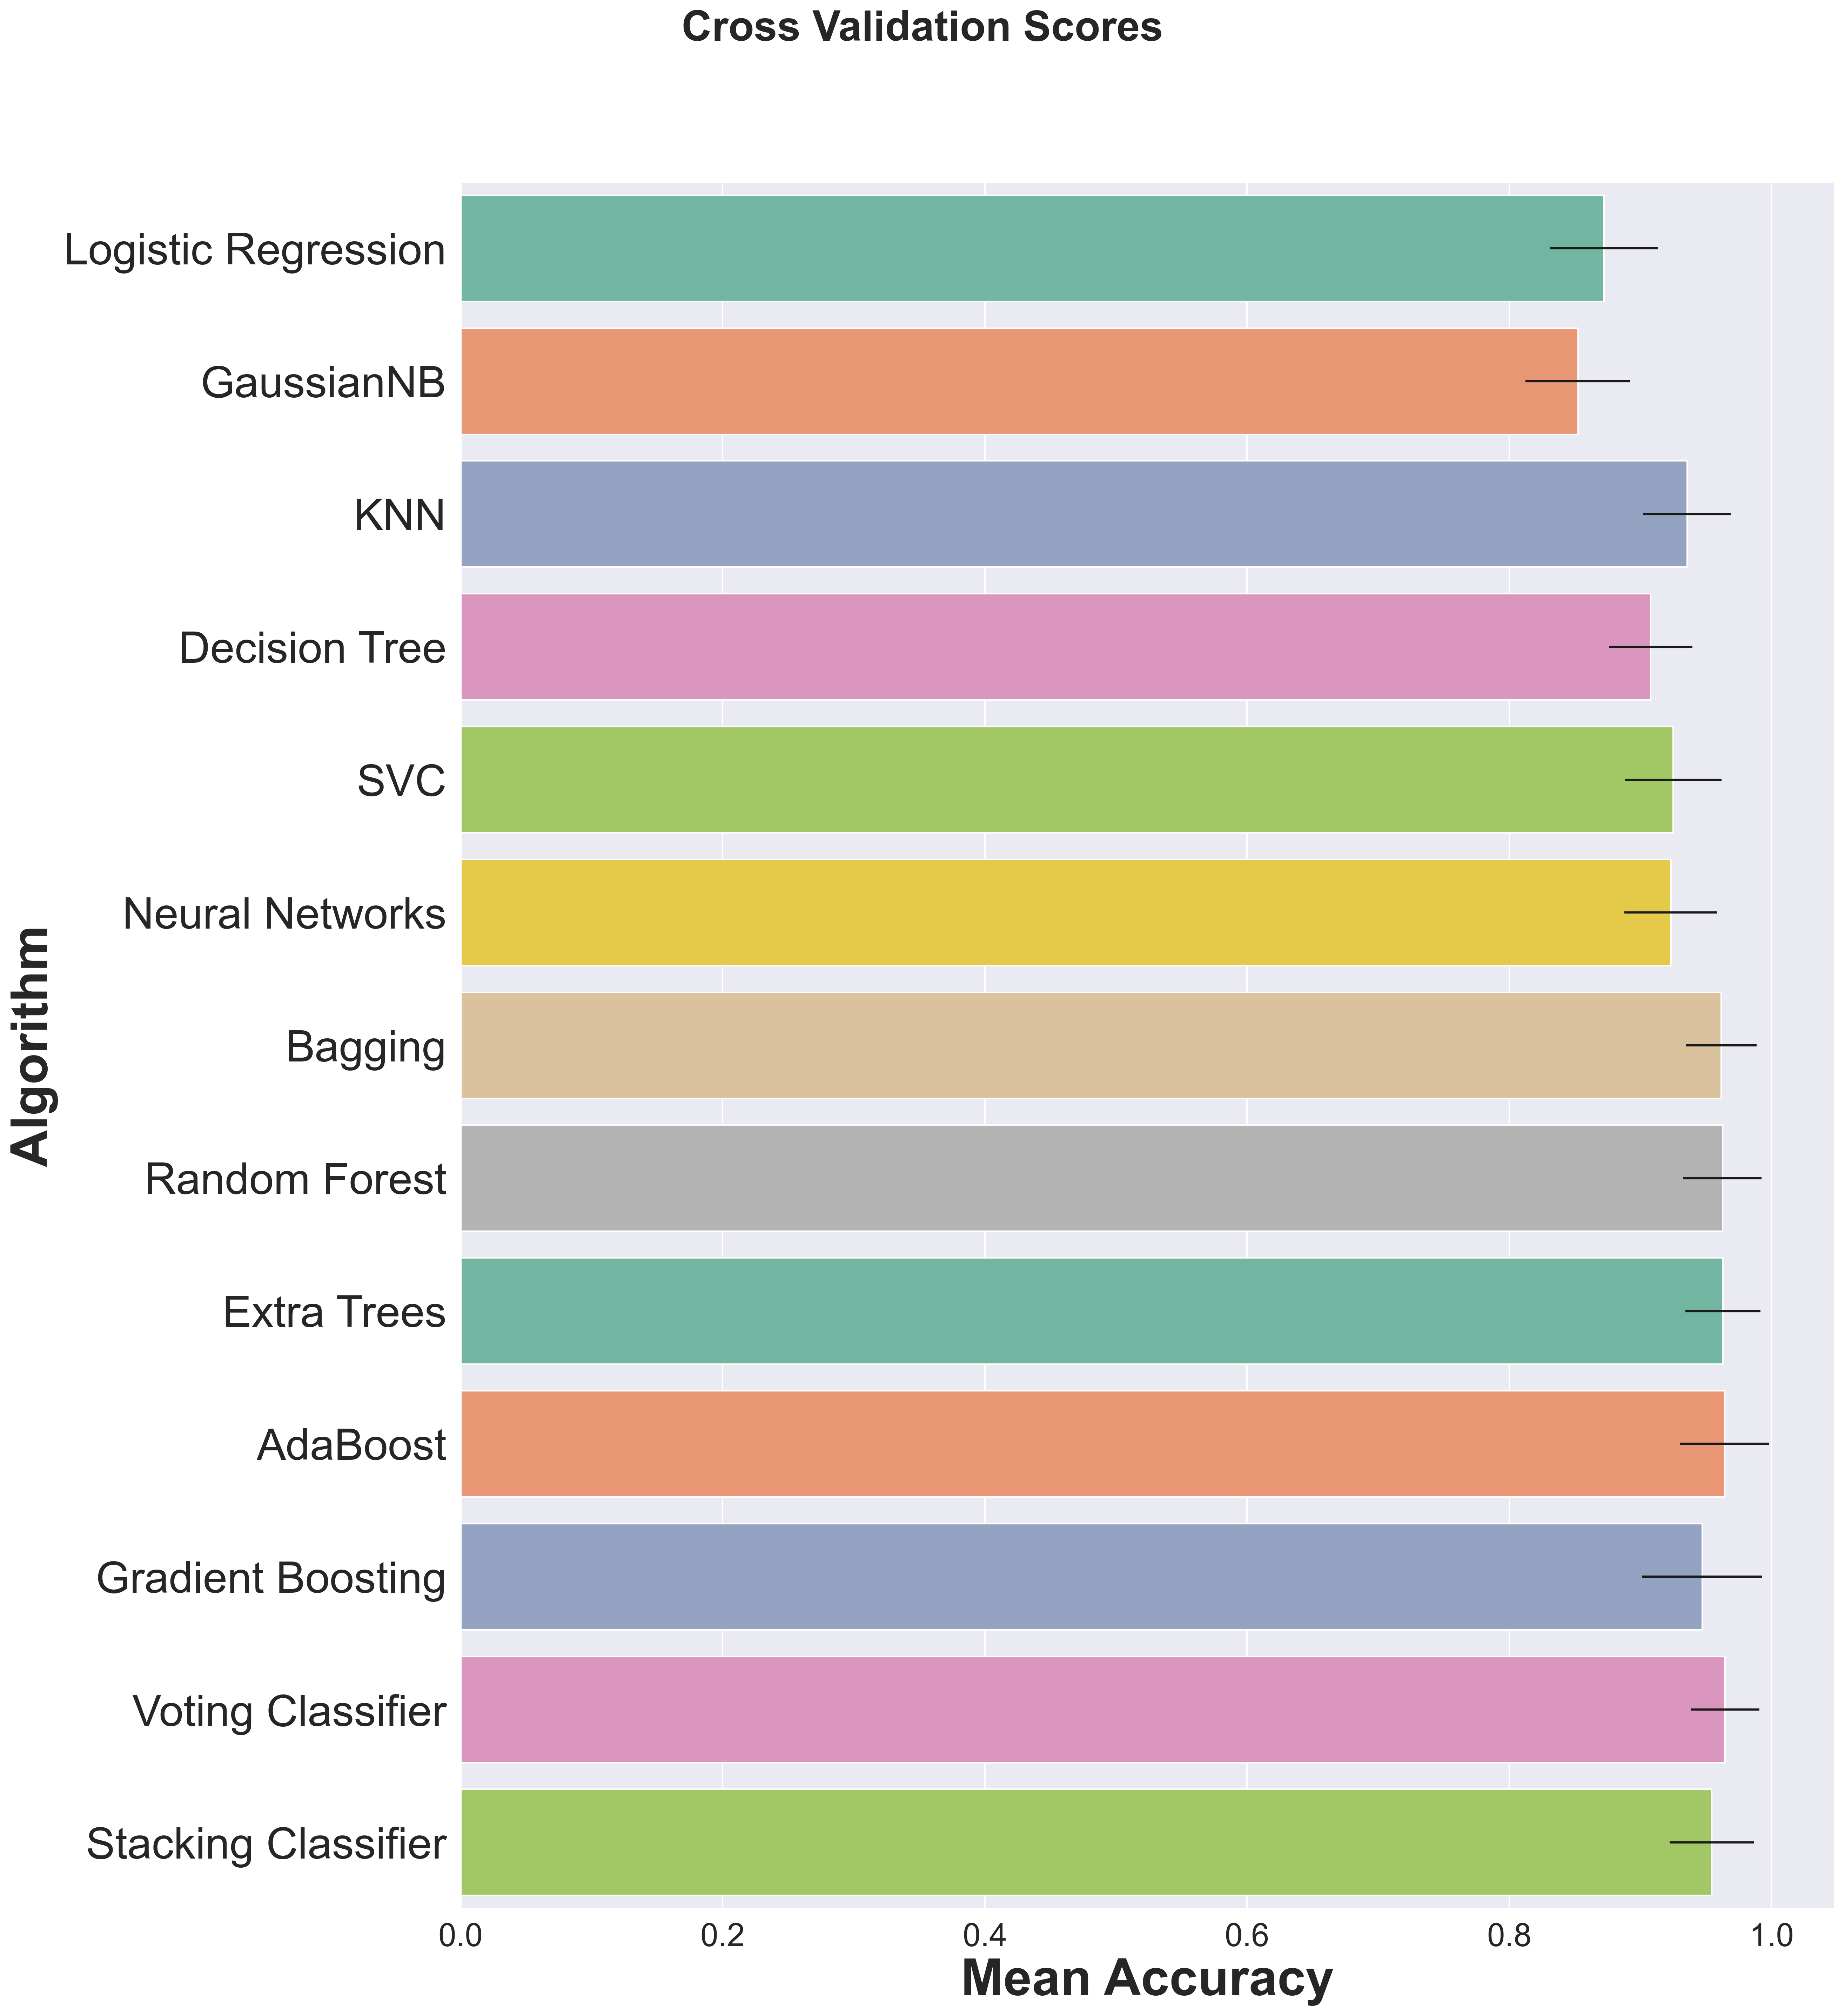

In [367]:
classifiers = []

classifiers.append(model_LogisticRegression)
classifiers.append(model_GaussianNB)
classifiers.append(model_KNN)
classifiers.append(model_DT)
classifiers.append(model_SVC)
classifiers.append(final_model_NN)
classifiers.append(final_model_Bagging)
classifiers.append(final_model_forest)
classifiers.append(final_model_ExtraTrees)
classifiers.append(final_model_adaBoost)
classifiers.append(final_model_GradientBoosting)
classifiers.append(voting_classifier)
classifiers.append(stacking_classifier1)


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "f1", cv =cv, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["Logistic Regression", "GaussianNB", "KNN", "Decision Tree", "SVC", "Neural Networks", "Bagging", "Random Forest", "Extra Trees", "AdaBoost", "Gradient Boosting", "Voting Classifier", "Stacking Classifier"]})

sns.set(font_scale=2)
plt.figure(figsize=(20, 20), dpi=300)
g = sns.barplot("CrossValMeans","Algorithm", data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy", fontsize=35, fontweight='bold')
plt.ylabel("Algorithm", fontsize=35, fontweight='bold')
plt.yticks(fontsize=30)
plt.tight_layout(pad=4)
plt.suptitle("Cross Validation Scores", fontweight="bold", y=1.015)
plt.savefig('Figures/Model_Score.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Deployment <a class="anchor" id="deployment"></a>

In [ ]:
test_demo = pd.read_excel('test_demo.xlsx')
test_habits = pd.read_excel('test_habits.xlsx')
test_health = pd.read_excel('test_health.xlsx')

In [ ]:
test_demo.head()

In [ ]:
test_habits.head()

In [ ]:
test_health.head()

Merging all the datasets into a unique one based on the PatientID variable.

In [ ]:
test_patient_original = pd.merge(pd.merge(test_demo, test_health, on="PatientID"), test_habits, on='PatientID')

In [ ]:
test_patient_original

In [ ]:
test_patient_original.info()

In [ ]:
test_patient = test_patient_original.copy()

### 5.1 Repeating all the preprocessing steps for the test data <a class="anchor" id="rep"></a>

In [ ]:
test_patient.duplicated().value_counts()

In [ ]:
undesireable_char = ["!","$","%","?","*","+","_","@","€"," ","{"]
a = test_patient.replace(undesireable_char,np.nan, inplace=True)

In [ ]:
print(a)

In [ ]:
test_patient.set_index('PatientID', inplace = True)

Looking for null values in the dataframe. We concluded that Education contains 13 null values.

In [ ]:
test_patient.isna().sum()

In [ ]:
test_patient.replace(to_replace="LONDON", value="London", inplace=True, limit=None)

Creating a gender variable based on the prefix in the Name.

In [ ]:
#Create variable Gender
gender = []

for elem in test_patient['Name']:
        if "Mr." in elem:
            gender.append("M")
    
        elif "Miss" or "Mrs." in elem:
            gender.append("F")
    
gender = np.asarray(gender)

test_patient['Gender'] = gender

print(test_patient['Gender'])

Converting the Birth Year to Age by subtracting it to the current Year.

In [ ]:
test_patient['Age'] = datetime.now().year - test_patient['Birth_Year'] 
print(test_patient['Age'])

Creating a variable of Body Mass Index using the Weight and Height variables.

In [ ]:
#Create variable BMI     
test_patient['BMI'] = (test_patient['Weight']/(test_patient['Height']**2)*10000).round(2)

print(test_patient['BMI'])

In [ ]:
test_patient = test_patient.drop(["Birth_Year", "Name"],axis = 1)

In [ ]:
test_patient = pd.get_dummies(test_patient, drop_first=True)

In [ ]:
test_patient

In [ ]:
X_test_num = test_patient.select_dtypes(include=np.number).set_index(test_patient.index)
X_test_cat = test_patient.select_dtypes(exclude=np.number).set_index(test_patient.index)

In [ ]:
X_test_num_scaled = scaler.transform(X_test_num)

test_scaled = pd.DataFrame(X_test_num_scaled, columns = X_test_num.columns)
test_scaled.head(3)

In [ ]:
X_test = test_scaled [['Gender_M',
 'Fruit_Habit_Less than 1. I do not consume fruits every day.',
 'Exercise_Yes',
 'Diabetes_Neither I nor my immediate family have diabetes.',
 'Checkup_More than 3 years',
 'BMI',
 'Physical_Health',
 'Mental_Health',
 'High_Cholesterol',
 'Drinking_Habit_I usually consume alcohol every day']]

In [ ]:
X_test

In [ ]:
final_model = final_model_forest.predict(X_test)
final_model

In [ ]:
answer = pd.DataFrame([test_patient.index.T, final_model]).T
answer.columns = ['PatientID','Disease']
answer

In [ ]:
answer["PatientID"]=answer["PatientID"].astype(int)
answer["Disease"]=answer["Disease"].astype(int)

In [ ]:
answer.head(20)

In [ ]:
answer.to_csv('answ_log_1.csv', index = None)